In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC

from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.preprocessing import StandardScaler,LabelEncoder,RobustScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,f1_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import chi2,SelectKBest
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
#from pandas_profiling import ProfileReport

# Our objective is to classify claims as fraud or legit, so we don't have to waste lots of resources, by assigning specialists to analyze every claim

:(Columns description):
-00) Month: (Month in which the accident occured)
-02) DayOfWeek: (Day of the week of the accident)
-03) Make: . (Car maker)
-04) AccidentArea: (Accident occured in rural or urban area)
-05) DayOfWeekClaimed: (Day of the week the accident was claimed, "control zeros")
-06) MonthClaimed: (Month the accident was claimed, "control zeros")
-07) WeekOfMonthClaimed: (Week in the month of accident)
-08) Sex: (Gender of the person involved in the accident)
-09) MaritalStatus: E (Marital status of the person involved in the accident)
-10) Age: (Age of the person involved in the accident)
-11) Fault: (If the insurance owner was responsable of the accident)
-12) PolicyType: Liability, Collision, All Perils. (Combination between Vehicle Category and Base Policy)
-13) VehicleCatergory: Clasificación de tipo de auto. (Vehicle categorization)
-15) FraudFound_P: . (If the claim is fraudulent, this is the variable to predict)
-16) PolicyNumber: . (Unique number of each entry)
-17) RepNumber: . (Enumeration between 1 and 16)
-18) Deductible: (Ensurance cost)
-19) DriverRating: . (This driver rating might be ordinal)
-20) Days_Policy_Accident: . (Days between ensurance is acquired and the accident occured)
-21) Days_Policy_Claim: (Days between ensurance is acquired and the accident was claimed)
-22) PastNumberOfClaims: (Number of past claims of the ensurance owner)
-23) AgeOfVehicle: vehicle age from date of purchase/launch.
-24) AgeOfPolicyHolder: age of policy holder.
-25) PoliceReportFiled: (If the accident was reported to the police)
-26) WitnessPresent: yes or no.
-27) AgentType: (Internal fraud are those perpetrated against an insurance company or its policyholders by insurance agents, managers, executives, or other insurance employees (External fraud schemes are direct against an insurance company by individuals or entities as diverse as policyholders, medical providers, beneficiaries, vendors, chiropractors and career criminals)
-28) NumberOfSuppliments: (Supplements are non registered damages in the car, beacause they are not easily visible, usually internal components like suspension, chasis, etc.)
-29) AddressChange_Claim: (If the ensurance owner has changed address after the claim)
-30) NumberOfCars: (Number of cars involved in the accident)
-31) Year: year of accident.
-32) BasePolicy: Tipe of ensurance

# Data Gathering

In [6]:
df=pd.read_csv('fraud_oracle.csv')
df.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

df.shape

In [7]:

#Learning the data

In [8]:
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [9]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [10]:
df.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [11]:
df.describe()

WeekOfMonth  WeekOfMonthClaimed           Age  FraudFound_P  \
count  15420.000000        15420.000000  15420.000000  15420.000000   
mean       2.788586            2.693969     39.855707      0.059857   
std        1.287585            1.259115     13.492377      0.237230   
min        1.000000            1.000000      0.000000      0.000000   
25%        2.000000            2.000000     31.000000      0.000000   
50%        3.000000            3.000000     38.000000      0.000000   
75%        4.000000            4.000000     48.000000      0.000000   
max        5.000000            5.000000     80.000000      1.000000   

       PolicyNumber     RepNumber    Deductible  DriverRating          Year  
count  15420.000000  15420.000000  15420.000000  15420.000000  15420.000000  
mean    7710.500000      8.483268    407.704280      2.487808   1994.866472  
std     4451.514911      4.599948     43.950998      1.119453      0.803313  
min        1.000000      1.000000    300.000000      1.000000   1994.000000  
25%     3855.750000      5.000000    400.000000      1.000000   1994.000000  
50%     7710.500000      8.000000    400.000000      2.000000   1995.000000  
75%    11565.250000     12.000000    400.000000      3.000000   1996.000000  
max    15420.000000     16.000000    700.000000      4.000000   1996.000000

### Observations : 24 object(catogorical) columns, 9 : continuous columns¶

In [12]:
# Target column

In [13]:
df['FraudFound_P'].unique()

array([0, 1], dtype=int64)

In [14]:
df['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

In [15]:
df['FraudFound_P'].value_counts(normalize=True)

0    0.940143
1    0.059857
Name: FraudFound_P, dtype: float64

<AxesSubplot:ylabel='FraudFound_P'>

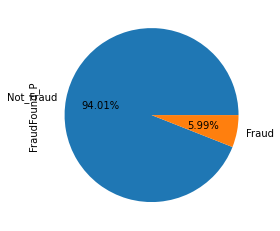

In [16]:
df['FraudFound_P'].value_counts().plot(kind='pie',labels=['Not_Fraud','Fraud'],autopct='%1.2f%%')

### observation : dataset is imbalanced .

In [17]:
#sns.pairplot(df, hue='FraudFound_P', height=2)

In [18]:
#df.hist(figsize=(14,14),xrot=45)
#plt.show()

In [19]:
df['Target']=df['FraudFound_P']
df=df.drop('FraudFound_P',axis=1)
df

Month  WeekOfMonth  DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
0       Dec            5  Wednesday    Honda        Urban          Tuesday   
1       Jan            3  Wednesday    Honda        Urban           Monday   
2       Oct            5     Friday    Honda        Urban         Thursday   
3       Jun            2   Saturday   Toyota        Rural           Friday   
4       Jan            5     Monday    Honda        Urban          Tuesday   
...     ...          ...        ...      ...          ...              ...   
15415   Nov            4     Friday   Toyota        Urban          Tuesday   
15416   Nov            5   Thursday  Pontiac        Urban           Friday   
15417   Nov            5   Thursday   Toyota        Rural           Friday   
15418   Dec            1     Monday   Toyota        Urban         Thursday   
15419   Dec            2  Wednesday   Toyota        Urban         Thursday   

      MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  \
0              Jan                   1  Female        Single  ...   
1              Jan                   4    Male        Single  ...   
2              Nov                   2    Male       Married  ...   
3              Jul                   1    Male       Married  ...   
4              Feb                   2  Female        Single  ...   
...            ...                 ...     ...           ...  ...   
15415          Nov                   5    Male       Married  ...   
15416          Dec                   1    Male       Married  ...   
15417          Dec                   1    Male        Single  ...   
15418          Dec                   2  Female       Married  ...   
15419          Dec                   3    Male        Single  ...   

       AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0               26 to 30                No             No  External   
1               31 to 35               Yes             No  External   
2               41 to 50                No             No  External   
3               51 to 65               Yes             No  External   
4               31 to 35                No             No  External   
...                  ...               ...            ...       ...   
15415           31 to 35                No             No  External   
15416           31 to 35                No             No  External   
15417           26 to 30                No             No  External   
15418           31 to 35                No             No  External   
15419           26 to 30                No             No  External   

      NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  \
0                    none               1 year        3 to 4  1994   
1                    none            no change     1 vehicle  1994   
2                    none            no change     1 vehicle  1994   
3             more than 5            no change     1 vehicle  1994   
4                    none            no change     1 vehicle  1994   
...                   ...                  ...           ...   ...   
15415                none            no change     1 vehicle  1996   
15416         more than 5            no change        3 to 4  1996   
15417              1 to 2            no change     1 vehicle  1996   
15418         more than 5            no change     1 vehicle  1996   
15419              1 to 2            no change     1 vehicle  1996   

       BasePolicy Target  
0       Liability      0  
1       Collision      0  
2       Collision      0  
3       Liability      0  
4       Collision      0  
...           ...    ...  
15415   Collision      1  
15416   Liability      0  
15417   Collision      1  
15418  All Perils      0  
15419   Collision      1  

[15420 rows x 33 columns]

In [20]:
df.describe(include='object')

Month DayOfWeek     Make AccidentArea DayOfWeekClaimed MonthClaimed  \
count   15420     15420    15420        15420            15420        15420   
unique     12         7       19            2                8           13   
top       Jan    Monday  Pontiac        Urban           Monday          Jan   
freq     1411      2616     3837        13822             3757         1446   

          Sex MaritalStatus          Fault         PolicyType  ...  \
count   15420         15420          15420              15420  ...   
unique      2             4              2                  9  ...   
top      Male       Married  Policy Holder  Sedan - Collision  ...   
freq    13000         10625          11230               5584  ...   

       PastNumberOfClaims AgeOfVehicle AgeOfPolicyHolder PoliceReportFiled  \
count               15420        15420             15420             15420   
unique                  4            8                 9                 2   
top                2 to 4      7 years          31 to 35                No   
freq                 5485         5807              5593             14992   

       WitnessPresent AgentType NumberOfSuppliments AddressChange_Claim  \
count           15420     15420               15420               15420   
unique              2         2                   4                   5   
top                No  External                none           no change   
freq            15333     15179                7047               14324   

       NumberOfCars BasePolicy  
count         15420      15420  
unique            5          3  
top       1 vehicle  Collision  
freq          14316       5962  

[4 rows x 24 columns]

In [21]:
#for column in df.select_dtypes(include='object'):
  #  if df[column].nunique()<10:
#sns.countplot(y=column,data=df)
#plt.show()

In [22]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        display(df.groupby(column).mean())
plt.savefig("object_columns_mean")

WeekOfMonth  WeekOfMonthClaimed        Age  PolicyNumber  \
DayOfWeek                                                             
Friday        2.832311            2.720245  39.801636   7700.302249   
Monday        2.810015            2.701453  39.318807   7629.831422   
Saturday      2.773966            2.721493  40.361756   7782.078708   
Sunday        2.703152            2.698567  39.296848   7787.528940   
Thursday      2.815002            2.651634  39.733088   7713.010584   
Tuesday       2.789130            2.699130  40.479130   7600.752174   
Wednesday     2.768411            2.663270  40.013895   7806.212135   

           RepNumber  Deductible  DriverRating         Year    Target  
DayOfWeek                                                              
Friday      8.513292  407.402863      2.481800  1994.862577  0.062986  
Monday      8.508410  406.039755      2.489297  1994.857798  0.061162  
Saturday    8.536327  408.678103      2.493946  1994.879919  0.066599  
Sunday      8.440688  406.475645      2.469914  1994.869914  0.069914  
Thursday    8.561436  408.145421      2.547170  1994.870686  0.055223  
Tuesday     8.428261  409.826087      2.468696  1994.849565  0.052174  
Wednesday   8.384437  407.457156      2.462251  1994.880037  0.053265

WeekOfMonth  WeekOfMonthClaimed        Age  PolicyNumber  \
AccidentArea                                                             
Rural            2.754068            2.669587  39.529412   7655.258448   
Urban            2.792577            2.696788  39.893431   7716.886630   

              RepNumber  Deductible  DriverRating         Year    Target  
AccidentArea                                                              
Rural           8.39174  407.008761      2.498748  1994.861076  0.083229  
Urban           8.49385  407.784691      2.486543  1994.867096  0.057155

WeekOfMonth  WeekOfMonthClaimed        Age  PolicyNumber  \
DayOfWeekClaimed                                                             
0                    2.000000            1.000000   0.000000   1517.000000   
Friday               2.779335            2.657990  39.625551   7732.554265   
Monday               2.754858            2.713867  39.673410   7690.603407   
Saturday             2.834646            2.149606  40.905512   7280.377953   
Sunday               3.115385            1.961538  39.711538   7888.980769   
Thursday             2.790226            2.668797  40.187218   7822.072180   
Tuesday              2.791704            2.721481  39.919111   7659.058074   
Wednesday            2.826838            2.727211  39.882074   7692.897323   

                  RepNumber  Deductible  DriverRating         Year    Target  
DayOfWeekClaimed                                                              
0                 15.000000  400.000000      2.000000  1994.000000  0.000000  
Friday             8.516620  407.969563      2.513016  1994.866239  0.065679  
Monday             8.476444  406.654245      2.494544  1994.861059  0.057493  
Saturday           8.755906  403.937008      2.433071  1994.771654  0.078740  
Sunday             8.192308  405.769231      2.461538  1994.846154  0.057692  
Thursday           8.595865  408.120301      2.455639  1994.880827  0.054135  
Tuesday            8.386667  408.770370      2.484444  1994.861630  0.058667  
Wednesday          8.463911  407.421213      2.493731  1994.870891  0.063707

WeekOfMonth  WeekOfMonthClaimed        Age  PolicyNumber  RepNumber  \
Sex                                                                           
Female     2.772727            2.683058  37.569421   7660.618182   8.492149   
Male       2.791538            2.696000  40.281308   7719.785692   8.481615   

        Deductible  DriverRating         Year    Target  
Sex                                                      
Female  406.198347      2.495041  1994.865702  0.043388  
Male    407.984615      2.486462  1994.866615  0.062923

WeekOfMonth  WeekOfMonthClaimed        Age  PolicyNumber  \
MaritalStatus                                                             
Divorced          2.578947            2.473684  41.947368   8290.236842   
Married           2.774776            2.697882  43.891388   7745.011012   
Single            2.821947            2.686379  30.619769   7618.575363   
Widow             2.971429            3.000000  46.228571   8277.228571   

               RepNumber  Deductible  DriverRating         Year    Target  
MaritalStatus                                                              
Divorced        8.460526  410.526316      2.289474  1994.921053  0.039474  
Married         8.501929  408.771765      2.500706  1994.873882  0.060141  
Single          8.441503  405.230572      2.462852  1994.847780  0.059351  
Widow           8.457143  408.571429      2.342857  1995.000000  0.085714

WeekOfMonth  WeekOfMonthClaimed        Age  PolicyNumber  \
Fault                                                                     
Policy Holder     2.768566            2.698842  39.778985   7684.405076   
Third Party       2.842243            2.680907  40.061337   7780.439379   

               RepNumber  Deductible  DriverRating         Year    Target  
Fault                                                                      
Policy Holder   8.500801  407.764915      2.494835  1994.860997  0.078896  
Third Party     8.436277  407.541766      2.468974  1994.881146  0.008831

WeekOfMonth  WeekOfMonthClaimed        Age  \
PolicyType                                                         
Sedan - All Perils       2.806215            2.680206  41.644972   
Sedan - Collision        2.786354            2.688754  38.746060   
Sedan - Liability        2.781632            2.726088  39.539603   
Sport - All Perils       2.818182            2.681818  33.545455   
Sport - Collision        2.787356            2.454023  35.816092   
Sport - Liability        5.000000            1.000000  21.000000   
Utility - All Perils     2.814706            2.726471  44.867647   
Utility - Collision      1.800000            2.500000  49.333333   
Utility - Liability      2.476190            2.952381  41.523810   

                      PolicyNumber  RepNumber  Deductible  DriverRating  \
PolicyType                                                                
Sedan - All Perils     7587.046244   8.535601  407.291412      2.499633   
Sedan - Collision      7801.174427   8.411354  406.948424      2.475107   
Sedan - Liability      7803.795869   8.503710  408.943252      2.488470   
Sport - All Perils     7732.090909  10.454545  413.636364      2.318182   
Sport - Collision      6603.221264   8.362069  403.735632      2.491379   
Sport - Liability         1.000000  12.000000  300.000000      1.000000   
Utility - All Perils   7474.935294   8.623529  411.176471      2.558824   
Utility - Collision    8250.033333   9.533333  410.000000      2.666667   
Utility - Liability    7207.476190   8.571429  400.000000      2.190476   

                             Year    Target  
PolicyType                                   
Sedan - All Perils    1994.847565  0.100563  
Sedan - Collision     1994.881447  0.068768  
Sedan - Liability     1994.878885  0.007219  
Sport - All Perils    1994.863636  0.000000  
Sport - Collision     1994.701149  0.137931  
Sport - Liability     1994.000000  0.000000  
Utility - All Perils  1994.835294  0.120588  
Utility - Collision   1995.000000  0.100000  
Utility - Liability   1994.714286  0.000000

WeekOfMonth  WeekOfMonthClaimed        Age  PolicyNumber  \
VehicleCategory                                                             
Sedan               2.794747            2.685141  39.971151   7710.683073   
Sport               2.782568            2.707913  39.269690   7724.068309   
Utility             2.718670            2.721228  45.030691   7520.040921   

                 RepNumber  Deductible  DriverRating         Year    Target  
VehicleCategory                                                              
Sedan             8.463861  407.093372      2.485472  1994.867129  0.082205  
Sport             8.503173  408.603957      2.487682  1994.867115  0.015677  
Utility           8.690537  410.485934      2.547315  1994.841432  0.112532

WeekOfMonth  WeekOfMonthClaimed        Age  PolicyNumber  \
VehiclePrice                                                                
20000 to 29000      2.795024            2.688575  39.672856   7763.483104   
30000 to 39000      2.804132            2.729975  41.203793   7777.472120   
40000 to 59000      2.694143            2.572668  44.843818   8187.119306   
60000 to 69000      2.931034            2.781609  50.528736   7745.264368   
less than 20000     2.752737            2.706204  42.170620   7888.822993   
more than 69000     2.771719            2.671442  35.673290   7210.106747   

                 RepNumber  Deductible  DriverRating         Year    Target  
VehiclePrice                                                                 
20000 to 29000    8.450056  407.377151      2.491274  1994.871643  0.052110  
30000 to 39000    8.524200  409.000849      2.461647  1994.879989  0.049533  
40000 to 59000    8.455531  409.978308      2.507592  1994.954447  0.067245  
60000 to 69000    8.172414  401.149425      2.528736  1994.885057  0.045977  
less than 20000   8.357664  407.846715      2.526460  1994.901460  0.093978  
more than 69000   8.622458  406.515712      2.492144  1994.787893  0.087338

WeekOfMonth  WeekOfMonthClaimed        Age  \
Days_Policy_Accident                                               
1 to 7                   3.642857            2.214286  40.071429   
15 to 30                 3.020408            2.877551  37.897959   
8 to 15                  2.872727            2.654545  38.727273   
more than 30             2.784548            2.694825  39.873811   
none                     3.400000            2.454545  37.654545   

                      PolicyNumber  RepNumber  Deductible  DriverRating  \
Days_Policy_Accident                                                      
1 to 7                 5305.214286   9.857143  400.000000      2.928571   
15 to 30               7247.122449   8.897959  402.040816      2.571429   
8 to 15                8935.545455   7.763636  407.272727      2.636364   
more than 30           7709.515118   8.481800  407.745786      2.487637   
none                   7783.563636   8.890909  403.636364      2.200000   

                             Year    Target  
Days_Policy_Accident                         
1 to 7                1994.571429  0.071429  
15 to 30              1994.795918  0.061224  
8 to 15               1995.109091  0.090909  
more than 30          1994.865941  0.059356  
none                  1994.909091  0.163636

WeekOfMonth  WeekOfMonthClaimed        Age  PolicyNumber  \
Days_Policy_Claim                                                             
15 to 30              2.946429            2.625000  39.196429   7723.375000   
8 to 15               3.428571            2.619048  40.238095   8139.095238   
more than 30          2.787186            2.694434  39.860188   7710.270043   
none                  2.000000            1.000000   0.000000   1517.000000   

                   RepNumber  Deductible  DriverRating         Year    Target  
Days_Policy_Claim                                                              
15 to 30            8.178571  407.142857      2.392857  1994.892857  0.107143  
8 to 15             7.142857  400.000000      2.523810  1995.000000  0.142857  
more than 30        8.485791  407.717377      2.488137  1994.866250  0.059575  
none               15.000000  400.000000      2.000000  1994.000000  0.000000

WeekOfMonth  WeekOfMonthClaimed        Age  PolicyNumber  \
PastNumberOfClaims                                                             
1                      2.792891            2.663028  40.075567   7611.883571   
2 to 4                 2.809663            2.734549  39.417502   7754.911030   
more than 4            2.735821            2.687065  39.546269   7868.751741   
none                   2.782858            2.671415  40.370404   7662.401654   

                    RepNumber  Deductible  DriverRating         Year    Target  
PastNumberOfClaims                                                              
1                    8.532606  407.052897      2.466835  1994.849986  0.062133  
2 to 4               8.457612  407.365542      2.484412  1994.876026  0.053601  
more than 4          8.516915  408.955224      2.488557  1994.888060  0.033831  
none                 8.459559  408.088235      2.508961  1994.857996  0.077895

WeekOfMonth  WeekOfMonthClaimed        Age  PolicyNumber  \
AgeOfVehicle                                                             
2 years          2.739726            2.849315  23.493151   7873.506849   
3 years          2.967105            2.664474  26.250000   7446.710526   
4 years          2.759825            2.672489  28.213974   7386.947598   
5 years          2.838615            2.652911  30.352985   7619.521002   
6 years          2.799014            2.704466  33.458237   7766.497390   
7 years          2.783365            2.692268  39.746341   7735.564147   
more than 7      2.767144            2.699322  53.472997   7749.154233   
new              2.774799            2.710456   5.825737   6995.324397   

              RepNumber  Deductible  DriverRating         Year    Target  
AgeOfVehicle                                                              
2 years        9.095890  398.630137      2.534247  1994.945205  0.041096  
3 years        8.907895  399.342105      2.453947  1994.815789  0.085526  
4 years        8.100437  399.563319      2.506550  1994.790393  0.091703  
5 years        8.363301  399.705232      2.489315  1994.836404  0.070007  
6 years        8.527842  401.856148      2.502320  1994.879930  0.066125  
7 years        8.528672  411.365593      2.472705  1994.868435  0.055967  
more than 7    8.404421  411.856318      2.495102  1994.876413  0.051746  
new            8.584450  399.731903      2.498660  1994.766756  0.085791

WeekOfMonth  WeekOfMonthClaimed        Age  PolicyNumber  \
AgeOfPolicyHolder                                                             
16 to 17              2.668750            2.675000   0.000000   6862.315625   
18 to 20              2.400000            2.266667  16.400000   3912.466667   
21 to 25              2.972222            2.824074  18.814815   6779.472222   
26 to 30              2.903752            2.646003  22.941272   7568.079935   
31 to 35              2.798856            2.694082  30.548006   7753.563562   
36 to 40              2.780608            2.705664  40.483304   7634.428889   
41 to 50              2.751061            2.688826  50.423267   7820.475955   
51 to 65              2.811063            2.696121  60.441092   7790.096264   
over 65               2.795276            2.677165  72.783465   8027.694882   

                   RepNumber  Deductible  DriverRating         Year    Target  
AgeOfPolicyHolder                                                              
16 to 17            8.653125  399.687500      2.468750  1994.734375  0.096875  
18 to 20            8.200000  400.000000      2.666667  1994.266667  0.133333  
21 to 25            8.388889  400.000000      2.472222  1994.759259  0.148148  
26 to 30            8.450245  399.836868      2.491028  1994.818923  0.053834  
31 to 35            8.473985  404.595030      2.474343  1994.871804  0.064366  
36 to 40            8.582736  410.314123      2.509523  1994.856542  0.058620  
41 to 50            8.454385  409.971711      2.497525  1994.885431  0.050919  
51 to 65            8.201149  411.063218      2.479167  1994.877155  0.050287  
over 65             8.688976  415.748031      2.438976  1994.933071  0.059055

WeekOfMonth  WeekOfMonthClaimed        Age  PolicyNumber  \
PoliceReportFiled                                                             
No                    2.785752            2.688967  39.874733   7692.044824   
Yes                   2.887850            2.869159  39.189252   8356.948598   

                   RepNumber  Deductible  DriverRating         Year    Target  
PoliceReportFiled                                                              
No                  8.478522  407.637407      2.484792  1994.863594  0.060499  
Yes                 8.649533  410.046729      2.593458  1994.967290  0.037383

WeekOfMonth  WeekOfMonthClaimed        Age  PolicyNumber  \
WitnessPresent                                                             
No                 2.787256            2.693080  39.863106   7715.314811   
Yes                3.022989            2.850575  38.551724   6861.931034   

                RepNumber  Deductible  DriverRating         Year    Target  
WitnessPresent                                                              
No               8.480663  407.702341      2.486924  1994.867410  0.060001  
Yes              8.942529  408.045977      2.643678  1994.701149  0.034483

WeekOfMonth  WeekOfMonthClaimed        Age  PolicyNumber  \
AgentType                                                             
External      2.787535            2.695764  39.856249   7699.347454   
Internal      2.854772            2.580913  39.821577   8412.925311   

           RepNumber  Deductible  DriverRating         Year    Target  
AgentType                                                              
External    8.480005  407.727782      2.487845  1994.864550  0.060544  
Internal    8.688797  406.224066      2.485477  1994.987552  0.016598

WeekOfMonth  WeekOfMonthClaimed        Age  PolicyNumber  \
NumberOfSuppliments                                                             
1 to 2                  2.789072            2.699478  40.654078   7769.371635   
3 to 5                  2.808131            2.701041  41.082300   7632.661378   
more than 5             2.783812            2.715542  41.275924   7819.565037   
none                    2.785441            2.678161  38.443309   7652.136796   

                     RepNumber  Deductible  DriverRating         Year  \
NumberOfSuppliments                                                     
1 to 2                8.268381  406.147047      2.527521  1994.872640   
3 to 5                8.523550  407.734259      2.462072  1994.864650   
more than 5           8.539436  408.611327      2.493923  1994.885958   
none                  8.516816  407.747978      2.477792  1994.854122   

                       Target  
NumberOfSuppliments            
1 to 2               0.063881  
3 to 5               0.048091  
more than 5          0.050427  
none                 0.066979

WeekOfMonth  WeekOfMonthClaimed        Age  PolicyNumber  \
AddressChange_Claim                                                             
1 year                  2.723529            2.747059  38.705882   7690.500000   
2 to 3 years            2.690722            2.711340  40.560137   7725.134021   
4 to 8 years            2.811410            2.748019  39.258320   7721.877971   
no change               2.790422            2.690729  39.881318   7712.017593   
under 6 months          2.500000            2.250000  40.000000    266.500000   

                     RepNumber  Deductible  DriverRating         Year  \
AddressChange_Claim                                                     
1 year                8.994118  406.470588      2.417647  1994.864706   
2 to 3 years          8.745704  490.721649      2.584192  1994.869416   
4 to 8 years          8.343899  405.229794      2.515055  1994.865293   
no change             8.479196  406.143535      2.485549  1994.866727   
under 6 months        4.250000  400.000000      2.250000  1994.000000   

                       Target  
AddressChange_Claim            
1 year               0.064706  
2 to 3 years         0.175258  
4 to 8 years         0.052298  
no change            0.057596  
under 6 months       0.750000

WeekOfMonth  WeekOfMonthClaimed        Age  PolicyNumber  \
NumberOfCars                                                             
1 vehicle        2.787441            2.690137  39.869377   7712.798896   
2 vehicles       2.815233            2.753173  39.581100   7711.287729   
3 to 4           2.771505            2.744624  39.559140   7685.083333   
5 to 8           2.904762            2.428571  46.238095   7270.047619   
more than 8      3.500000            2.500000  27.500000    328.000000   

              RepNumber  Deductible  DriverRating         Year    Target  
NumberOfCars                                                              
1 vehicle      8.496298  407.655770      2.485122  1994.866723  0.059374  
2 vehicles     8.348378  409.732017      2.485190  1994.866008  0.060649  
3 to 4         8.293011  405.376344      2.599462  1994.862903  0.077957  
5 to 8         7.571429  414.285714      2.523810  1994.857143  0.047619  
more than 8    8.000000  400.000000      1.500000  1994.000000  0.000000

WeekOfMonth  WeekOfMonthClaimed        Age  PolicyNumber  \
BasePolicy                                                             
All Perils     2.806923            2.683749  41.851203   7579.195774   
Collision      2.781449            2.674103  38.628313   7733.508890   
Liability      2.780795            2.726692  39.544220   7799.738071   

            RepNumber  Deductible  DriverRating         Year    Target  
BasePolicy                                                              
All Perils   8.551809  407.619690      2.503259  1994.846707  0.101596  
Collision    8.414123  406.776250      2.477021  1994.871520  0.072962  
Liability    8.504692  408.884009      2.486924  1994.878020  0.007187

<Figure size 432x288 with 0 Axes>

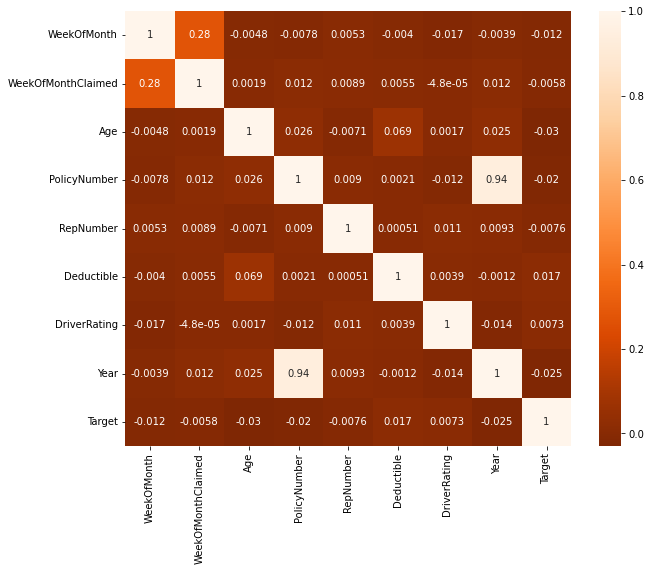

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='Oranges_r', annot=True)
plt.show()
plt.savefig("correlation")

# 3. EDA

### 3.1 Month

In [20]:
print(df["Month"].nunique())
print(df["Month"].unique())

12
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']


<AxesSubplot:>

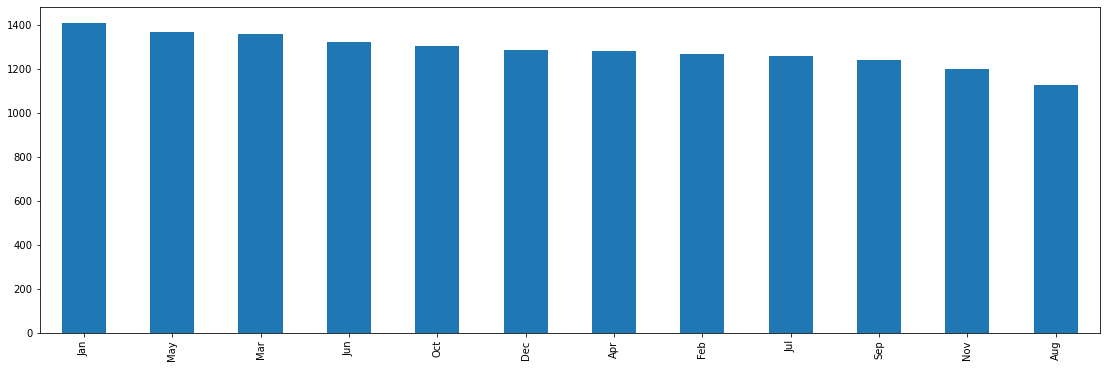

In [21]:
plt.figure(figsize=(19,6))
df["Month"].value_counts().plot(kind="bar")

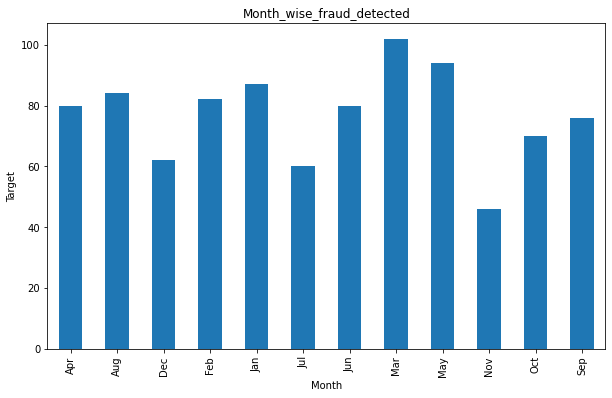

In [22]:
x=df.groupby("Month").Target.sum()
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("Month")
ax.set_ylabel("Target")
ax.set_title("Month_wise_fraud_detected")
x.plot(kind="bar")
fig.show()


### observation: No clear insights.

### 3.2 WeekOfMonth

In [23]:
print(df["WeekOfMonth"].nunique())
print(df["WeekOfMonth"].unique())

5
[5 3 2 4 1]


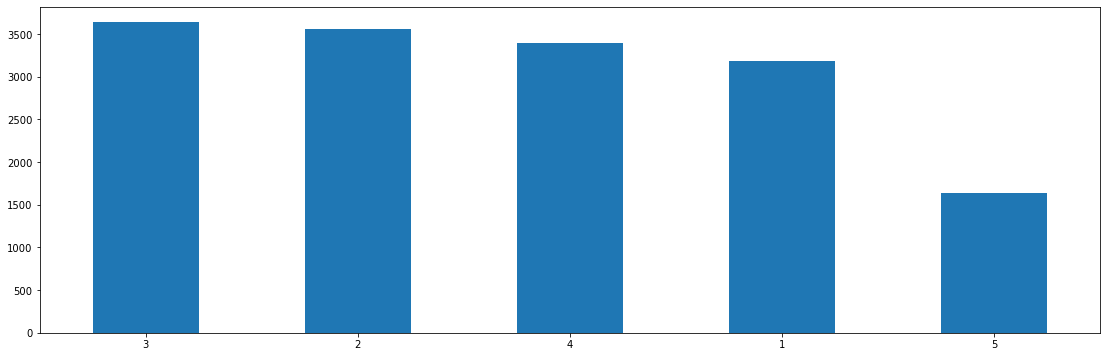

In [24]:
plt.figure(figsize=(19,6))
df["WeekOfMonth"].value_counts().plot(kind="bar")
plt.xticks(rotation = 0);

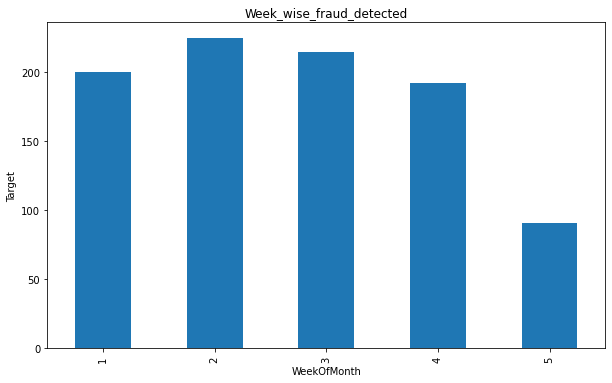

In [25]:
x=df.groupby("WeekOfMonth").Target.sum()
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("WeekOfMonth")
ax.set_ylabel("Target")
ax.set_title("Week_wise_fraud_detected")
x.plot(kind="bar")
fig.show()

### 3.3 DayOfWeek

In [26]:
print(df["DayOfWeek"].nunique())
print(df["DayOfWeek"].unique())

7
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']


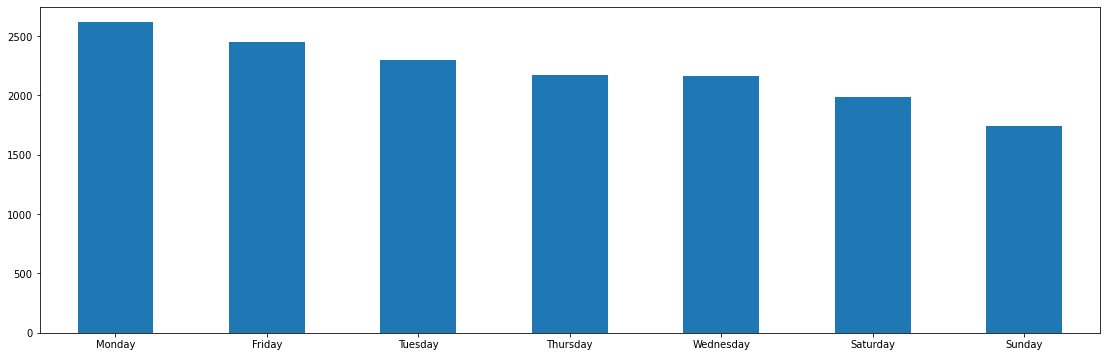

In [27]:
plt.figure(figsize=(19,6))
df["DayOfWeek"].value_counts().plot(kind="bar")
plt.xticks(rotation = 0);

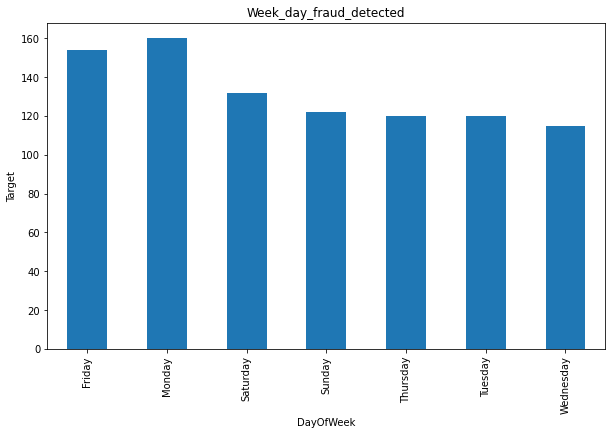

In [28]:
x=df.groupby("DayOfWeek").Target.sum()
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("DayOfWeek")
ax.set_ylabel("Target")
ax.set_title("Week_day_fraud_detected")
x.plot(kind="bar")
fig.show()

### 3.4 Make

In [29]:
print(df["Make"].nunique())
print(df["Make"].unique())

19
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']


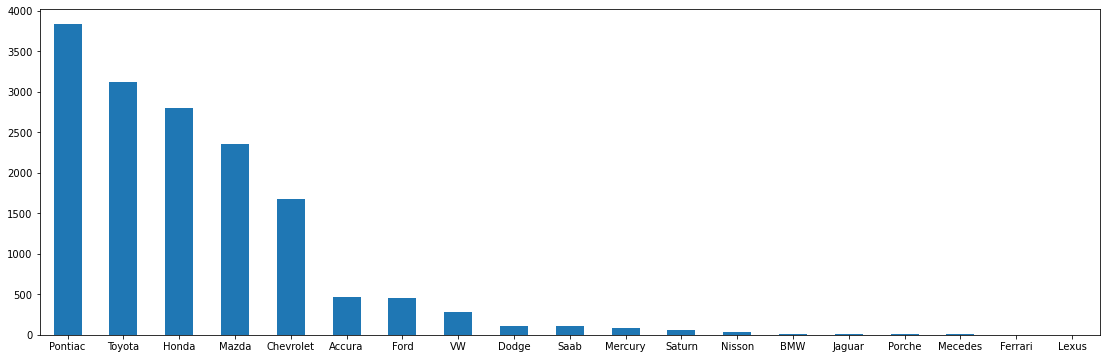

In [30]:
plt.figure(figsize=(19,6))
df["Make"].value_counts().plot(kind="bar")
plt.xticks(rotation = 0);
fig.show()

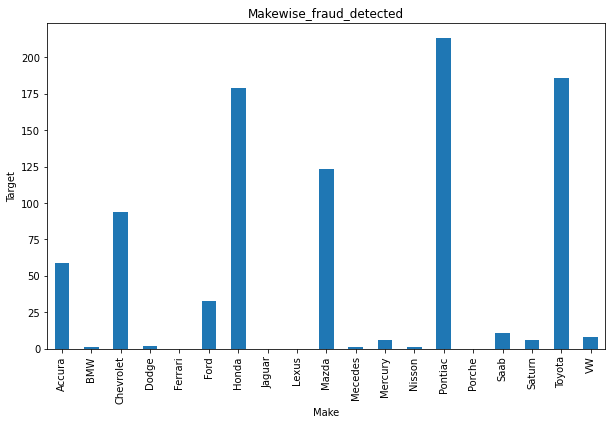

In [31]:
x=df.groupby("Make").Target.sum()
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("Make")
ax.set_ylabel("Target")
ax.set_title("Makewise_fraud_detected")
x.plot(kind="bar")
fig.show()

### Observations : 1. top 5 contributers are honda, pontiac,cheverlet,mazda & toyota make cars  

### 2.luxurious car owners claims less frauds¶

### 3.5 AccidentArea

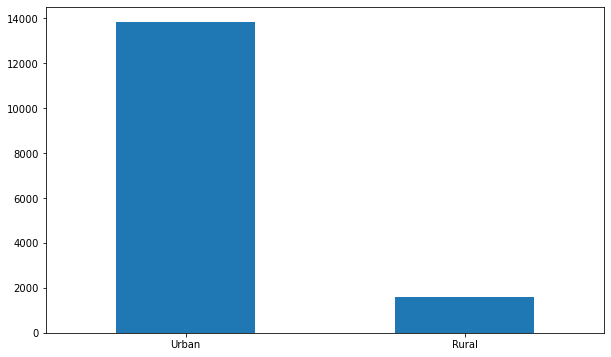

In [32]:
plt.figure(figsize=(10,6))
df["AccidentArea"].value_counts().plot(kind="bar")
plt.xticks(rotation = 0);

<AxesSubplot:>

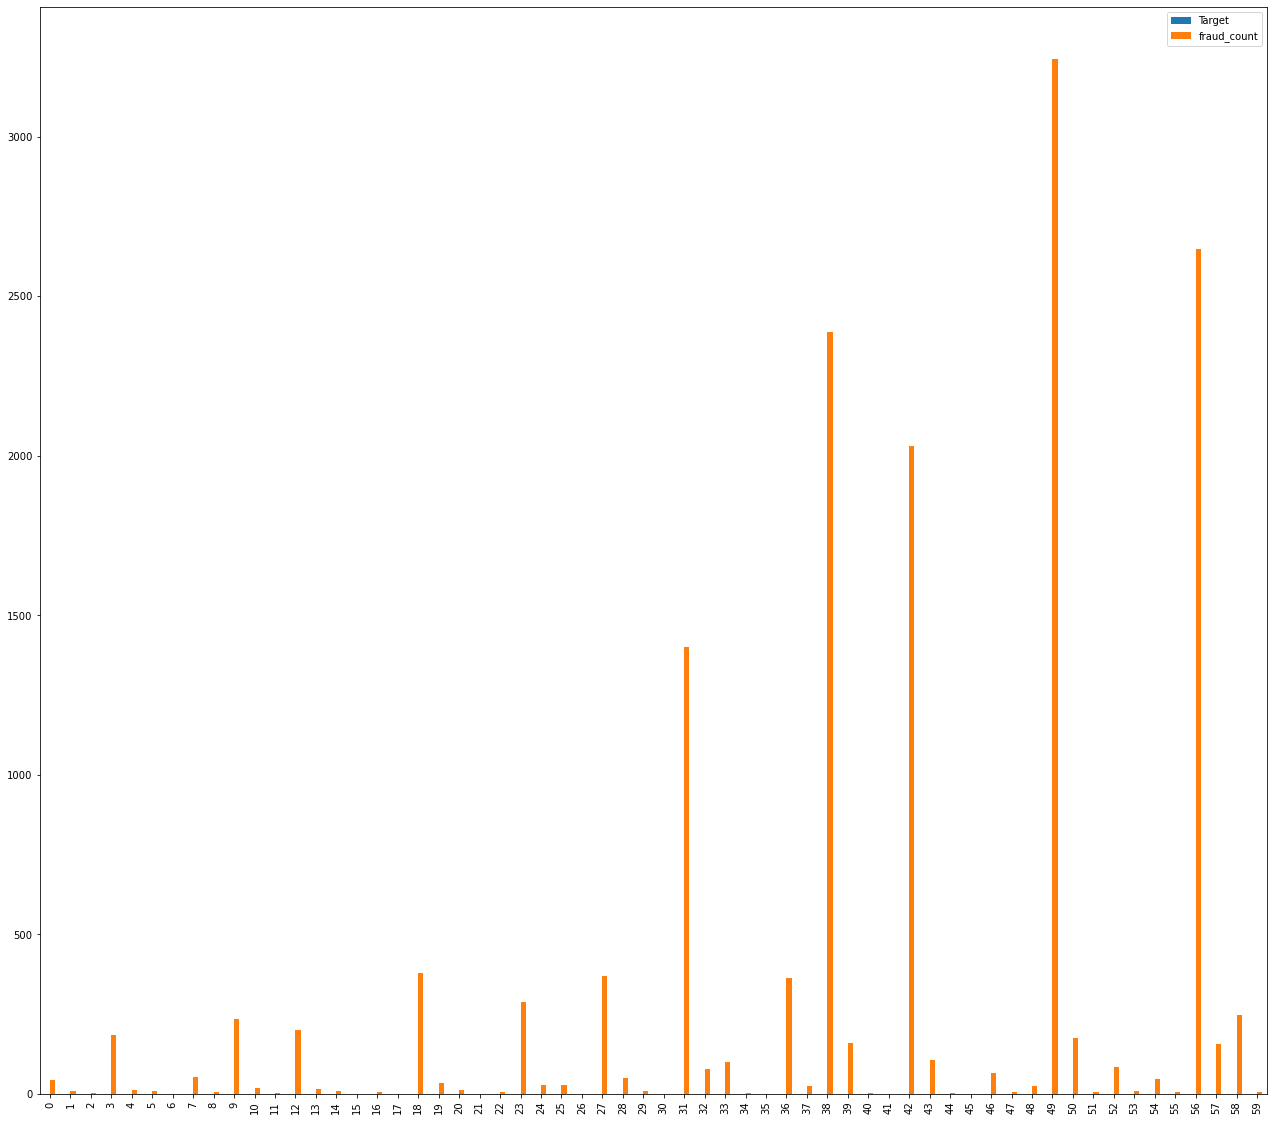

In [33]:
x=df.groupby(["AccidentArea","Make","Target"]).size().reset_index().rename(columns={0:"fraud_count"})
x.plot(kind="bar",figsize=(22,20))

In [34]:
df.groupby(["AccidentArea","Make","Target"]).size().reset_index().rename(columns={0:"fraud_count"})

AccidentArea       Make  Target  fraud_count
0         Rural     Accura       0           43
1         Rural     Accura       1            9
2         Rural        BMW       0            3
3         Rural  Chevrolet       0          185
4         Rural  Chevrolet       1           14
5         Rural      Dodge       0            8
6         Rural    Ferrari       0            1
7         Rural       Ford       0           53
8         Rural       Ford       1            7
9         Rural      Honda       0          236
10        Rural      Honda       1           20
11        Rural     Jaguar       0            4
12        Rural      Mazda       0          200
13        Rural      Mazda       1           15
14        Rural    Mercury       0           11
15        Rural    Mercury       1            1
16        Rural     Nisson       0            5
17        Rural     Nisson       1            1
18        Rural    Pontiac       0          380
19        Rural    Pontiac       1           36
20        Rural       Saab       0           13
21        Rural       Saab       1            1
22        Rural     Saturn       0            6
23        Rural     Toyota       0          289
24        Rural     Toyota       1           28
25        Rural         VW       0           28
26        Rural         VW       1            1
27        Urban     Accura       0          370
28        Urban     Accura       1           50
29        Urban        BMW       0           11
30        Urban        BMW       1            1
31        Urban  Chevrolet       0         1402
32        Urban  Chevrolet       1           80
33        Urban      Dodge       0           99
34        Urban      Dodge       1            2
35        Urban    Ferrari       0            1
36        Urban       Ford       0          364
37        Urban       Ford       1           26
38        Urban      Honda       0         2386
39        Urban      Honda       1          159
40        Urban     Jaguar       0            2
41        Urban      Lexus       0            1
42        Urban      Mazda       0         2031
43        Urban      Mazda       1          108
44        Urban    Mecedes       0            3
45        Urban    Mecedes       1            1
46        Urban    Mercury       0           66
47        Urban    Mercury       1            5
48        Urban     Nisson       0           24
49        Urban    Pontiac       0         3244
50        Urban    Pontiac       1          177
51        Urban     Porche       0            5
52        Urban       Saab       0           84
53        Urban       Saab       1           10
54        Urban     Saturn       0           46
55        Urban     Saturn       1            6
56        Urban     Toyota       0         2646
57        Urban     Toyota       1          158
58        Urban         VW       0          247
59        Urban         VW       1            7

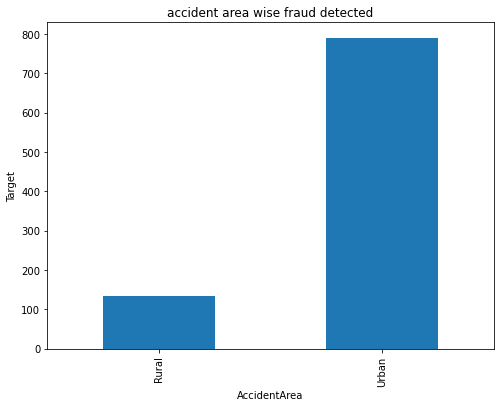

In [35]:
x=df.groupby('AccidentArea').Target.sum()
fig=plt.figure(figsize=(8,6))
a=fig.add_subplot(1,1,1)
a.set_xlabel('AccidentArea')
a.set_ylabel('Target')
a.set_title('accident area wise fraud detected')
x.plot(kind='bar')
fig.show()

## Observations : Rural area reported less significant fraudulant cases

### 3.6 DayOfWeekClaimed

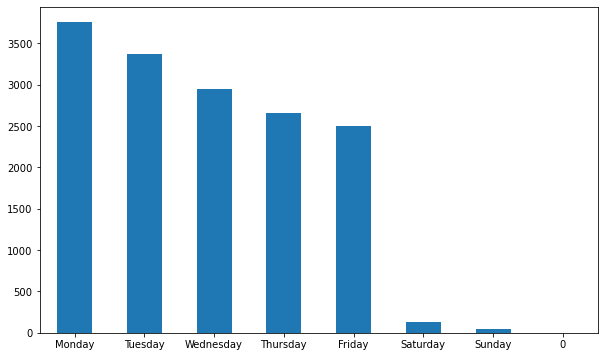

In [36]:
plt.figure(figsize=(10,6))
df["DayOfWeekClaimed"].value_counts().plot(kind="bar")
plt.xticks(rotation = 0);
fig.show()

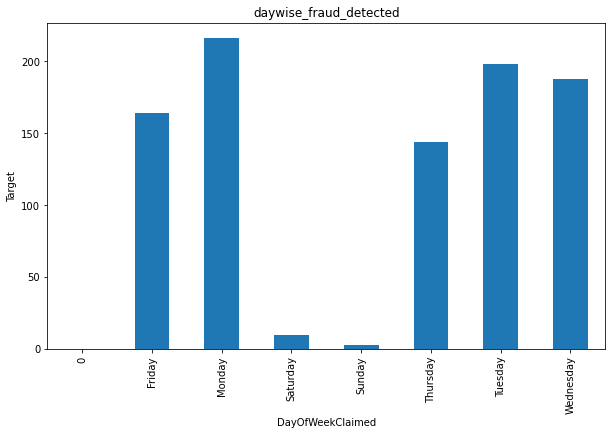

In [37]:
x=df.groupby("DayOfWeekClaimed").Target.sum()
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("DayOfWeekClaimed")
ax.set_ylabel("Target")
ax.set_title("daywise_fraud_detected")
x.plot(kind="bar")
fig.show()
plt.savefig("daywise_fraud_detected")

### 3.7MonthClaimed

In [38]:
print(df["MonthClaimed"].nunique())
print(df["MonthClaimed"].unique())

13
['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']


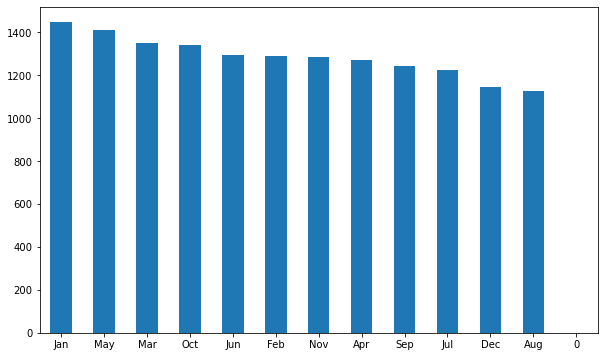

In [39]:
plt.figure(figsize=(10,6))
df["MonthClaimed"].value_counts().plot(kind="bar")
plt.xticks(rotation = 0);

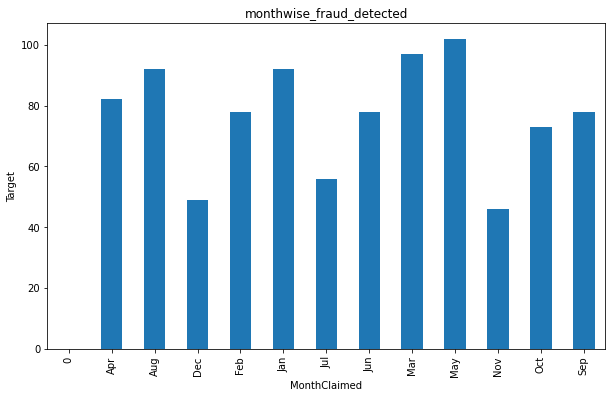

In [40]:
x=df.groupby("MonthClaimed").Target.sum()
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("MonthClaimed")
ax.set_ylabel("Target")
ax.set_title("monthwise_fraud_detected")
x.plot(kind="bar")
fig.show()

### 3.8 WeekOfMonthClaimed

In [41]:
print(df["WeekOfMonthClaimed"].nunique())
print(df["WeekOfMonthClaimed"].unique())

5
[1 4 2 3 5]


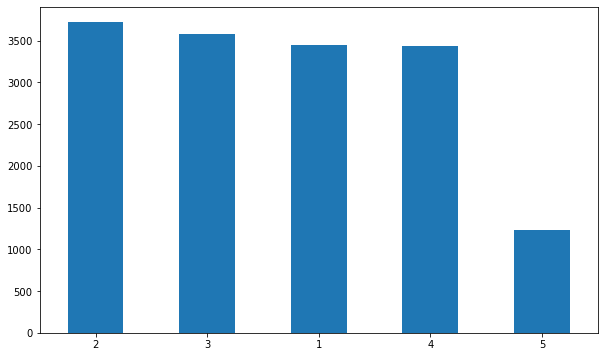

In [42]:
plt.figure(figsize=(10,6))
df["WeekOfMonthClaimed"].value_counts().plot(kind="bar")
plt.xticks(rotation = 0);
plt.show()

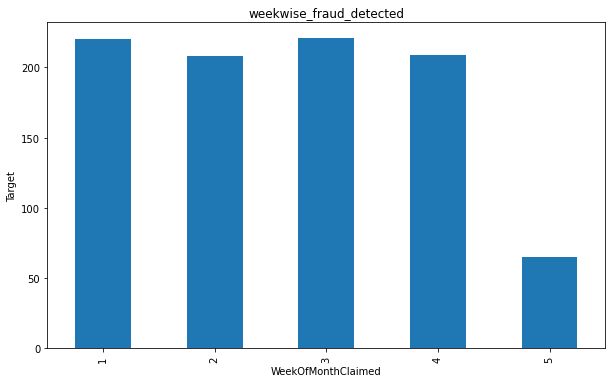

In [43]:
x=df.groupby("WeekOfMonthClaimed").Target.sum()
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("WeekOfMonthClaimed")
ax.set_ylabel("Target")
ax.set_title("weekwise_fraud_detected")
x.plot(kind="bar")
fig.show()


### 3.9 Sex

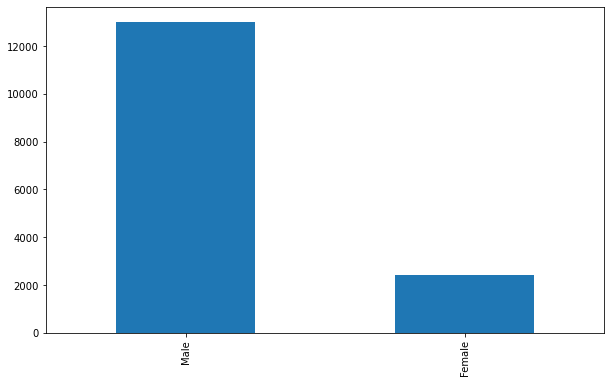

In [44]:
plt.figure(figsize=(10,6))
df["Sex"].value_counts().plot(kind="bar")
plt.show()

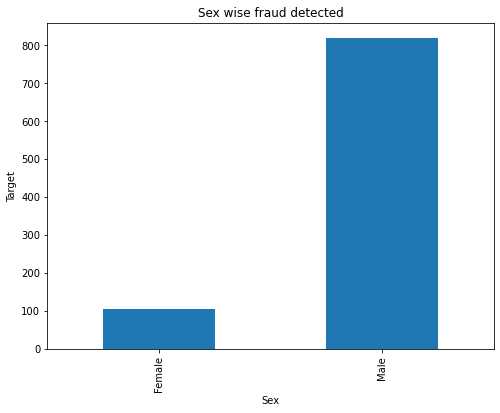

In [45]:
x=df.groupby('Sex').Target.sum()
fig=plt.figure(figsize=(8,6))
a=fig.add_subplot(1,1,1)
a.set_xlabel('Sex')
a.set_ylabel('Target')
a.set_title('Sex wise fraud detected')
x.plot(kind='bar')
fig.show()

## Observations : female reported for less frauds claims

### 3.10 MaritalStatus

In [46]:
print(df["MaritalStatus"].nunique())
print(df["MaritalStatus"].unique())

4
['Single' 'Married' 'Widow' 'Divorced']


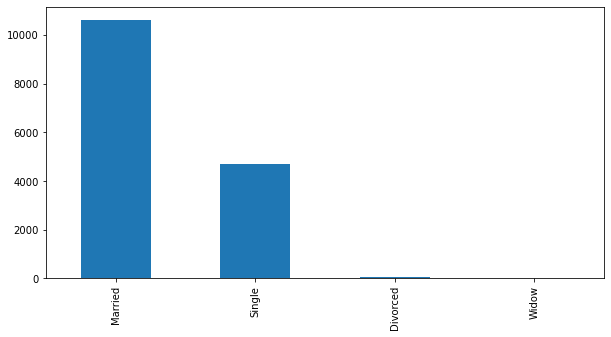

In [47]:
plt.figure(figsize=(10,5))
df["MaritalStatus"].value_counts().plot(kind="bar")
plt.show()

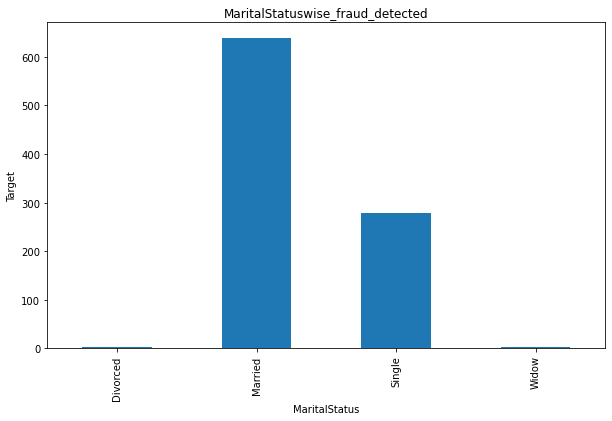

In [48]:
x=df.groupby("MaritalStatus").Target.sum()
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("MaritalStatus")
ax.set_ylabel("Target")
ax.set_title("MaritalStatuswise_fraud_detected")
x.plot(kind="bar")
fig.show()
plt.savefig("MaritalStatuswise_fraud_detected")

## Observations : married claimed significant frauds

In [49]:
df.groupby(["Target","Sex","MaritalStatus"]).size().reset_index().rename(columns={0:"fraud_count"})

Target     Sex MaritalStatus  fraud_count
0        0  Female      Divorced           39
1        0  Female       Married         1261
2        0  Female        Single          993
3        0  Female         Widow           22
4        0    Male      Divorced           34
5        0    Male       Married         8725
6        0    Male        Single         3413
7        0    Male         Widow           10
8        1  Female      Divorced            1
9        1  Female       Married           64
10       1  Female        Single           38
11       1  Female         Widow            2
12       1    Male      Divorced            2
13       1    Male       Married          575
14       1    Male        Single          240
15       1    Male         Widow            1

<AxesSubplot:>

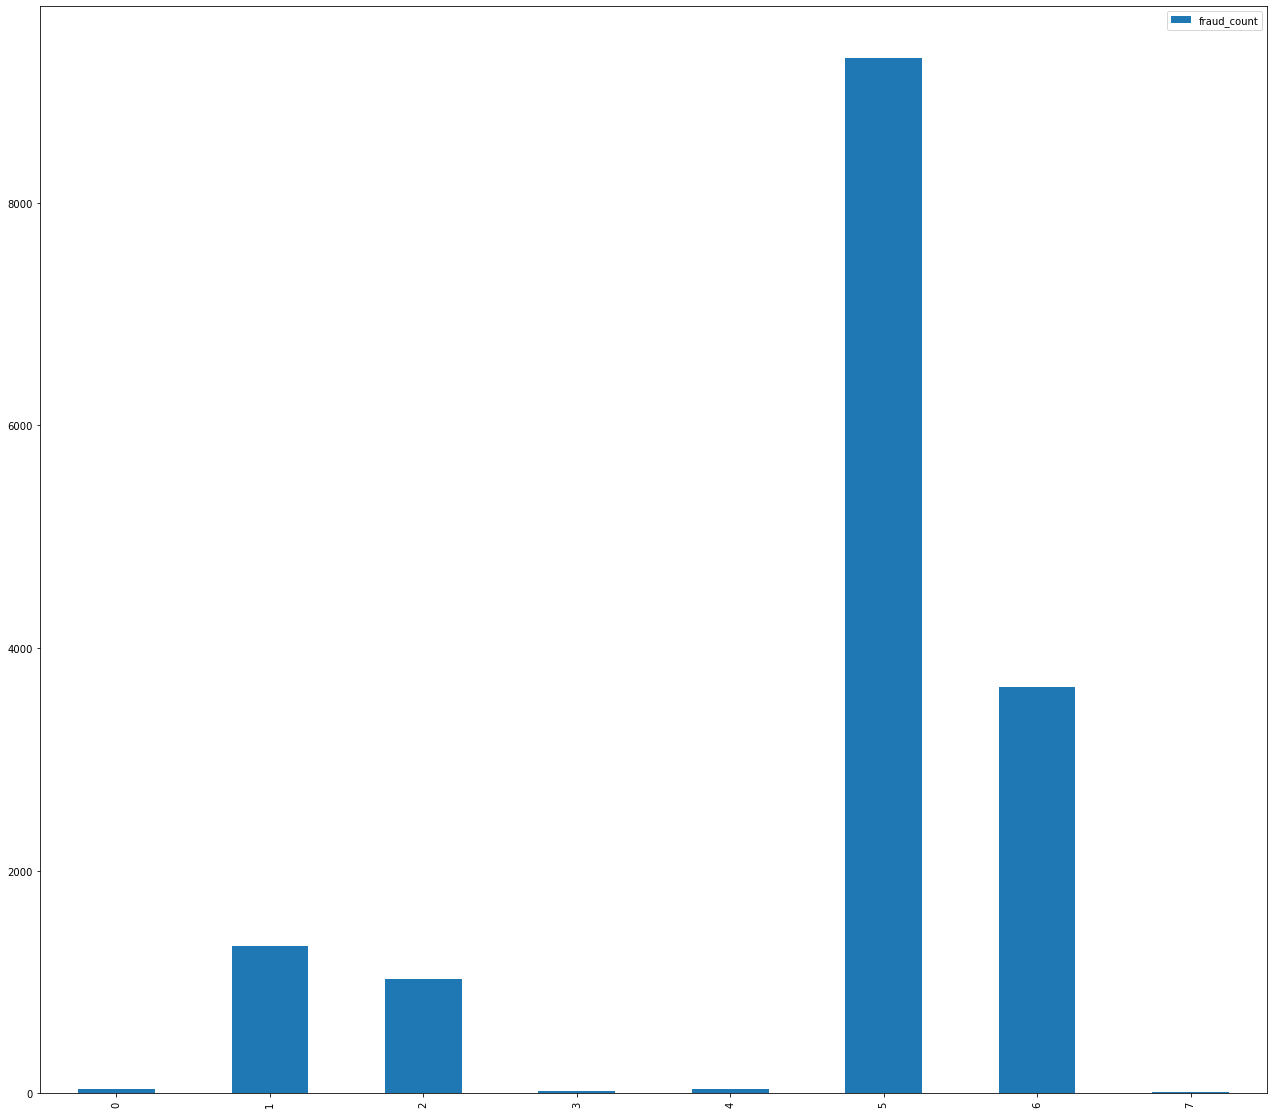

In [50]:
x=df.groupby(["Sex","MaritalStatus"]).size().reset_index().rename(columns={0:"fraud_count"})
x.plot(kind="bar",figsize=(22,20))

## Observations : married & single male claimed significant frauds

### 3.11 Age

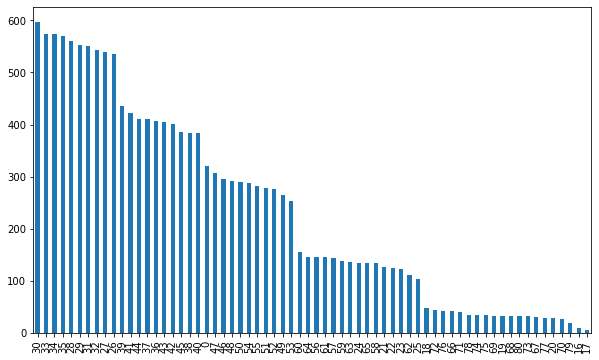

In [51]:
plt.figure(figsize=(10,6))
df["Age"].value_counts().plot(kind="bar")
plt.show()

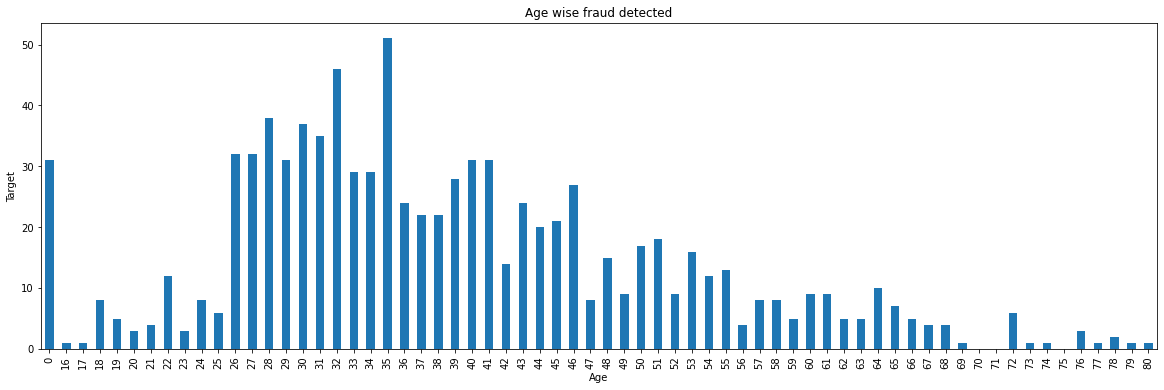

In [23]:
x=df.groupby('Age').Target.sum()
fig=plt.figure(figsize=(20,6))
a=fig.add_subplot(1,1,1)
a.set_xlabel('MaritalStatus')
a.set_ylabel('Target')
a.set_title('Age wise fraud detected')
x.plot(kind='bar')
fig.show()

## Observations : age ranging between 26 to 40 reported significant frauds

### 3.12 Fault

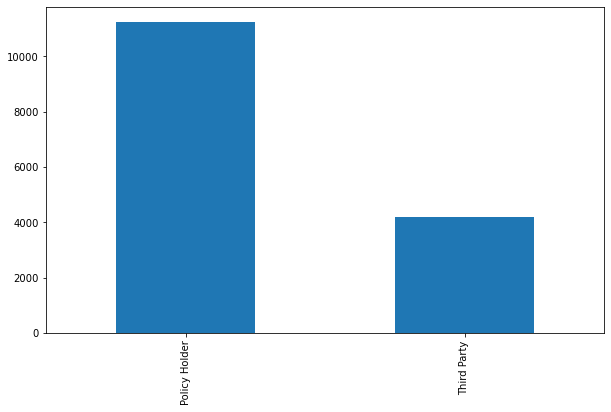

In [53]:
plt.figure(figsize=(10,6))
df["Fault"].value_counts().plot(kind="bar")
plt.show()

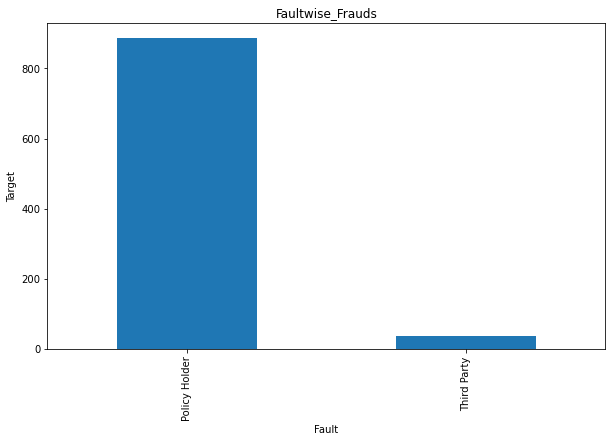

In [54]:
x=df.groupby("Fault").Target.sum()
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("Fault")
ax.set_ylabel("Target")
ax.set_title("Faultwise_Frauds")
x.plot(kind="bar")
fig.show()
plt.savefig("Faults_vs_Frauds")

## Observations : Policy holder claims most of the claims that are fault¶

### 3.13 PolicyType

In [55]:
print(df["PolicyType"].nunique())
print(df["PolicyType"].unique())

9
['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'
 'Utility - All Perils' 'Sedan - All Perils' 'Sedan - Collision'
 'Utility - Collision' 'Utility - Liability' 'Sport - All Perils']


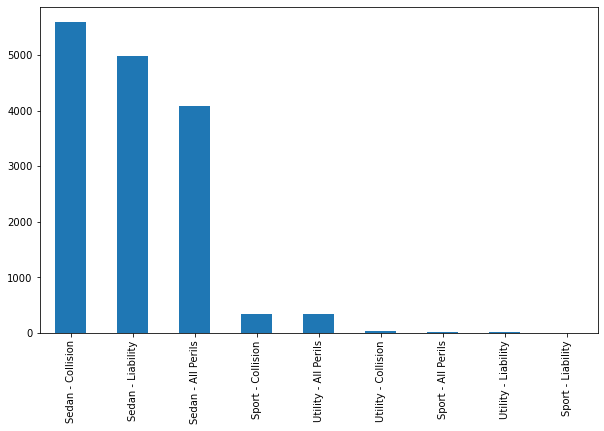

In [56]:
plt.figure(figsize=(10,6))
df["PolicyType"].value_counts().plot(kind="bar")
fig.show()

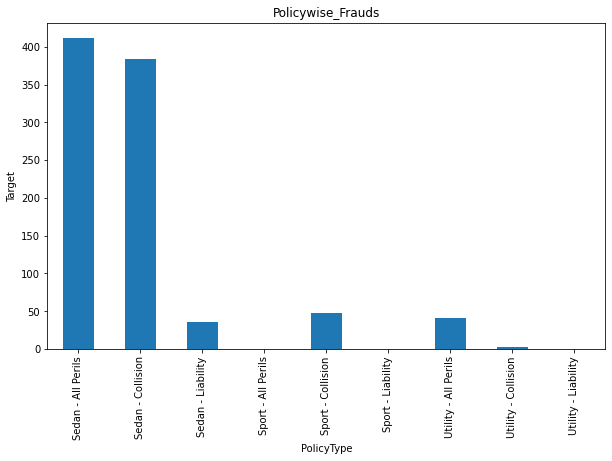

In [57]:
x=df.groupby("PolicyType").Target.sum()
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("PolicyType")
ax.set_ylabel("Target")
ax.set_title("Policywise_Frauds")
x.plot(kind="bar")
fig.show()
plt.savefig("Policywise_Frauds")

## Observations : Sedan all perils and sedan Collision contribute significant fraud claims

### 3.14 VehicleCategory

In [58]:
print(df["VehicleCategory"].nunique())
print(df["VehicleCategory"].unique())

3
['Sport' 'Utility' 'Sedan']


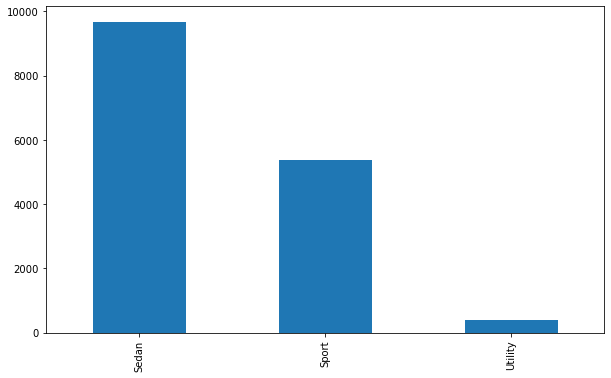

In [59]:
plt.figure(figsize=(10,6))
df["VehicleCategory"].value_counts().plot(kind="bar")
plt.show()

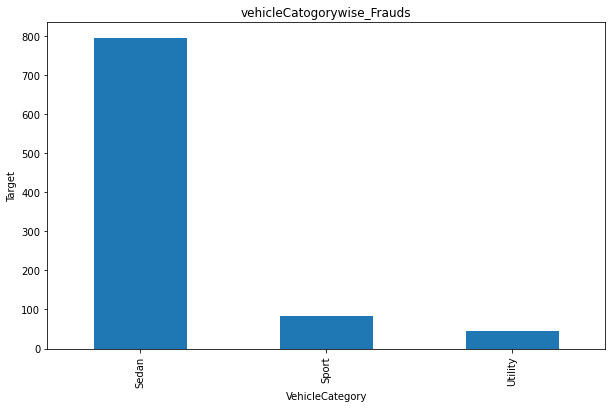

In [60]:
x=df.groupby("VehicleCategory").Target.sum()
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("VehicleCategory")
ax.set_ylabel("Target")
ax.set_title("vehicleCatogorywise_Frauds")
x.plot(kind="bar")
fig.show()
plt.savefig("vehicleCatogorywise_Frauds")

## Observations : Sedan type contributes more fraudelent cases

### 3.15 VehiclePrice

In [61]:
print(df["VehiclePrice"].nunique())
print(df["VehiclePrice"].unique())

6
['more than 69000' '20000 to 29000' '30000 to 39000' 'less than 20000'
 '40000 to 59000' '60000 to 69000']


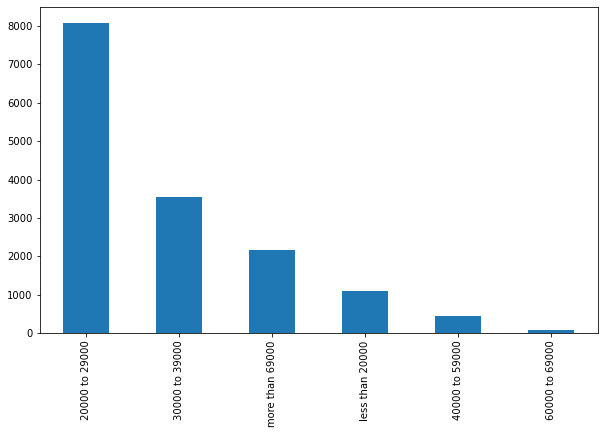

In [62]:
plt.figure(figsize=(10,6))
df["VehiclePrice"].value_counts().plot(kind="bar")
plt.show()

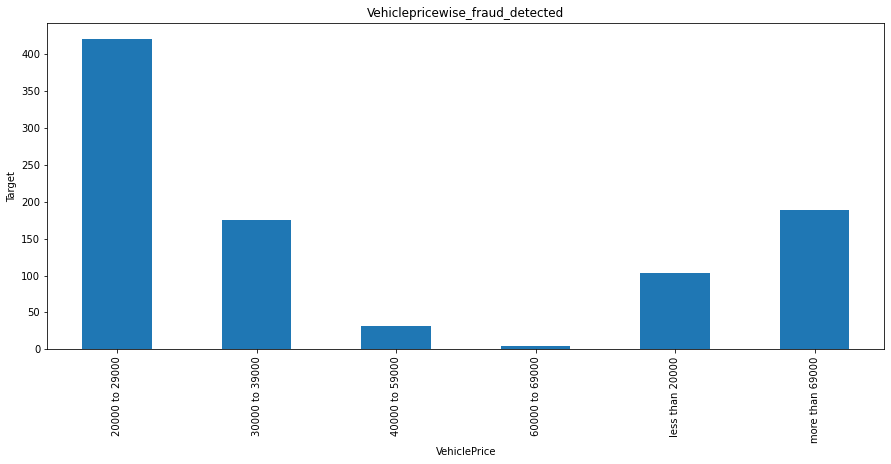

In [63]:
x=df.groupby("VehiclePrice").Target.sum()
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("VehiclePrice")
ax.set_ylabel("Target")
ax.set_title("Vehiclepricewise_fraud_detected")
x.plot(kind="bar")
fig.show()

## Observations : Vehicle price ranging 20000 to 29000 contributes more fraudelent cases

### 3.16 RepNumber

In [64]:
print(df["RepNumber"].nunique())
print(df["RepNumber"].unique())

16
[12 15  7  4  3 14  1 13 11 16  6  2  8  5  9 10]


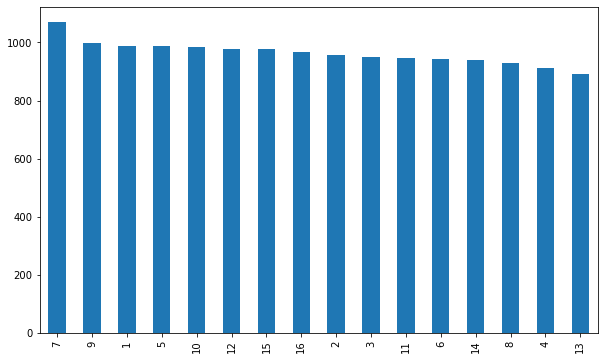

In [65]:
plt.figure(figsize=(10,6))
df["RepNumber"].value_counts().plot(kind="bar")
plt.show()

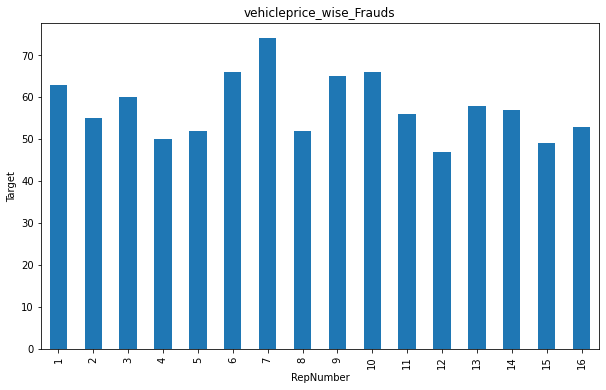

In [66]:
x=df.groupby("RepNumber").Target.sum()
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("RepNumber")
ax.set_ylabel("Target")
ax.set_title("vehicleprice_wise_Frauds")
x.plot(kind="bar")
fig.show()

### Observations : no significant insight found

### 3.17 Deductible

In [67]:
print(df["Deductible"].nunique())
print(df["Deductible"].unique())

4
[300 400 500 700]


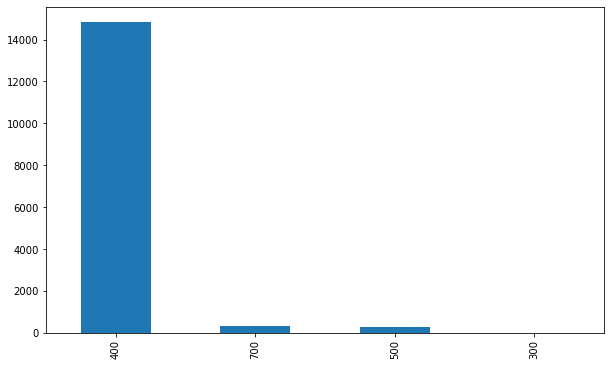

In [68]:
plt.figure(figsize=(10,6))
df["Deductible"].value_counts().plot(kind="bar")
plt.show()

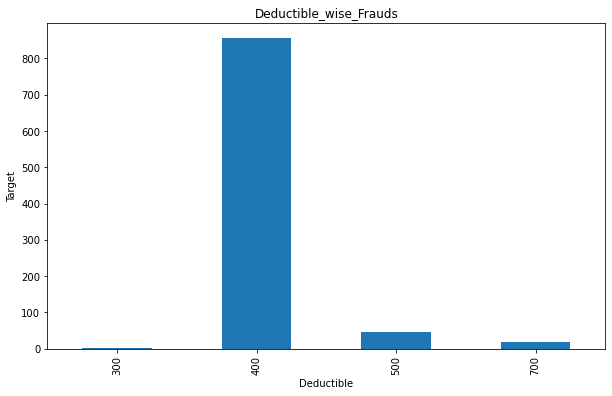

In [69]:
x=df.groupby("Deductible").Target.sum()
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("Deductible")
ax.set_ylabel("Target")
ax.set_title("Deductible_wise_Frauds")
x.plot(kind="bar")
fig.show()


## Observations : 400 contributes in frauds

### 3.18 DriverRating

In [70]:
print(df["DriverRating"].nunique())
print(df["DriverRating"].unique())

4
[1 4 3 2]


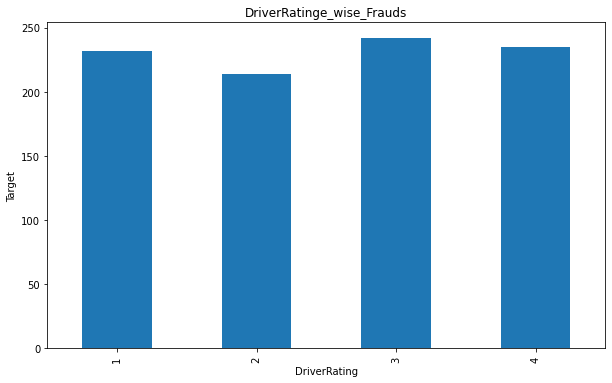

In [71]:
x=df.groupby("DriverRating").Target.sum()
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("DriverRating")
ax.set_ylabel("Target")
ax.set_title("DriverRatinge_wise_Frauds")
x.plot(kind="bar")
fig.show()

## Observations : No insight

### 3.19 Days_Policy_Accident

In [72]:
print(df["Days_Policy_Accident"].nunique())
print(df["Days_Policy_Accident"].unique())

5
['more than 30' '15 to 30' 'none' '1 to 7' '8 to 15']


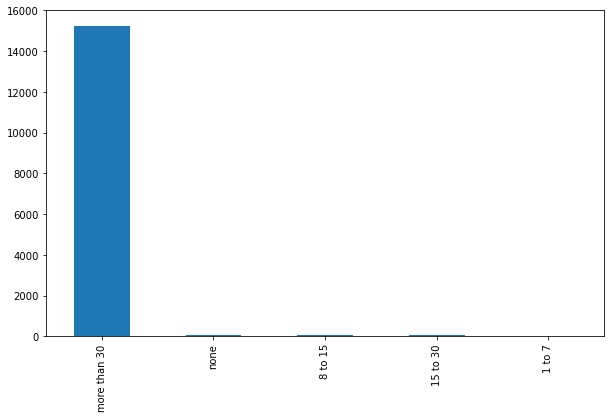

In [73]:
plt.figure(figsize=(10,6))
df["Days_Policy_Accident"].value_counts().plot(kind="bar")
plt.show()

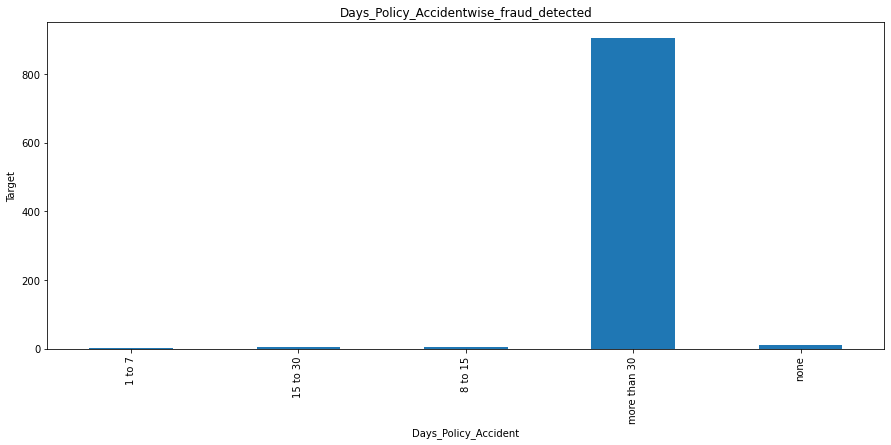

In [74]:
x=df.groupby("Days_Policy_Accident").Target.sum()
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("Days_Policy_Accident")
ax.set_ylabel("Target")
ax.set_title("Days_Policy_Accidentwise_fraud_detected")
x.plot(kind="bar")
fig.show()

## Observations : accident happened in more than past 30 days contribute more in fraud cases

### 3.20 Days_Policy_Claim

In [75]:
print(df["Days_Policy_Claim"].nunique())
print(df["Days_Policy_Claim"].unique())

4
['more than 30' '15 to 30' '8 to 15' 'none']


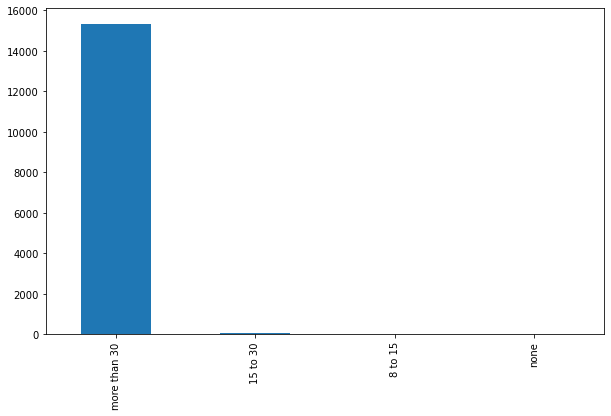

In [76]:
plt.figure(figsize=(10,6))
df["Days_Policy_Claim"].value_counts().plot(kind="bar")
plt.show()

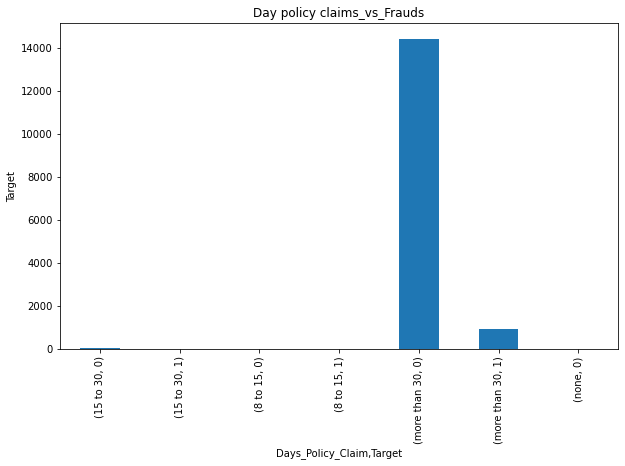

In [77]:
x=df.groupby("Days_Policy_Claim").Target.value_counts()
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("Days_Policy_Claim")
ax.set_ylabel("Target")
ax.set_title("Day policy claims_vs_Frauds")
x.plot(kind="bar")
fig.show()

## Observation: most fraud claims are from policy purchased more than month ago

### 3.21 PastNumberOfClaims

In [78]:
print(df["PastNumberOfClaims"].nunique())
print(df["PastNumberOfClaims"].unique())

4
['none' '1' '2 to 4' 'more than 4']


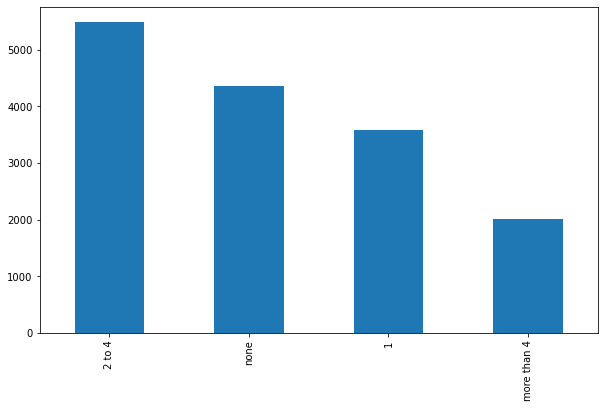

In [79]:
plt.figure(figsize=(10,6))
df["PastNumberOfClaims"].value_counts().plot(kind="bar")
plt.show()

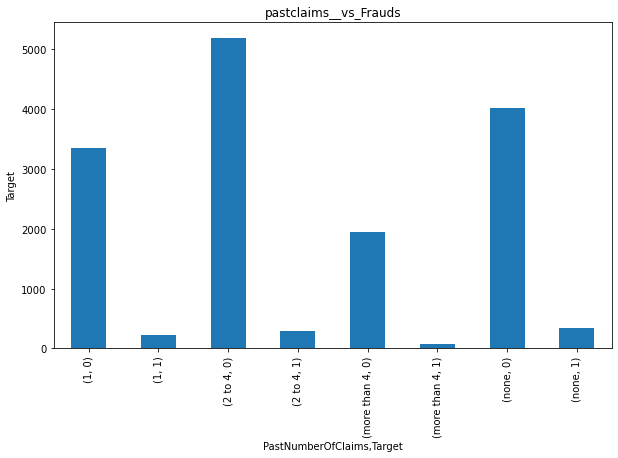

In [80]:
x=df.groupby("PastNumberOfClaims").Target.value_counts()
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("PastNumberOfClaims")
ax.set_ylabel("Target")
ax.set_title("pastclaims__vs_Frauds")
x.plot(kind="bar")
fig.show()

## observations : no significant insights

### 3.22 AgeOfVehicle

In [81]:
print(df["AgeOfVehicle"].nunique())
print(df["AgeOfVehicle"].unique())

8
['3 years' '6 years' '7 years' 'more than 7' '5 years' 'new' '4 years'
 '2 years']


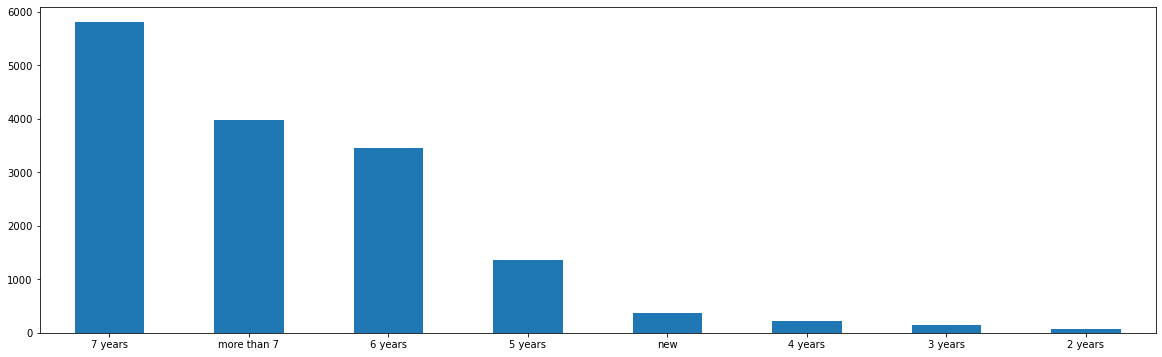

In [82]:
plt.figure(figsize=(20,6))
df["AgeOfVehicle"].value_counts().plot(kind="bar")
plt.xticks(rotation = 0);
fig.show()

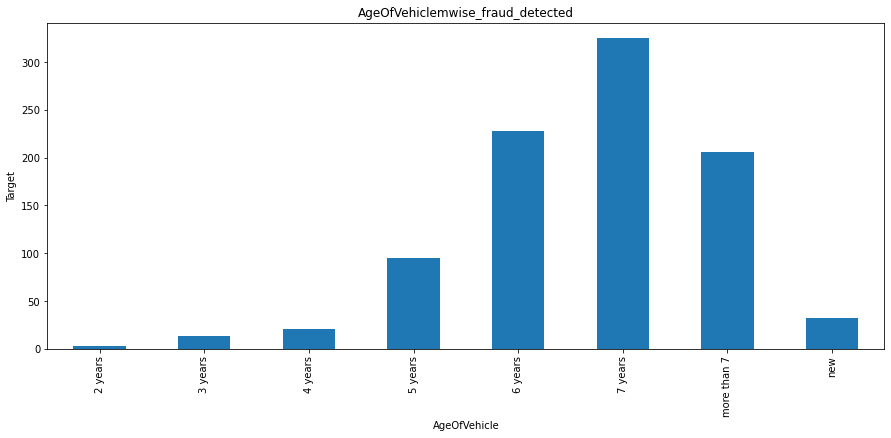

In [83]:
x=df.groupby("AgeOfVehicle").Target.sum()
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("AgeOfVehicle")
ax.set_ylabel("Target")
ax.set_title("AgeOfVehiclemwise_fraud_detected")
x.plot(kind="bar")
fig.show()

## Observations : Old vehicles claimed significant fraud claims

### 3.23 AgeOfPolicyHolder

In [84]:
print(df["AgeOfPolicyHolder"].nunique())
print(df["AgeOfPolicyHolder"].unique())

9
['26 to 30' '31 to 35' '41 to 50' '51 to 65' '21 to 25' '36 to 40'
 '16 to 17' 'over 65' '18 to 20']


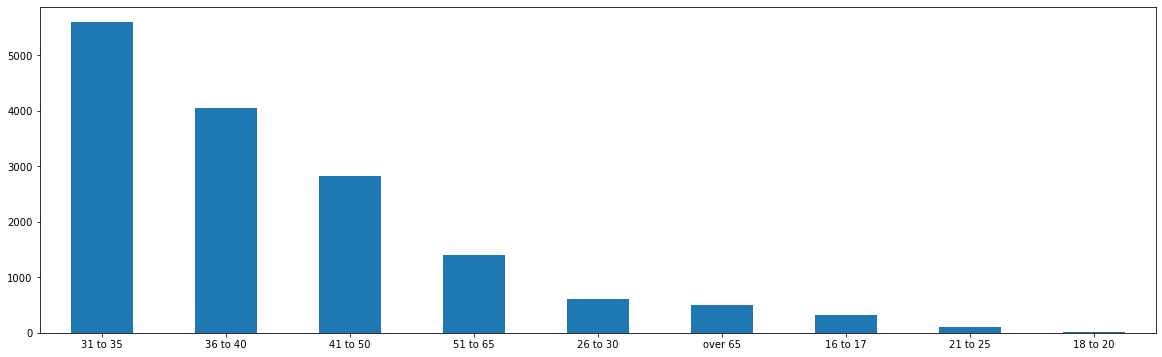

In [85]:
plt.figure(figsize=(20,6))
df["AgeOfPolicyHolder"].value_counts().plot(kind="bar")
plt.xticks(rotation = 0);
fig.show()

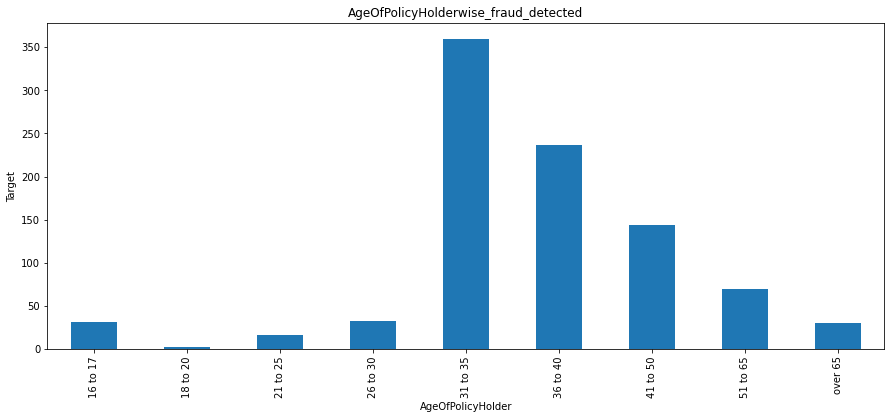

In [86]:
x=df.groupby("AgeOfPolicyHolder").Target.sum()
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("AgeOfPolicyHolder")
ax.set_ylabel("Target")
ax.set_title("AgeOfPolicyHolderwise_fraud_detected")
x.plot(kind="bar")
fig.show()

## Observation : Insurance owner aged between 31-40 claimed more fraud claims

### 3.24 PoliceReportFiled

In [87]:
print(df["PoliceReportFiled"].nunique())
print(df["PoliceReportFiled"].unique())

2
['No' 'Yes']


In [25]:
df["PoliceReportFiled"].value_counts(normalize=True)

No     0.972244
Yes    0.027756
Name: PoliceReportFiled, dtype: float64

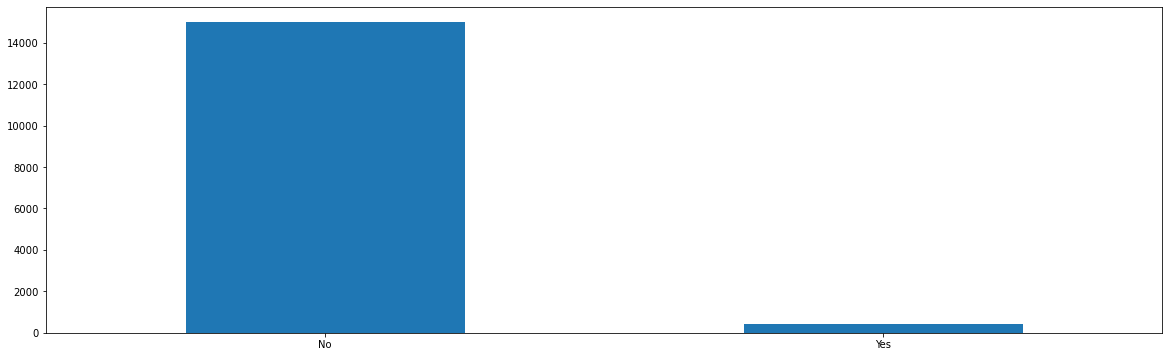

In [88]:
plt.figure(figsize=(20,6))
df["PoliceReportFiled"].value_counts().plot(kind="bar")
plt.xticks(rotation = 0);
fig.show()

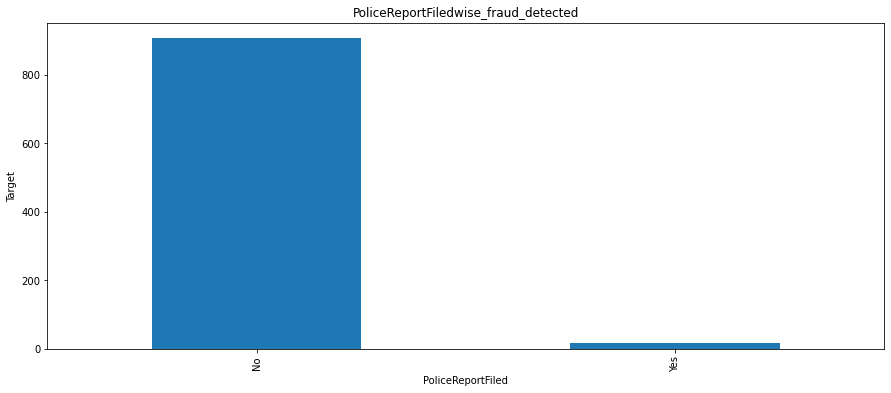

In [89]:
x=df.groupby("PoliceReportFiled").Target.sum()
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("PoliceReportFiled")
ax.set_ylabel("Target")
ax.set_title("PoliceReportFiledwise_fraud_detected")
x.plot(kind="bar")
fig.show()

### 3.25 WitnessPresent

In [90]:
print(df["WitnessPresent"].nunique())
print(df["WitnessPresent"].unique())

2
['No' 'Yes']


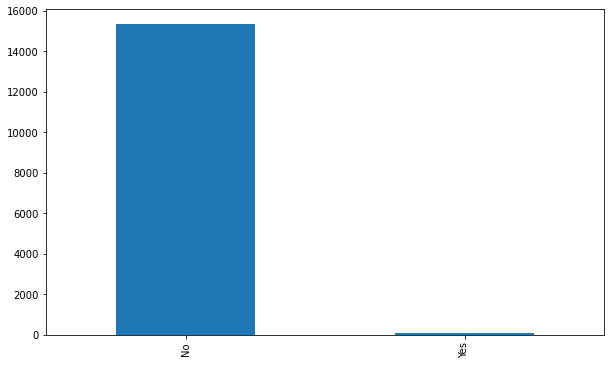

In [91]:
plt.figure(figsize=(10,6))
df["WitnessPresent"].value_counts().plot(kind="bar")
plt.show()

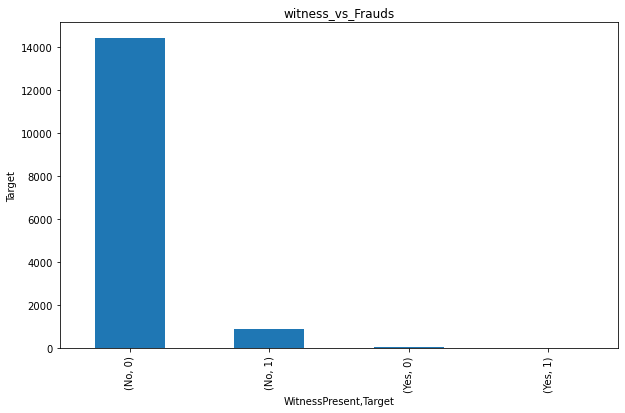

In [92]:
x=df.groupby("WitnessPresent").Target.value_counts()
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("WitnessPresent")
ax.set_ylabel("Target")
ax.set_title("witness_vs_Frauds")
x.plot(kind="bar")
fig.show()

## Observations : major fraud claims have no witness present at time of accident reported

### 3.26 AgentType

In [93]:
print(df["AgentType"].nunique())
print(df["AgentType"].unique())

2
['External' 'Internal']


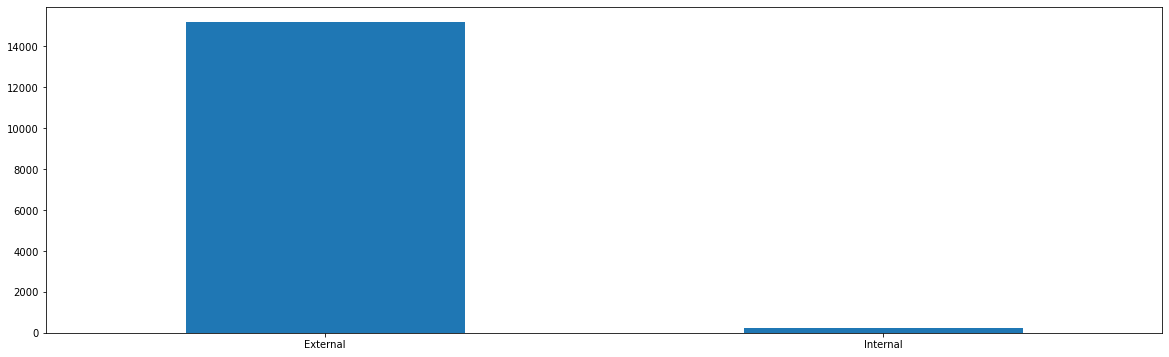

In [94]:
plt.figure(figsize=(20,6))
df["AgentType"].value_counts().plot(kind="bar")
plt.xticks(rotation = 0);
fig.show()

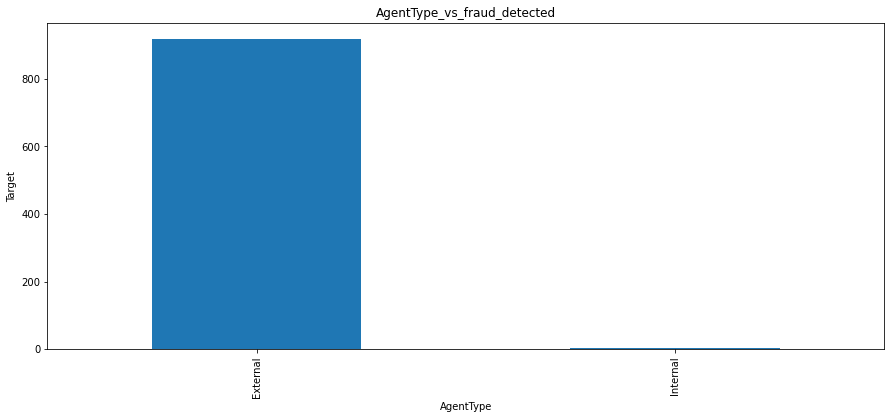

In [95]:
x=df.groupby("AgentType").Target.sum()
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("AgentType")
ax.set_ylabel("Target")
ax.set_title("AgentType_vs_fraud_detected")
x.plot(kind="bar")
fig.show()

### 3.27 NumberOfSuppliments

In [96]:
print(df["NumberOfSuppliments"].nunique())
print(df["NumberOfSuppliments"].unique())

4
['none' 'more than 5' '3 to 5' '1 to 2']


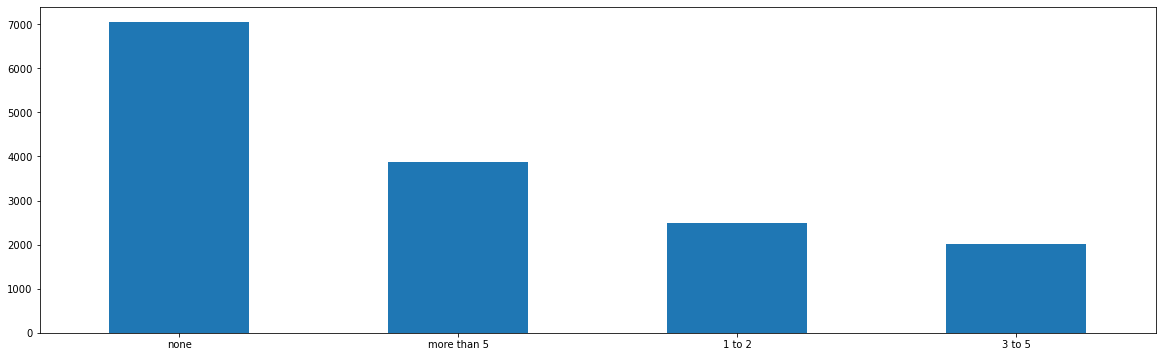

In [97]:
plt.figure(figsize=(20,6))
df["NumberOfSuppliments"].value_counts().plot(kind="bar")
plt.xticks(rotation = 0);
fig.show()

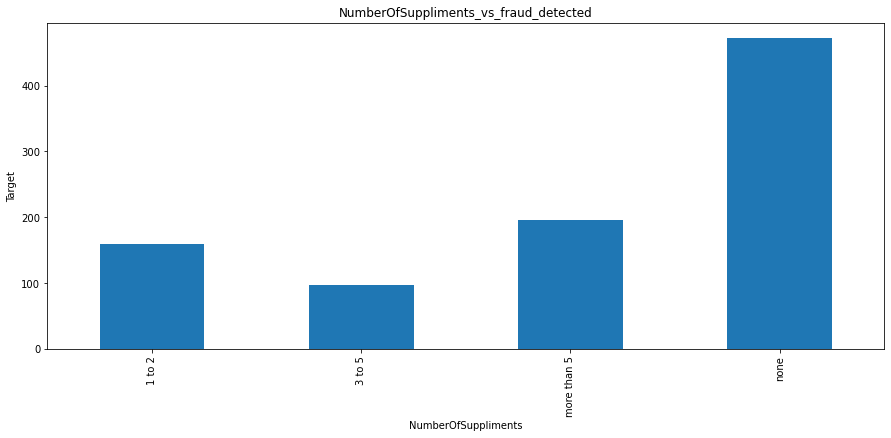

In [98]:
x=df.groupby("NumberOfSuppliments").Target.sum()
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("NumberOfSuppliments")
ax.set_ylabel("Target")
ax.set_title("NumberOfSuppliments_vs_fraud_detected")
x.plot(kind="bar")
fig.show()

### 3.28 NumberOfCars

In [99]:
print(df["NumberOfCars"].nunique())
print(df['NumberOfCars'].unique())

5
['1 year' 'no change' '4 to 8 years' '2 to 3 years' 'under 6 months']


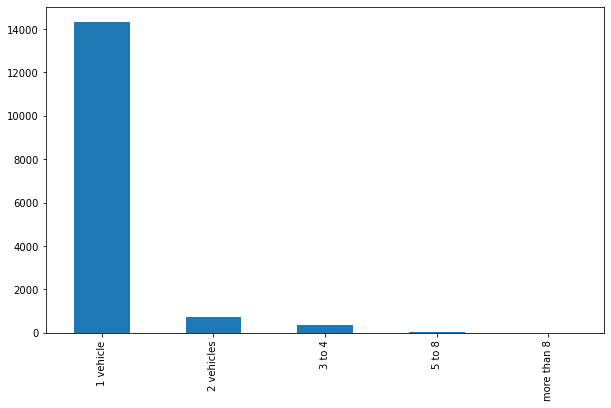

In [100]:
plt.figure(figsize=(10,6))
df['NumberOfCars'].value_counts().plot(kind="bar")
df["].value_counts().plot(kind="bar")
plt.show()

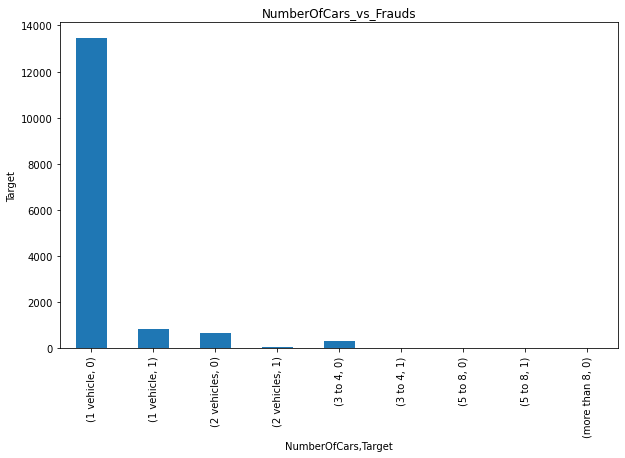

In [101]:
x=df.groupby("NumberOfCars").Target.value_counts()
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("NumberOfCars")
ax.set_ylabel("Target")
ax.set_title("NumberOfCars_vs_Frauds")
x.plot(kind="bar")
fig.show()

## observation:major fraud claims are who have 1 car.

### 3.29 BasePolicy¶

In [102]:
print(df["BasePolicy"].nunique())
print(df["BasePolicy"].unique())

3
['Liability' 'Collision' 'All Perils']


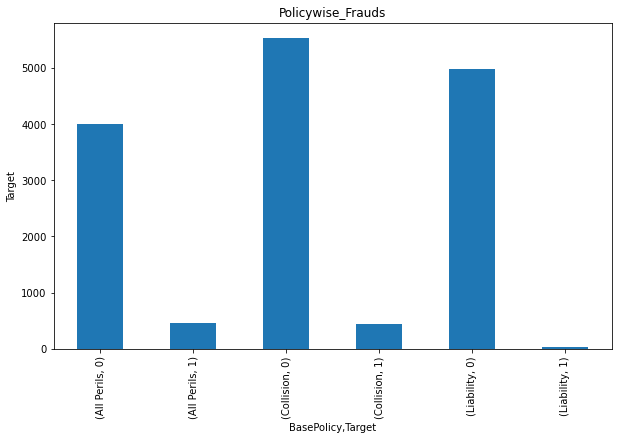

In [103]:
x=df.groupby("BasePolicy").Target.value_counts()
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("BasePolicy")
ax.set_ylabel("Target")
ax.set_title("Policywise_Frauds")
x.plot(kind="bar")
fig.show()

### 3.30 Year¶

In [104]:
print(df["Year"].nunique())
print(df["Year"].unique())

3
[1994 1995 1996]


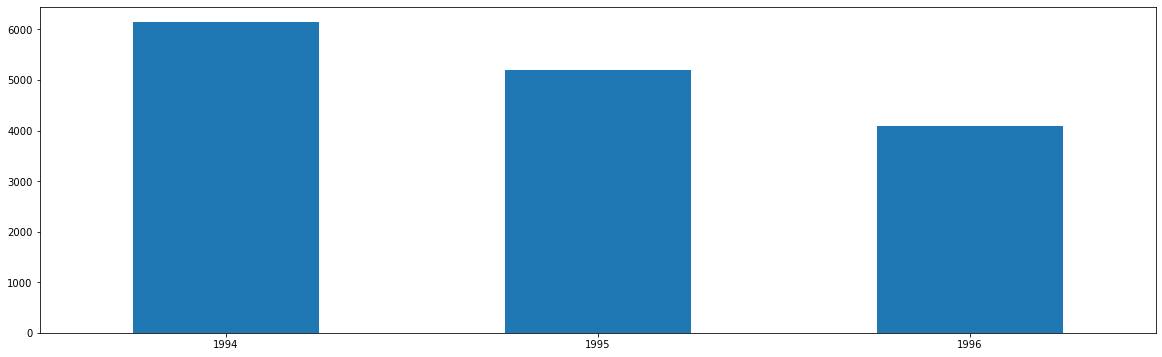

In [105]:
plt.figure(figsize=(20,6))
df["Year"].value_counts().plot(kind="bar")
plt.xticks(rotation = 0);
fig.show()

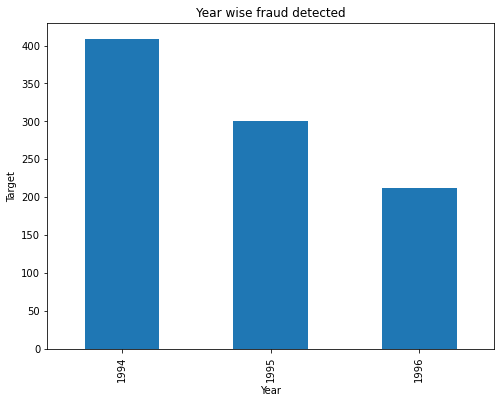

In [106]:
x=df.groupby('Year').Target.sum()
fig=plt.figure(figsize=(8,6))
a=fig.add_subplot(1,1,1)
a.set_xlabel('MaritalStatus')
a.set_ylabel('Target')
a.set_title('Year wise fraud detected')
x.plot(kind='bar')
fig.show()

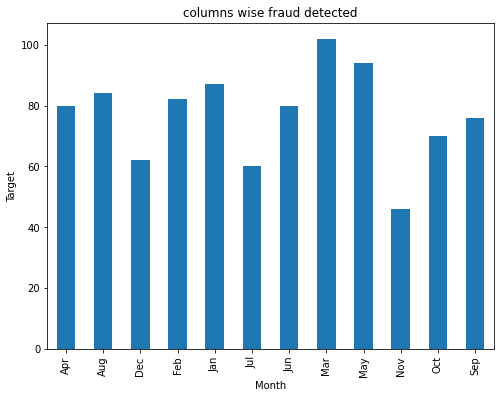

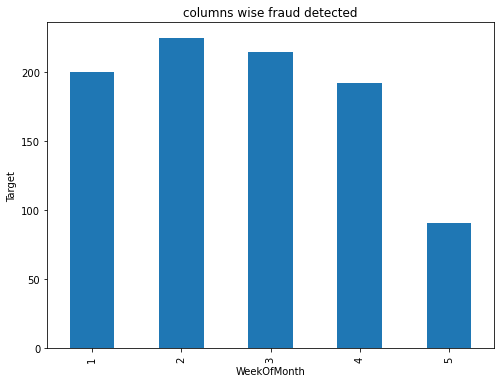

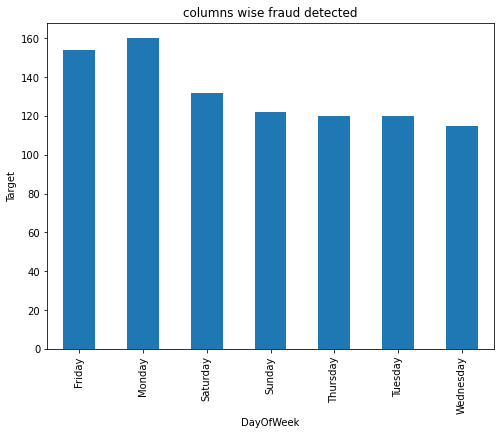

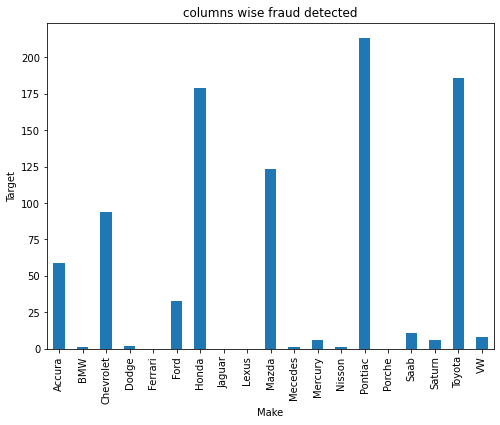

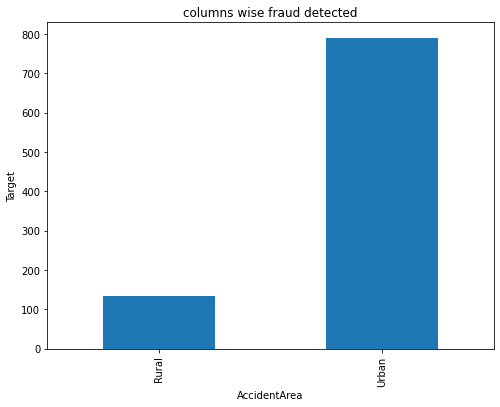

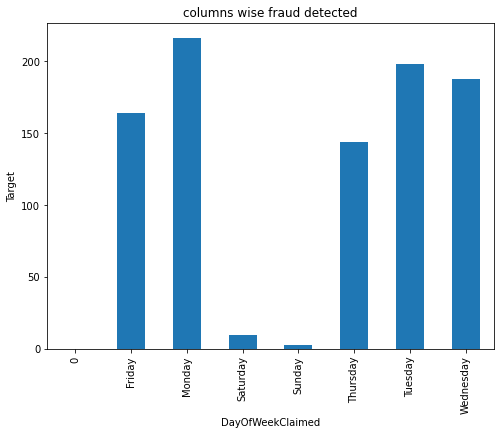

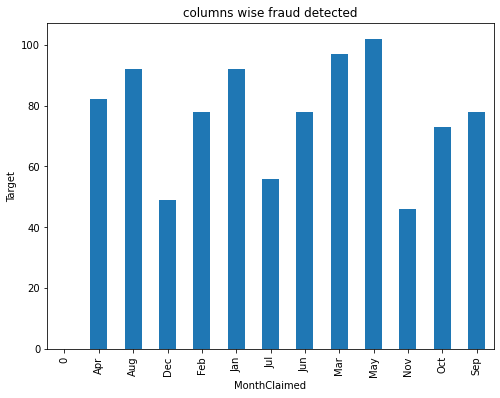

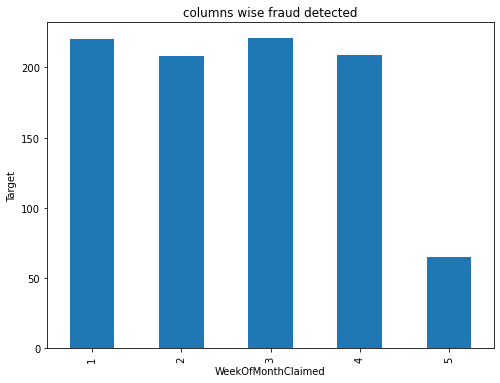

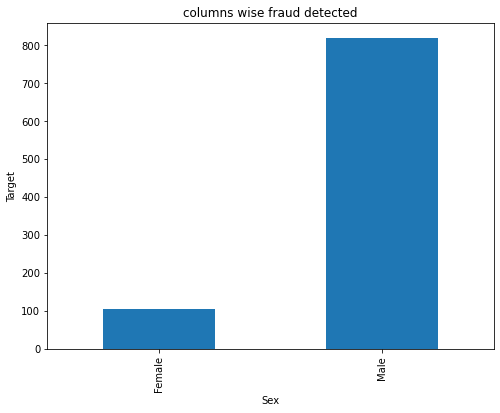

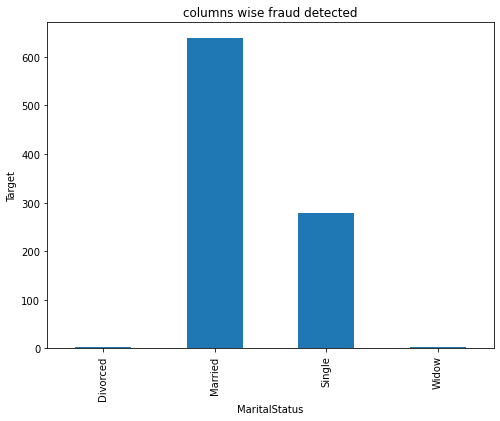

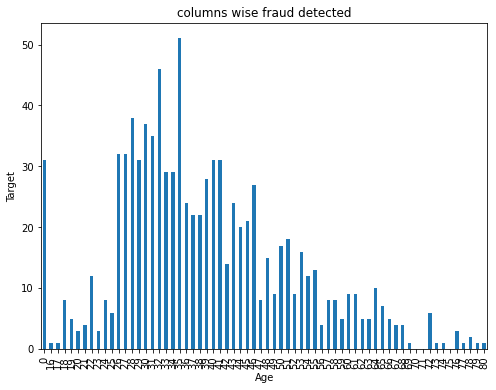

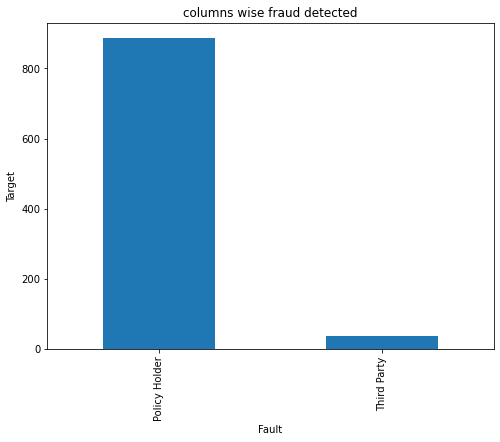

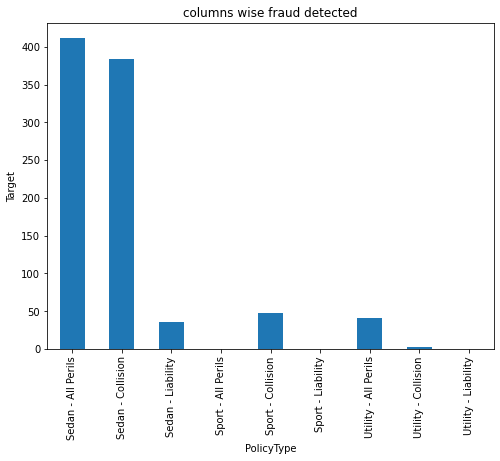

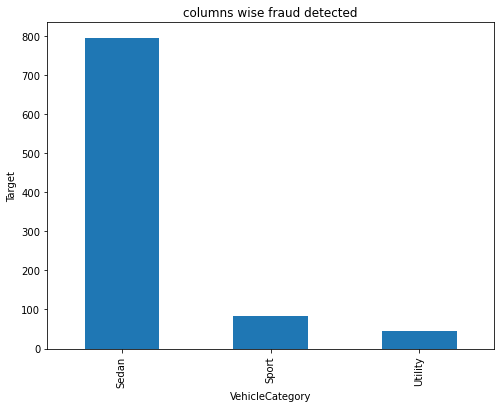

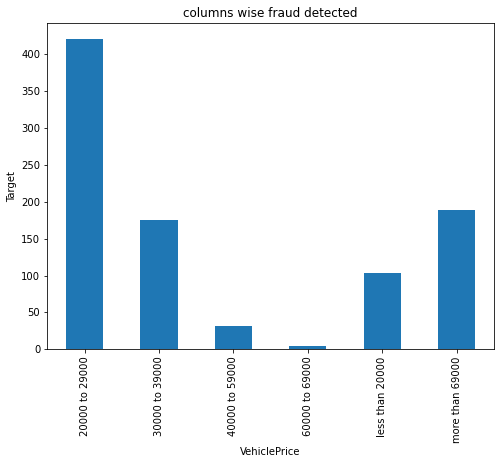

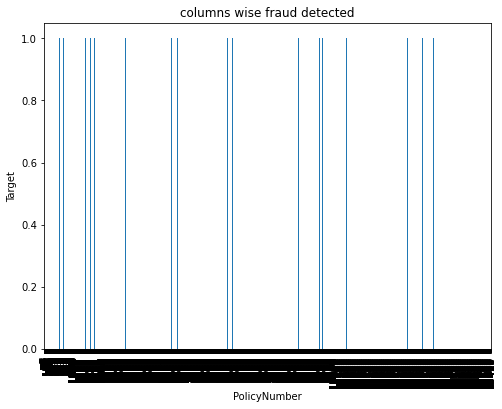

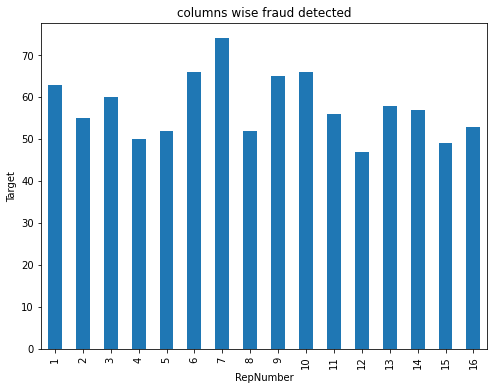

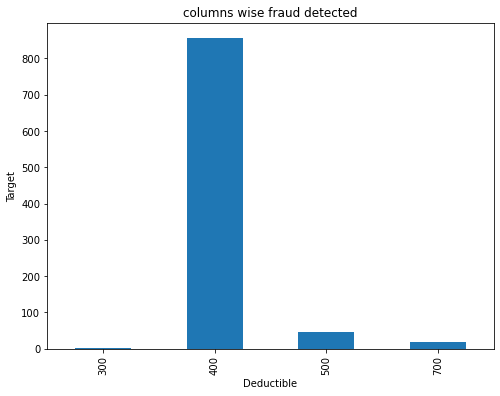

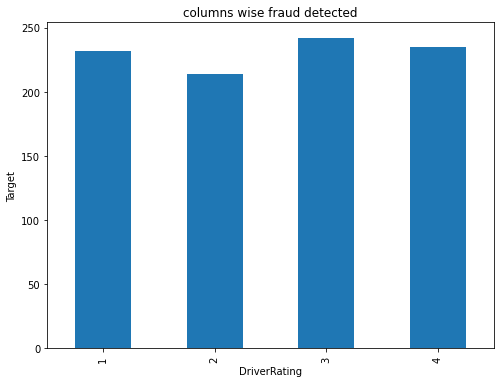

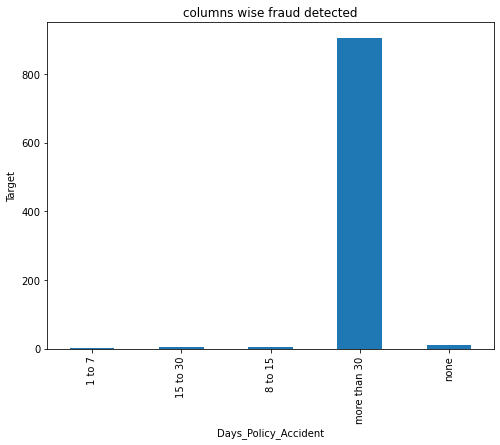

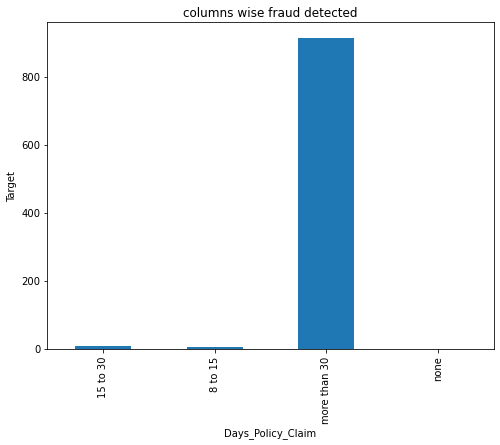

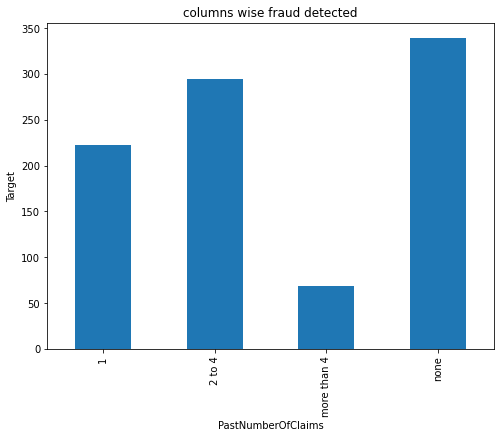

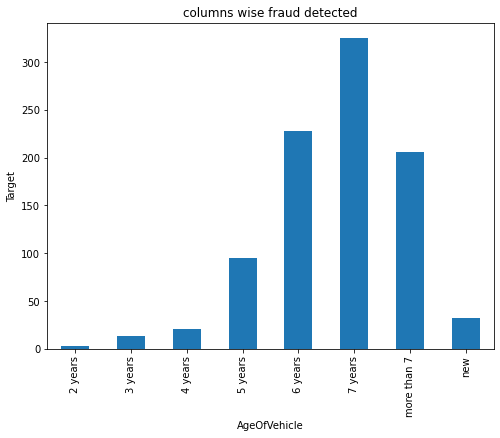

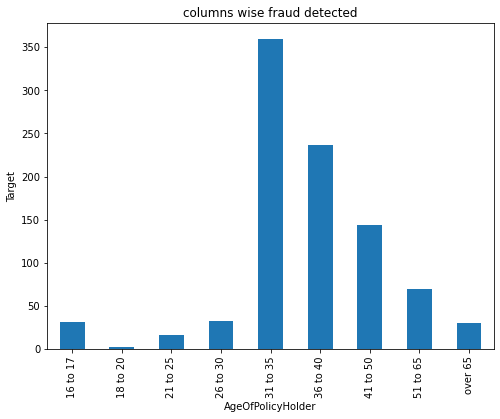

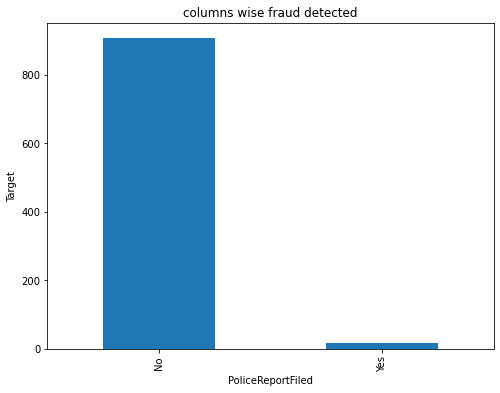

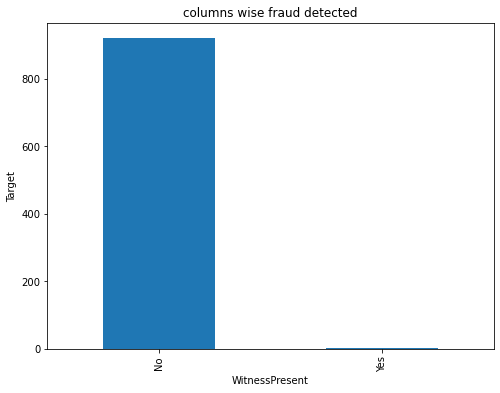

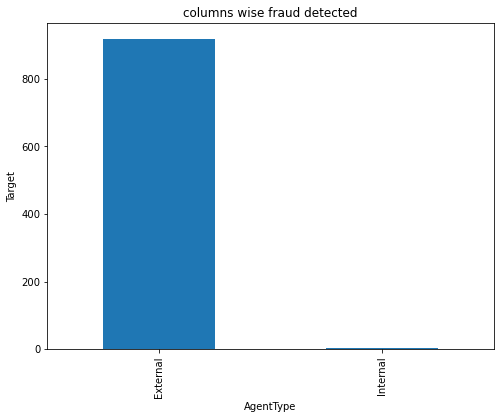

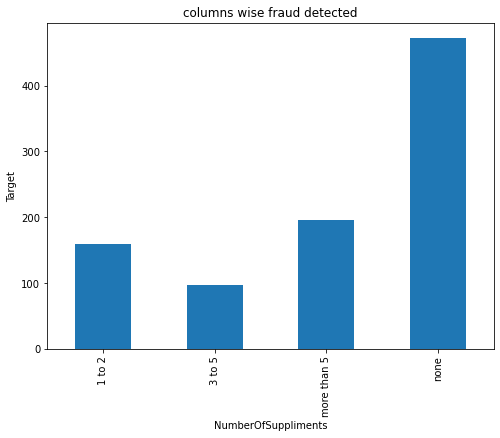

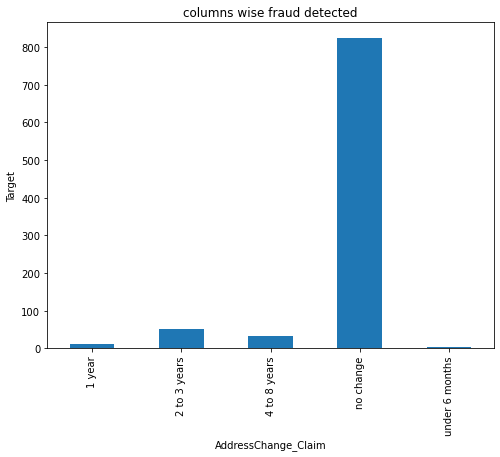

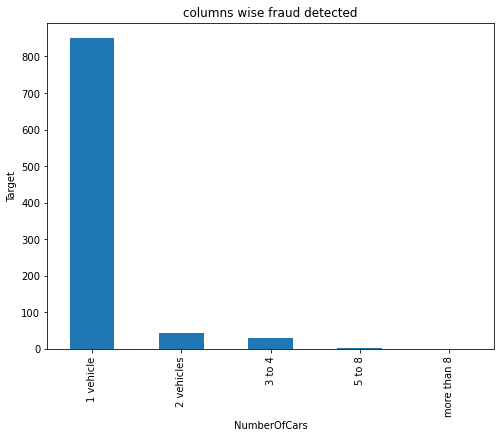

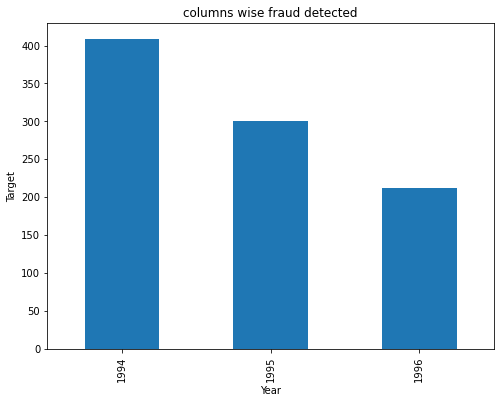

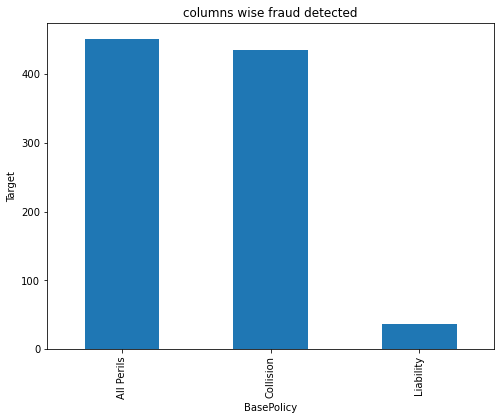

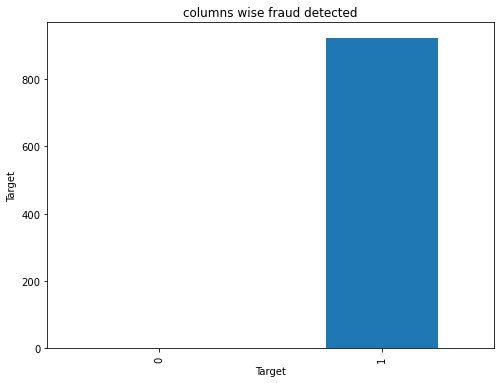

In [20]:
for columns in df:
    x=df.groupby(columns).Target.sum()
    fig=plt.figure(figsize=(8,6))
    a=fig.add_subplot(1,1,1)
    a.set_xlabel(columns)
    a.set_ylabel('Target')
    a.set_title('columns wise fraud detected')
    x.plot(kind='bar')
    fig.show()

# 4. Feature Engineering

In [24]:
# Assign object columns in df1

In [25]:
df1=df.select_dtypes(include='object')
df1

Month  DayOfWeek     Make AccidentArea DayOfWeekClaimed MonthClaimed  \
0       Dec  Wednesday    Honda        Urban          Tuesday          Jan   
1       Jan  Wednesday    Honda        Urban           Monday          Jan   
2       Oct     Friday    Honda        Urban         Thursday          Nov   
3       Jun   Saturday   Toyota        Rural           Friday          Jul   
4       Jan     Monday    Honda        Urban          Tuesday          Feb   
...     ...        ...      ...          ...              ...          ...   
15415   Nov     Friday   Toyota        Urban          Tuesday          Nov   
15416   Nov   Thursday  Pontiac        Urban           Friday          Dec   
15417   Nov   Thursday   Toyota        Rural           Friday          Dec   
15418   Dec     Monday   Toyota        Urban         Thursday          Dec   
15419   Dec  Wednesday   Toyota        Urban         Thursday          Dec   

          Sex MaritalStatus          Fault          PolicyType  ...  \
0      Female        Single  Policy Holder   Sport - Liability  ...   
1        Male        Single  Policy Holder   Sport - Collision  ...   
2        Male       Married  Policy Holder   Sport - Collision  ...   
3        Male       Married    Third Party   Sedan - Liability  ...   
4      Female        Single    Third Party   Sport - Collision  ...   
...       ...           ...            ...                 ...  ...   
15415    Male       Married  Policy Holder   Sedan - Collision  ...   
15416    Male       Married  Policy Holder   Sedan - Liability  ...   
15417    Male        Single  Policy Holder   Sedan - Collision  ...   
15418  Female       Married    Third Party  Sedan - All Perils  ...   
15419    Male        Single  Policy Holder   Sedan - Collision  ...   

      PastNumberOfClaims AgeOfVehicle AgeOfPolicyHolder PoliceReportFiled  \
0                   none      3 years          26 to 30                No   
1                   none      6 years          31 to 35               Yes   
2                      1      7 years          41 to 50                No   
3                      1  more than 7          51 to 65               Yes   
4                   none      5 years          31 to 35                No   
...                  ...          ...               ...               ...   
15415             2 to 4      6 years          31 to 35                No   
15416        more than 4      6 years          31 to 35                No   
15417        more than 4      5 years          26 to 30                No   
15418               none      2 years          31 to 35                No   
15419               none      5 years          26 to 30                No   

      WitnessPresent AgentType NumberOfSuppliments AddressChange_Claim  \
0                 No  External                none              1 year   
1                 No  External                none           no change   
2                 No  External                none           no change   
3                 No  External         more than 5           no change   
4                 No  External                none           no change   
...              ...       ...                 ...                 ...   
15415             No  External                none           no change   
15416             No  External         more than 5           no change   
15417             No  External              1 to 2           no change   
15418             No  External         more than 5           no change   
15419             No  External              1 to 2           no change   

      NumberOfCars  BasePolicy  
0           3 to 4   Liability  
1        1 vehicle   Collision  
2        1 vehicle   Collision  
3        1 vehicle   Liability  
4        1 vehicle   Collision  
...            ...         ...  
15415    1 vehicle   Collision  
15416       3 to 4   Liability  
15417    1 vehicle   Collision  
15418    1 vehicle  All Perils  
15419    1 vehicle   Collision  

[1542

In [26]:
df1.shape

(15420, 24)

In [27]:
column_keys=df1.columns.tolist()
for i in column_keys:
    print(i)
    print(df1[i].unique(),end='\n')
    print(end='\n')

Month
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']

DayOfWeek
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

Make
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']

AccidentArea
['Urban' 'Rural']

DayOfWeekClaimed
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']

MonthClaimed
['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']

Sex
['Female' 'Male']

MaritalStatus
['Single' 'Married' 'Widow' 'Divorced']

Fault
['Policy Holder' 'Third Party']

PolicyType
['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'
 'Utility - All Perils' 'Sedan - All Perils' 'Sedan - Collision'
 'Utility - Collision' 'Utility - Liability' 'Sport - All Perils']

VehicleCategory
['Sport' 'Utility' 'Sedan']

VehiclePrice
['more than 69000' '20000 to 29000' '30000 to 39000' 'less th

## 4.1 Encoding

In [28]:
# Replace all object values with integer.

In [29]:
df1['Month'].replace({'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6, 'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':12,'Dec':12},
                     inplace=True)
df1['DayOfWeek'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5, 'Saturday':6,'Sunday':7},inplace=True)
df1['AccidentArea'].replace({'Urban':0,'Rural':1},inplace=True)
df1['DayOfWeekClaimed'].replace({'0':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5, 'Saturday':6,'Sunday':7},
                                inplace=True)
df1['MonthClaimed'].replace({'0':0,'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6, 'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':12,
                             'Dec':12},inplace=True)
df1['Sex'].replace({'Female':0,'Male':1},inplace=True)
df1['Fault'].replace({'Policy Holder':0, 'Third Party':1},inplace=True)
df1['VehicleCategory'].replace({'Sport':0, 'Utility':1, 'Sedan':2},inplace=True)
df1['PoliceReportFiled'].replace({'No':0, 'Yes':1},inplace=True)
df1['WitnessPresent'].replace({'No':0, 'Yes':1},inplace=True)
df1['BasePolicy'].replace({'Liability':0, 'Collision':1, 'All Perils':2},inplace=True)


df1['MaritalStatus'].replace({'Single':0, 'Married':1, 'Widow':2, 'Divorced':3},inplace=True)
df1['VehiclePrice'].replace({'more than 69000':69000, '20000 to 29000':25000, '30000 to 39000':35000, 'less than 20000':20000,
                        '40000 to 59000':50000, '60000 to 69000':65000},inplace=True)
df1['Days_Policy_Accident'].replace({'more than 30':30, '15 to 30':23, 'none':0, '1 to 7':4, '8 to 15':12},inplace=True)
df1['Days_Policy_Claim'].replace({'more than 30':30, '15 to 30':23, '8 to 15':12, 'none':0},inplace=True)
df1['PastNumberOfClaims'].replace({'none':0, '1':1, '2 to 4':3, 'more than 4':4},inplace=True)
df1['AgeOfPolicyHolder'].replace({'26 to 30':28, '31 to 35':33, '41 to 50':45, '51 to 65':57, '21 to 25':23, '36 to 40':38,
 '16 to 17':17, 'over 65':65, '18 to 20':19},inplace=True)
df1['AgentType'].replace({'External':0, 'Internal':1},inplace=True)
df1['NumberOfSuppliments'].replace({'none':0, 'more than 5':5, '3 to 5':4, '1 to 2':2},inplace=True)
df1['AddressChange_Claim'].replace({'1 year':1, 'no change':0, '4 to 8 years':6, '2 to 3 years':3, 'under 6 months':5},
                                   inplace=True)
df1['NumberOfCars'].replace({'3 to 4':4, '1 vehicle':1, '2 vehicles':2, '5 to 8':7, 'more than 8':8},inplace=True)
df1['AgeOfVehicle'].replace({'3 years':3, '6 years':6, '7 years':7, 'more than 7':8, '5 years':5,'new':0, '4 years':4,
                    '2 years':2}, inplace=True)



In [30]:
df1.select_dtypes(include='object')

Make          PolicyType
0        Honda   Sport - Liability
1        Honda   Sport - Collision
2        Honda   Sport - Collision
3       Toyota   Sedan - Liability
4        Honda   Sport - Collision
...        ...                 ...
15415   Toyota   Sedan - Collision
15416  Pontiac   Sedan - Liability
15417   Toyota   Sedan - Collision
15418   Toyota  Sedan - All Perils
15419   Toyota   Sedan - Collision

[15420 rows x 2 columns]

In [31]:
df1_make = pd.get_dummies(df1['Make'],prefix="Make",drop_first=True)
df1_make

Make_BMW  Make_Chevrolet  Make_Dodge  Make_Ferrari  Make_Ford  \
0             0               0           0             0          0   
1             0               0           0             0          0   
2             0               0           0             0          0   
3             0               0           0             0          0   
4             0               0           0             0          0   
...         ...             ...         ...           ...        ...   
15415         0               0           0             0          0   
15416         0               0           0             0          0   
15417         0               0           0             0          0   
15418         0               0           0             0          0   
15419         0               0           0             0          0   

       Make_Honda  Make_Jaguar  Make_Lexus  Make_Mazda  Make_Mecedes  \
0               1            0           0           0             0   
1               1            0           0           0             0   
2               1            0           0           0             0   
3               0            0           0           0             0   
4               1            0           0           0             0   
...           ...          ...         ...         ...           ...   
15415           0            0           0           0             0   
15416           0            0           0           0             0   
15417           0            0           0           0             0   
15418           0            0           0           0             0   
15419           0            0           0           0             0   

       Make_Mercury  Make_Nisson  Make_Pontiac  Make_Porche  Make_Saab  \
0                 0            0             0            0          0   
1                 0            0             0            0          0   
2                 0            0             0            0          0   
3                 0            0             0            0          0   
4                 0            0             0            0          0   
...             ...          ...           ...          ...        ...   
15415             0            0             0            0          0   
15416             0            0             1            0          0   
15417             0            0             0            0          0   
15418             0            0             0            0          0   
15419             0            0             0            0          0   

       Make_Saturn  Make_Toyota  Make_VW  
0                0            0        0  
1                0            0        0  
2                0            0        0  
3                0            1        0  
4                0            0        0  
...            ...          ...      ...  
15415            0            1        0  
15416            0            0        0  
15417            0            1        0  
15418            0            1        0  
15419            0            1        0  

[15420 rows x 18 columns]

In [32]:
df1_PolicyType = pd.get_dummies(df1['PolicyType'],prefix="PolicyType",drop_first=True)
df1_PolicyType

PolicyType_Sedan - Collision  PolicyType_Sedan - Liability  \
0                                 0                             0   
1                                 0                             0   
2                                 0                             0   
3                                 0                             1   
4                                 0                             0   
...                             ...                           ...   
15415                             1                             0   
15416                             0                             1   
15417                             1                             0   
15418                             0                             0   
15419                             1                             0   

       PolicyType_Sport - All Perils  PolicyType_Sport - Collision  \
0                                  0                             0   
1                                  0                             1   
2                                  0                             1   
3                                  0                             0   
4                                  0                             1   
...                              ...                           ...   
15415                              0                             0   
15416                              0                             0   
15417                              0                             0   
15418                              0                             0   
15419                              0                             0   

       PolicyType_Sport - Liability  PolicyType_Utility - All Perils  \
0                                 1                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   
...                             ...                              ...   
15415                             0                                0   
15416                             0                                0   
15417                             0                                0   
15418                             0                                0   
15419                             0                                0   

       PolicyType_Utility - Collision  PolicyType_Utility - Liability  
0                                   0                               0  
1                                   0                               0  
2                                   0                               0  
3                                   0                               0  
4                                   0                               0  
...                               ...                             ...  
15415                               0                               0  
15416                               0                               0  
15417                               0                               0  
15418                               0                               0  
15419                               0                               0  

[15420 rows x 8 columns]

In [33]:
df1_AgeOfPolicyHolder = pd.get_dummies(df1['AgeOfPolicyHolder'],prefix="AgeOfPolicyHolder",drop_first=True)
df1_AgeOfPolicyHolder

AgeOfPolicyHolder_19  AgeOfPolicyHolder_23  AgeOfPolicyHolder_28  \
0                         0                     0                     1   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
15415                     0                     0                     0   
15416                     0                     0                     0   
15417                     0                     0                     1   
15418                     0                     0                     0   
15419                     0                     0                     1   

       AgeOfPolicyHolder_33  AgeOfPolicyHolder_38  AgeOfPolicyHolder_45  \
0                         0                     0                     0   
1                         1                     0                     0   
2                         0                     0                     1   
3                         0                     0                     0   
4                         1                     0                     0   
...                     ...                   ...                   ...   
15415                     1                     0                     0   
15416                     1                     0                     0   
15417                     0                     0                     0   
15418                     1                     0                     0   
15419                     0                     0                     0   

       AgeOfPolicyHolder_57  AgeOfPolicyHolder_65  
0                         0                     0  
1                         0                     0  
2                         0                     0  
3                         1                     0  
4                         0                     0  
...                     ...                   ...  
15415                     0                     0  
15416                     0                     0  
15417                     0                     0  
15418                     0                     0  
15419                     0                     0  

[15420 rows x 8 columns]

In [34]:
df1.drop("AgeOfPolicyHolder",axis=1,inplace=True)
df1.drop("PolicyType",axis=1,inplace=True)
df1.drop("Make",axis=1,inplace=True)
df1.drop("Age",axis=1,inplace=True)

KeyError: "['Age'] not found in axis"

In [ ]:
df1.head()

In [ ]:
df1=pd.concat([df1,df1_AgeOfPolicyHolder,df1_PolicyType,df1_make ],axis=1)
df1.head()

In [ ]:
#assign integer columns into df2

In [36]:
df2=df.select_dtypes(include='int')
df2.tail()

WeekOfMonth  WeekOfMonthClaimed  Age  PolicyNumber  RepNumber  \
15415            4                   5   35         15416          5   
15416            5                   1   30         15417         11   
15417            5                   1   24         15418          4   
15418            1                   2   34         15419          6   
15419            2                   3   21         15420          3   

       Deductible  DriverRating  Year  Target  
15415         400             4  1996       1  
15416         400             3  1996       0  
15417         400             4  1996       1  
15418         400             4  1996       0  
15419         400             4  1996       1

In [37]:
df2.shape

(15420, 9)

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   WeekOfMonth         15420 non-null  int64
 1   WeekOfMonthClaimed  15420 non-null  int64
 2   Age                 15420 non-null  int64
 3   PolicyNumber        15420 non-null  int64
 4   RepNumber           15420 non-null  int64
 5   Deductible          15420 non-null  int64
 6   DriverRating        15420 non-null  int64
 7   Year                15420 non-null  int64
 8   Target              15420 non-null  int64
dtypes: int64(9)
memory usage: 1.1 MB


In [39]:
df2.drop('PolicyNumber',axis=1,inplace=True)

In [40]:
df2.head()

WeekOfMonth  WeekOfMonthClaimed  Age  RepNumber  Deductible  DriverRating  \
0            5                   1   21         12         300             1   
1            3                   4   34         15         400             4   
2            5                   2   47          7         400             3   
3            2                   1   65          4         400             2   
4            5                   2   27          3         400             1   

   Year  Target  
0  1994       0  
1  1994       0  
2  1994       0  
3  1994       0  
4  1994       0

In [41]:
# concat df1(object) and df2(int).

In [42]:
new_df=pd.concat([df1,df2],axis=1)
new_df

Month  DayOfWeek  AccidentArea  DayOfWeekClaimed  MonthClaimed  Sex  \
0         12          3             0                 2             1    0   
1          1          3             0                 1             1    1   
2         10          5             0                 4            12    1   
3          6          6             1                 5             7    1   
4          1          1             0                 2             2    0   
...      ...        ...           ...               ...           ...  ...   
15415     12          5             0                 2            12    1   
15416     12          4             0                 5            12    1   
15417     12          4             1                 5            12    1   
15418     12          1             0                 4            12    0   
15419     12          3             0                 4            12    1   

       MaritalStatus  Fault  VehicleCategory  VehiclePrice  ...  NumberOfCars  \
0                  0      0                0         69000  ...             4   
1                  0      0                0         69000  ...             1   
2                  1      0                0         69000  ...             1   
3                  1      1                0         25000  ...             1   
4                  0      1                0         69000  ...             1   
...              ...    ...              ...           ...  ...           ...   
15415              1      0                2         25000  ...             1   
15416              1      0                0         35000  ...             4   
15417              0      0                2         25000  ...             1   
15418              1      1                2         25000  ...             1   
15419              0      0                2         25000  ...             1   

       BasePolicy  WeekOfMonth  WeekOfMonthClaimed  Age  RepNumber  \
0               0            5                   1   21         12   
1               1            3                   4   34         15   
2               1            5                   2   47          7   
3               0            2                   1   65          4   
4               1            5                   2   27          3   
...           ...          ...                 ...  ...        ...   
15415           1            4                   5   35          5   
15416           0            5                   1   30         11   
15417           1            5                   1   24          4   
15418           2            1                   2   34          6   
15419           1            2                   3   21          3   

       Deductible  DriverRating  Year  Target  
0             300             1  1994       0  
1             400             4  1994       0  
2             400             3  1994       0  
3             400             2  1994       0  
4             400             1  1994       0  
...           ...           ...   ...     ...  
15415         400             4  1996       1  
15416         400             3  1996       0  
15417         400             4  1996       1  
15418         400             4  1996       0  
15419         400             4  1996       1  

[15420 rows x 29 columns]

In [43]:
new_df.shape

(15420, 29)

In [44]:
df.shape

(15420, 33)

In [45]:
new_df.shape

(15420, 29)

In [46]:
for column in new_df:
    print("feature :", column)
    print("number of unique variables :",new_df[column].nunique())
    print("unique variables :",new_df[column].unique())
    print("*"*50)
    print()

feature : Month
number of unique variables : 11
unique variables : [12  1 10  6  2  4  3  8  7  5  9]
**************************************************

feature : DayOfWeek
number of unique variables : 7
unique variables : [3 5 6 1 2 7 4]
**************************************************

feature : AccidentArea
number of unique variables : 2
unique variables : [0 1]
**************************************************

feature : DayOfWeekClaimed
number of unique variables : 8
unique variables : [2 1 4 5 3 6 7 0]
**************************************************

feature : MonthClaimed
number of unique variables : 12
unique variables : [ 1 12  7  2  3  4  8  5  6  9 10  0]
**************************************************

feature : Sex
number of unique variables : 2
unique variables : [0 1]
**************************************************

feature : MaritalStatus
number of unique variables : 4
unique variables : [0 1 2 3]
**************************************************

feature 

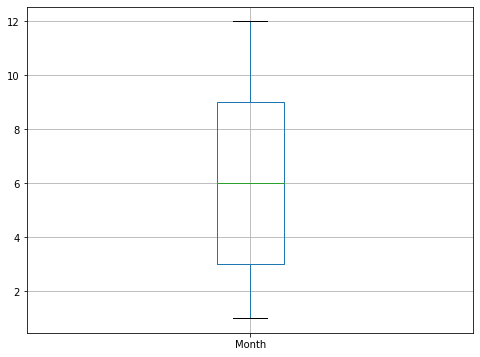

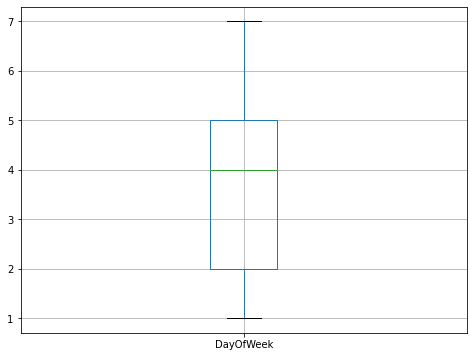

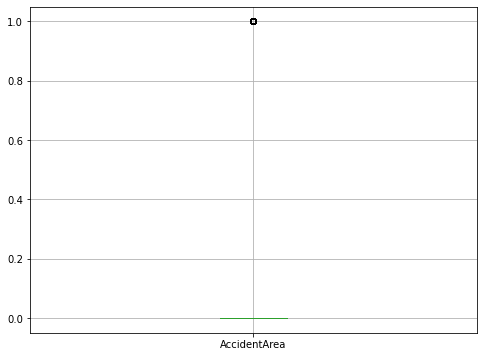

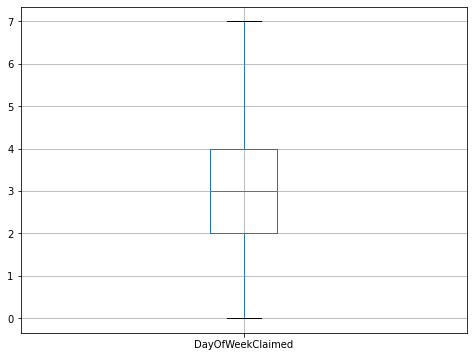

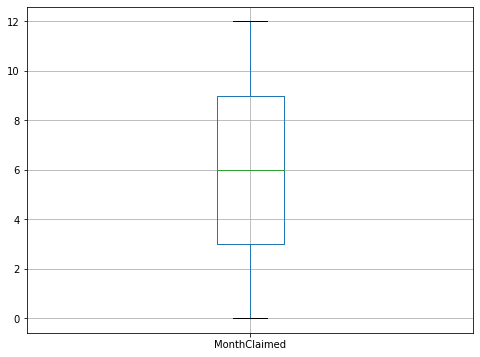

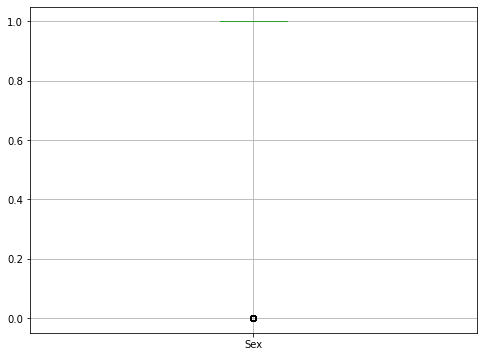

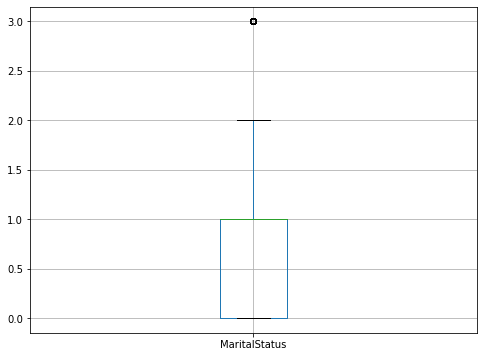

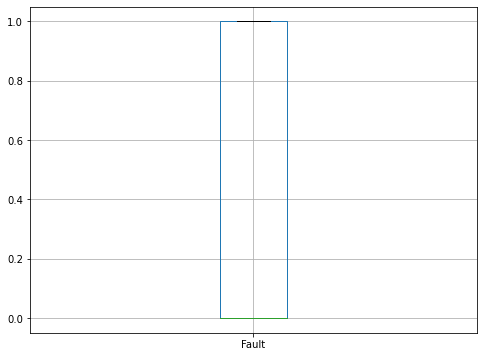

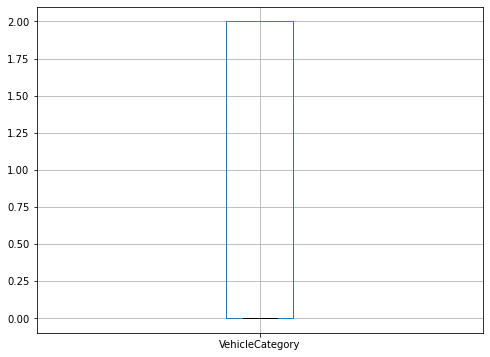

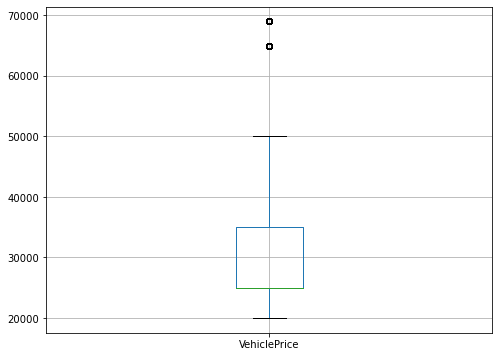

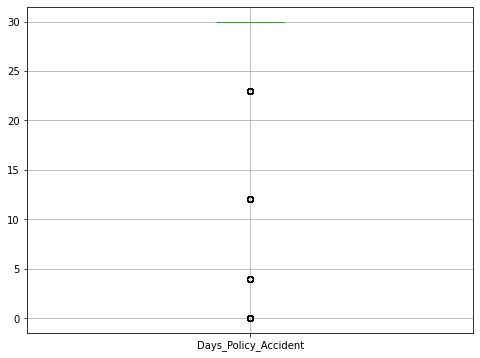

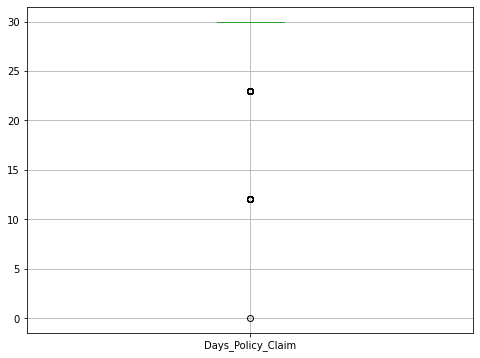

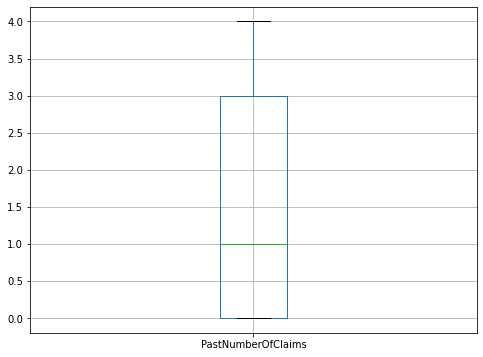

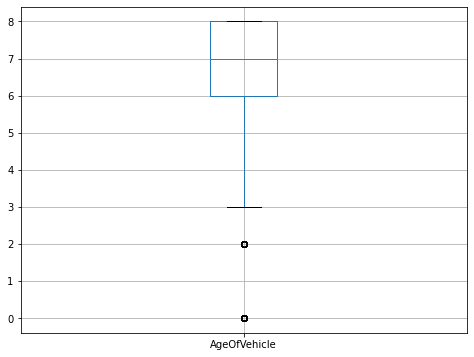

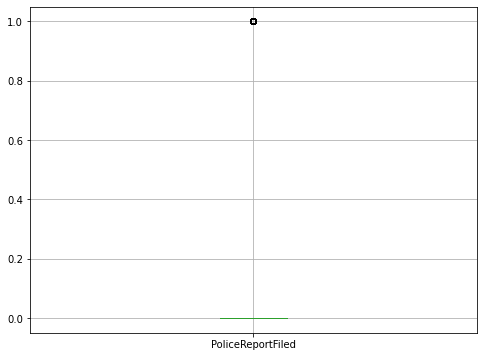

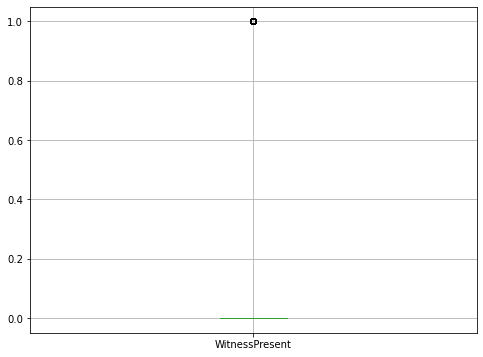

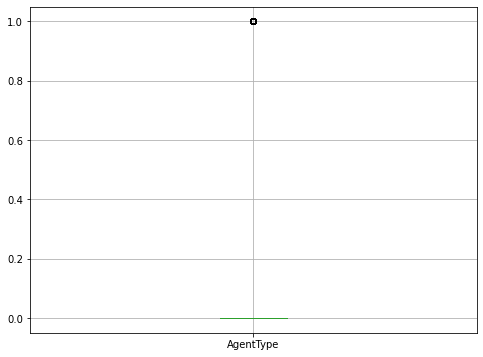

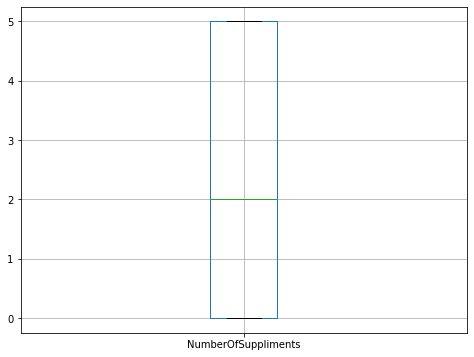

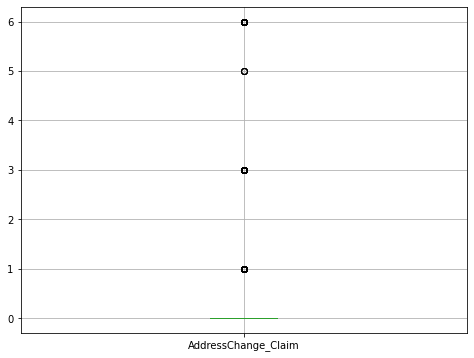

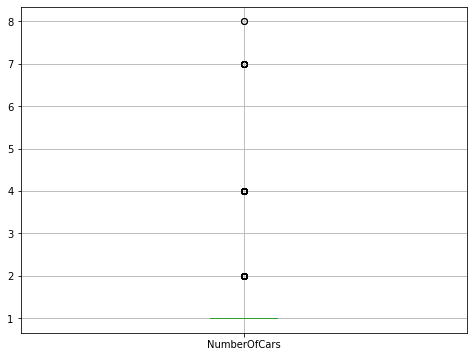

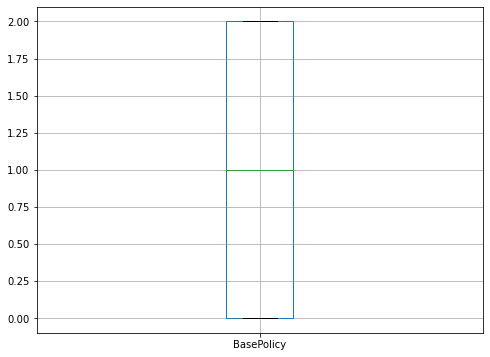

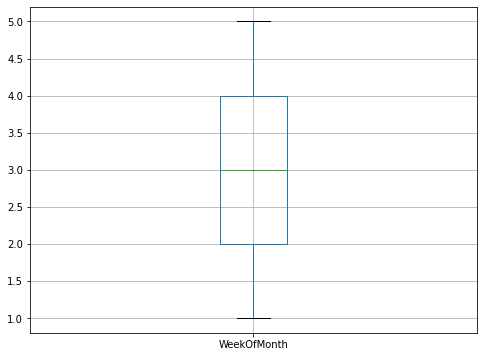

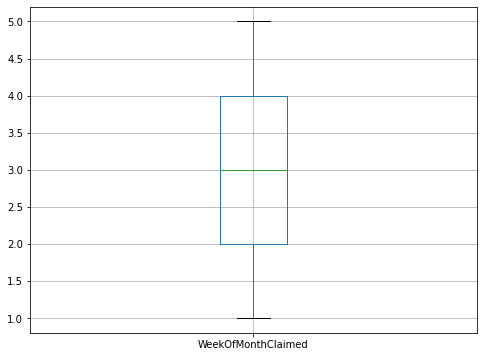

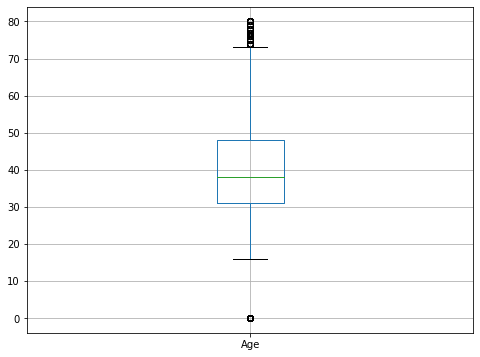

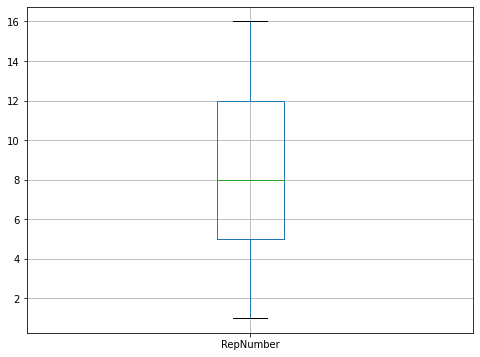

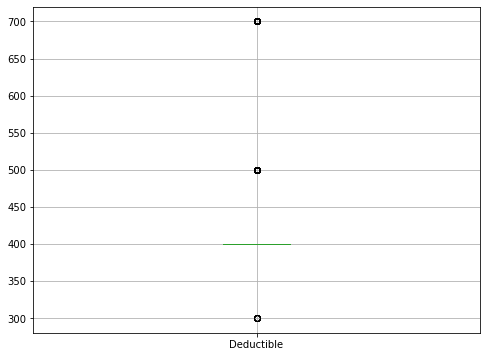

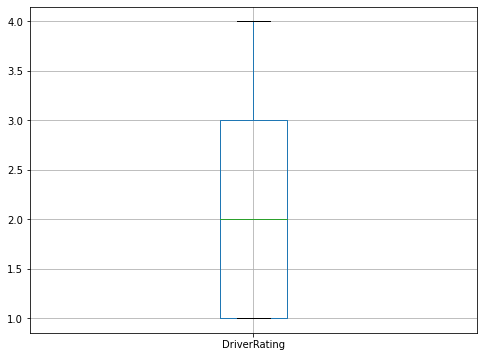

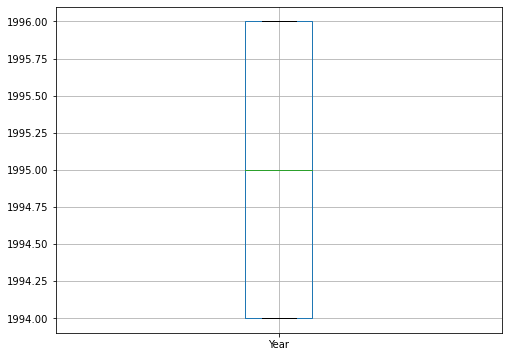

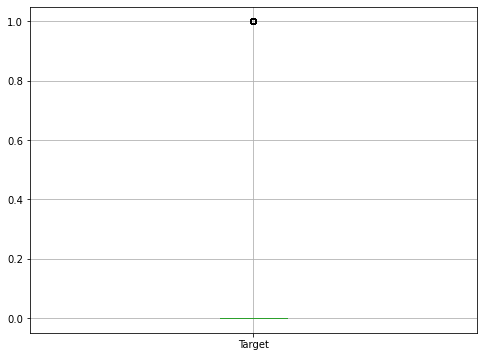

<Figure size 432x288 with 0 Axes>

In [47]:
for column in new_df:
    plt.figure(figsize=(8,6))
    fig=new_df[[column]].boxplot()
    plt.show()
plt.savefig("boxplot1")

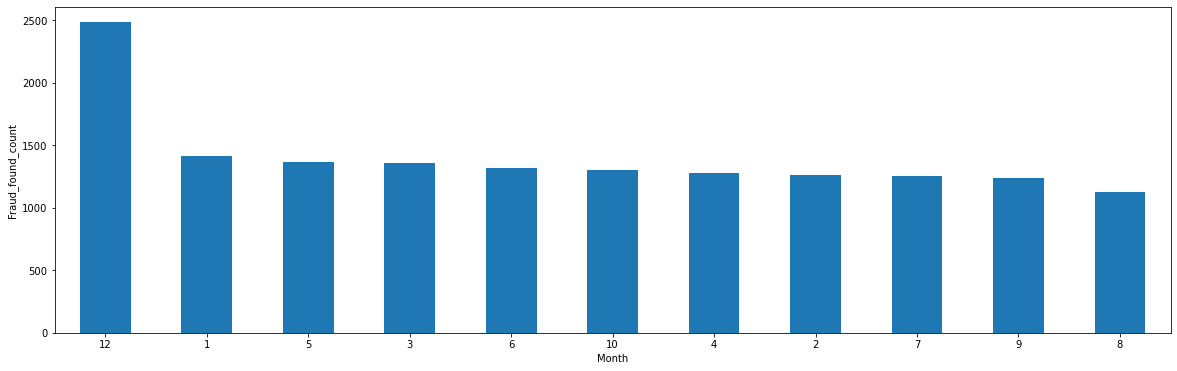

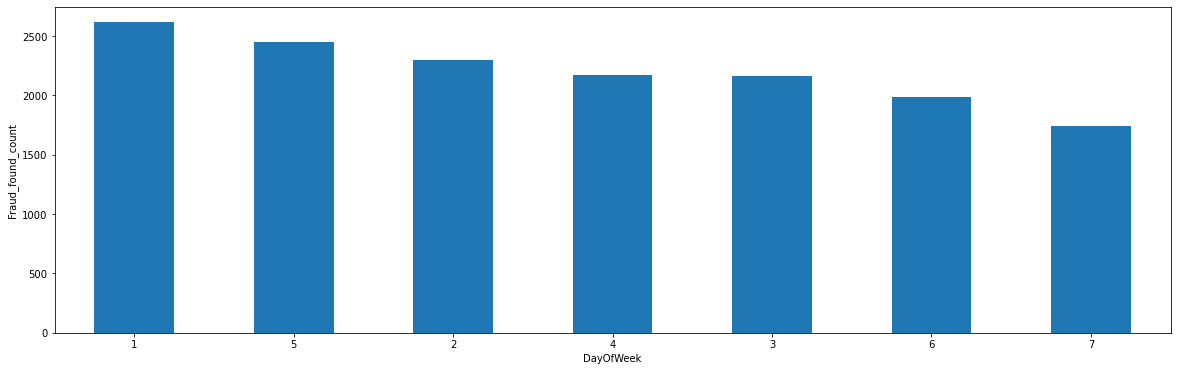

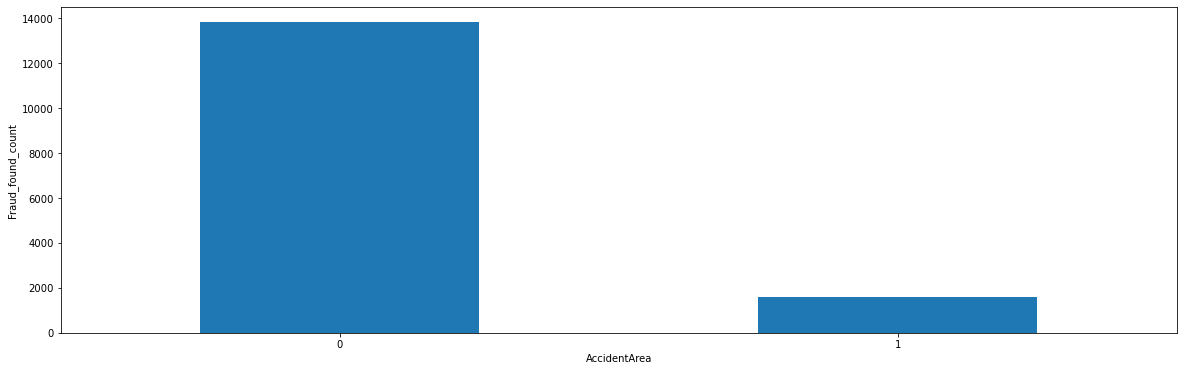

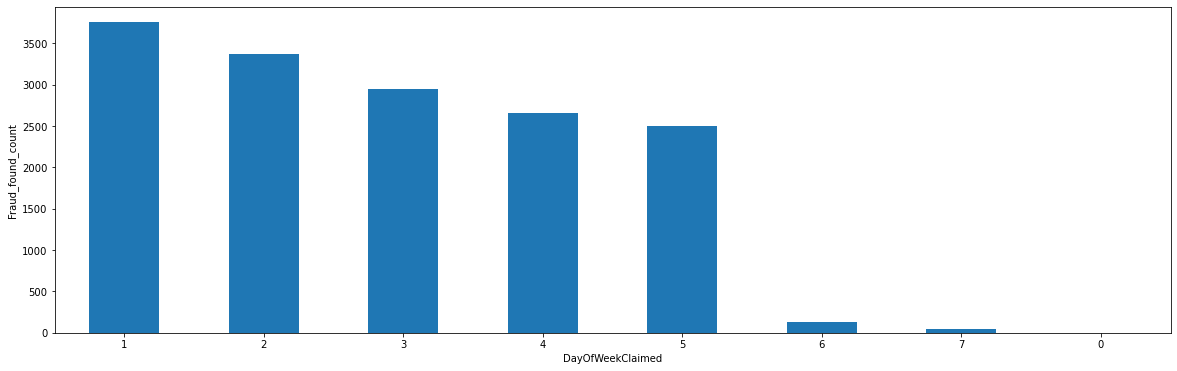

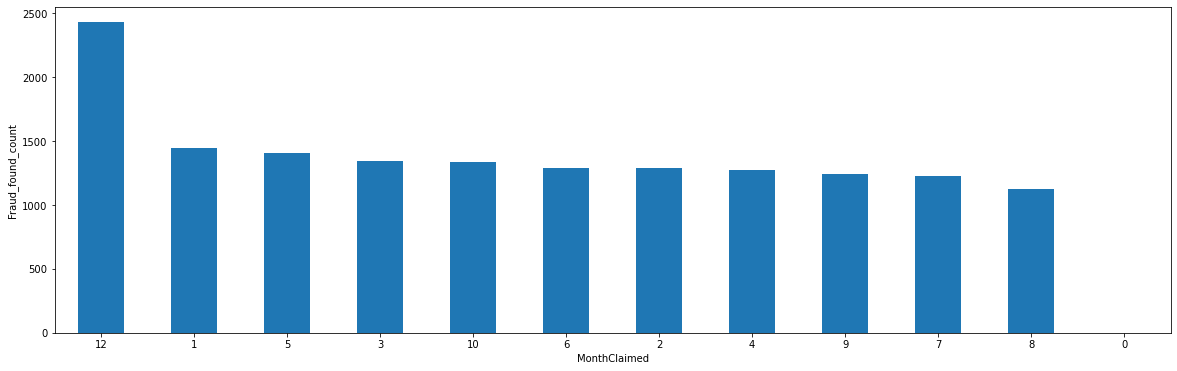

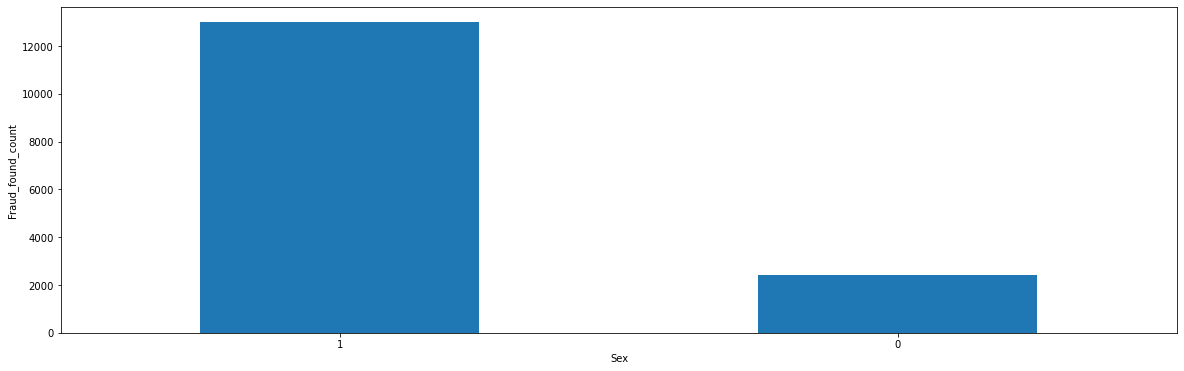

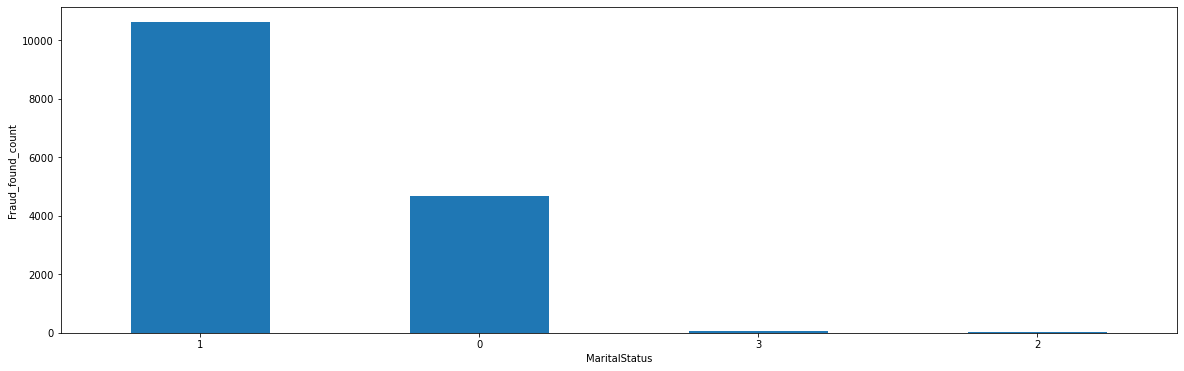

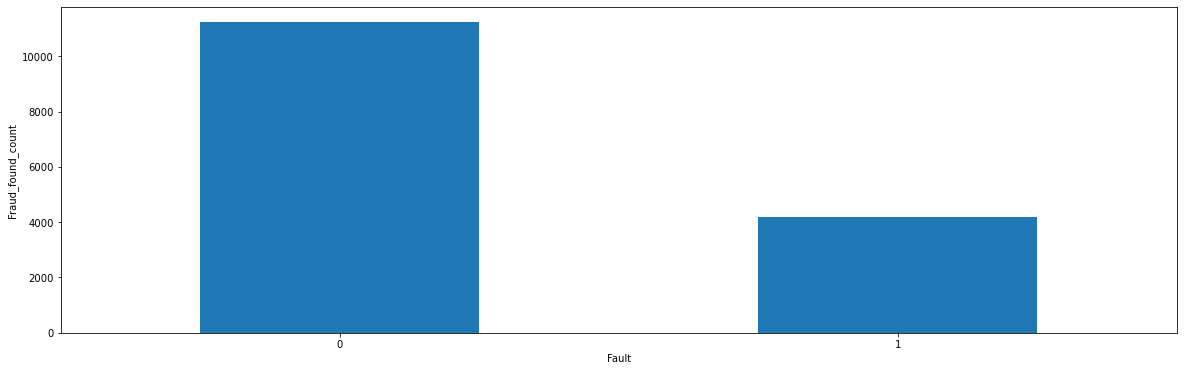

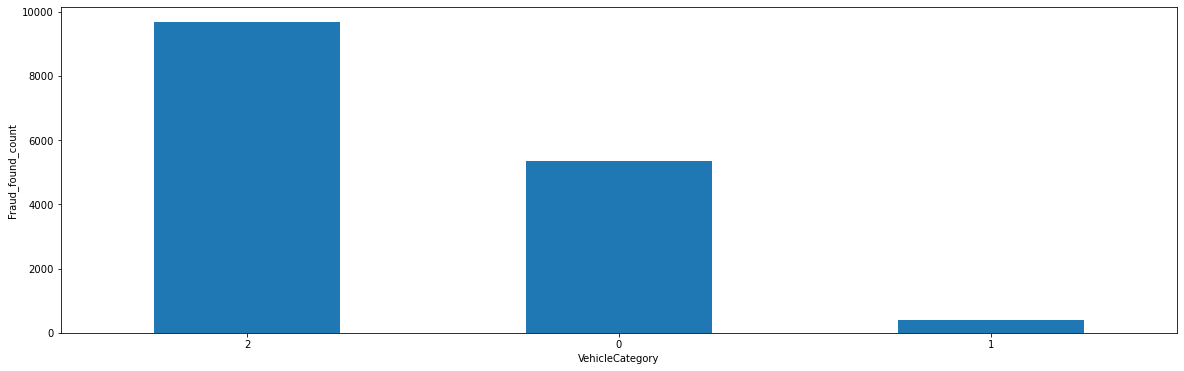

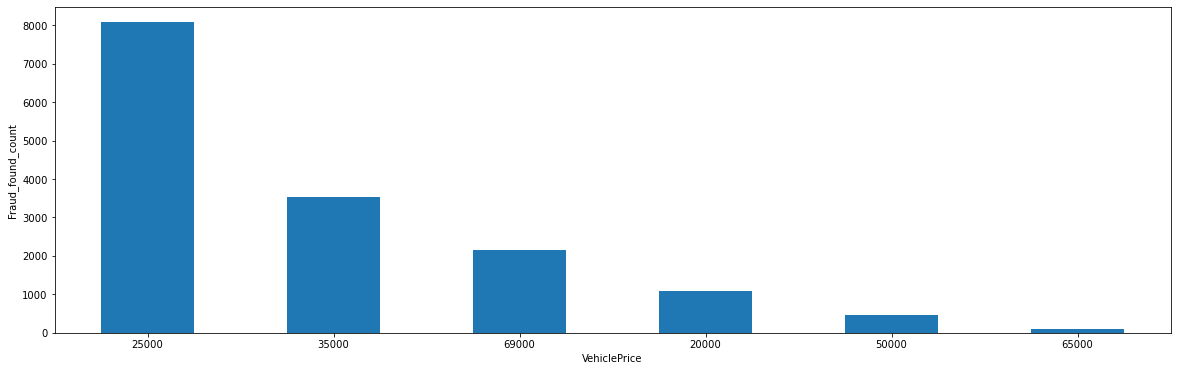

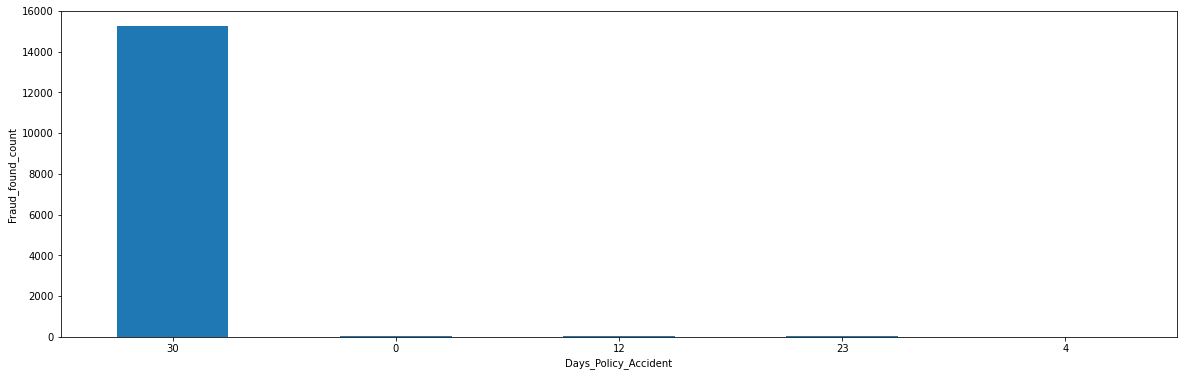

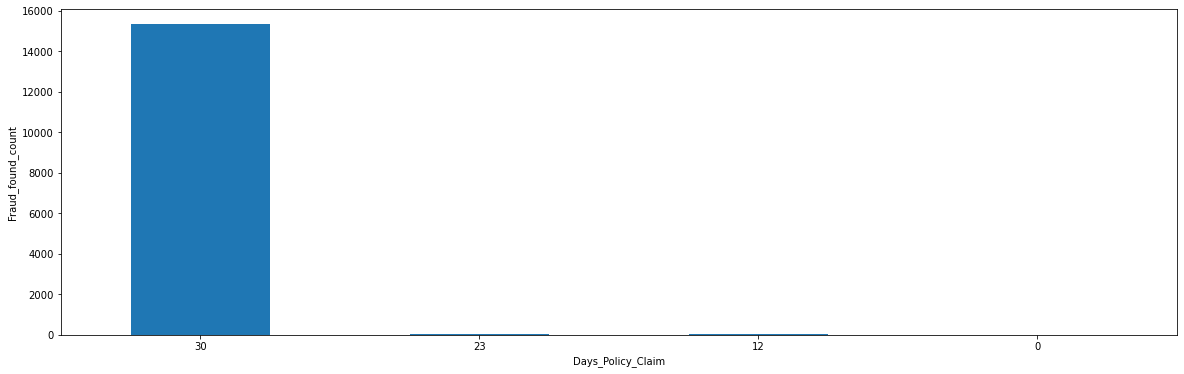

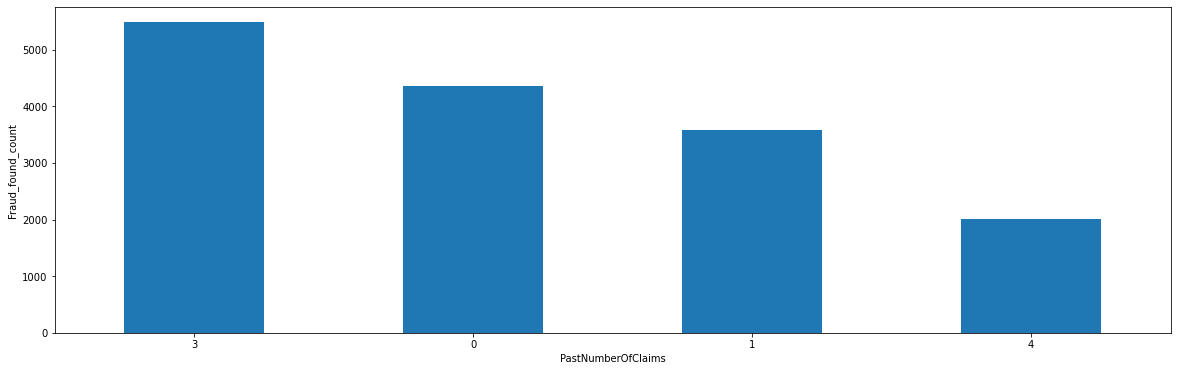

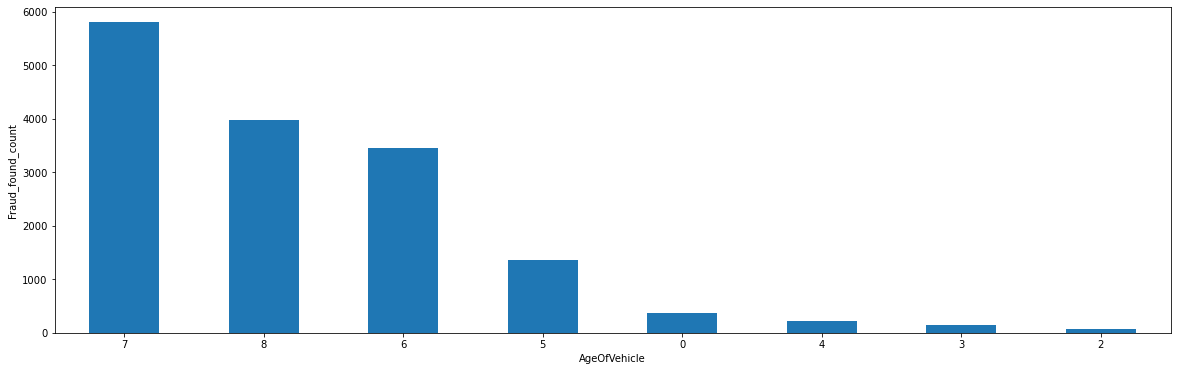

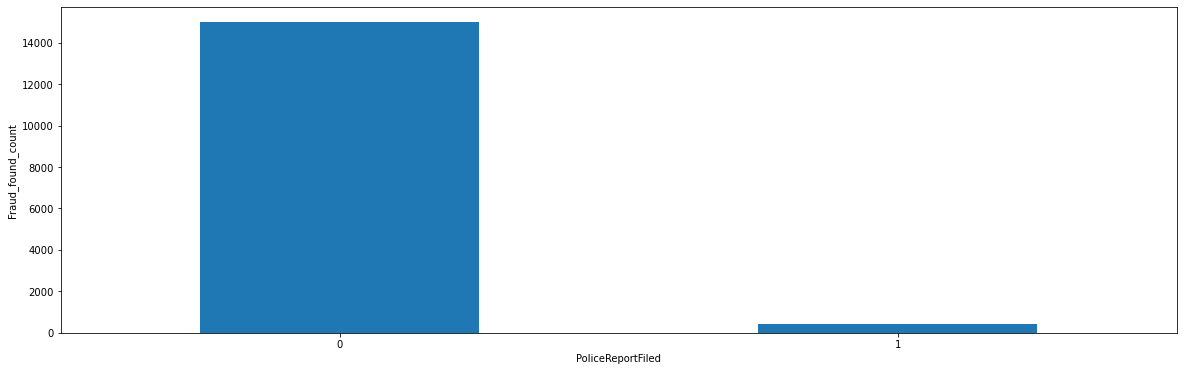

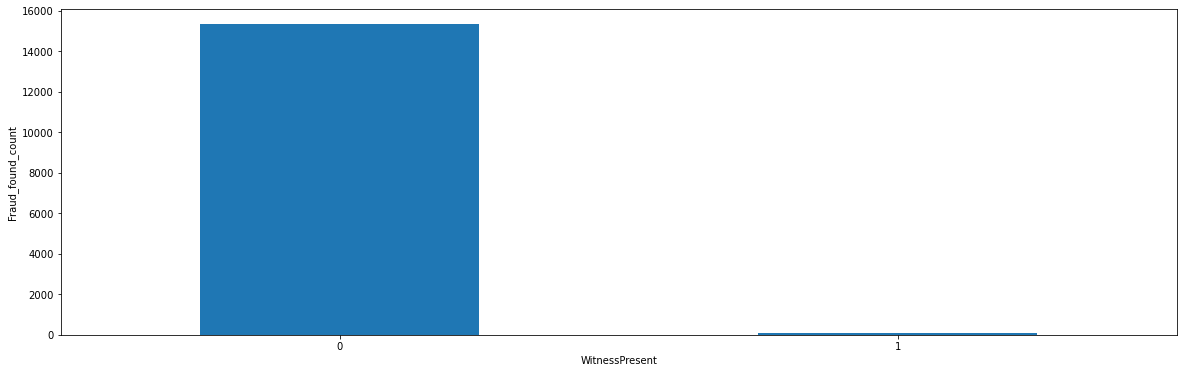

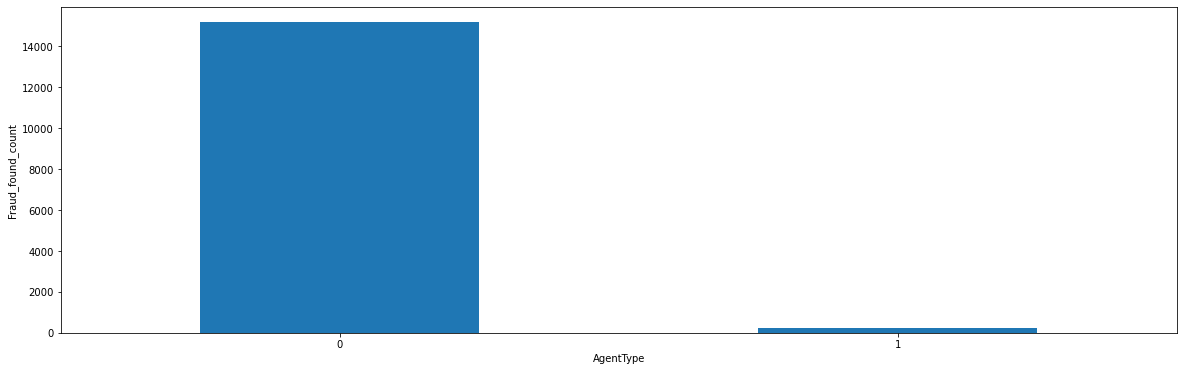

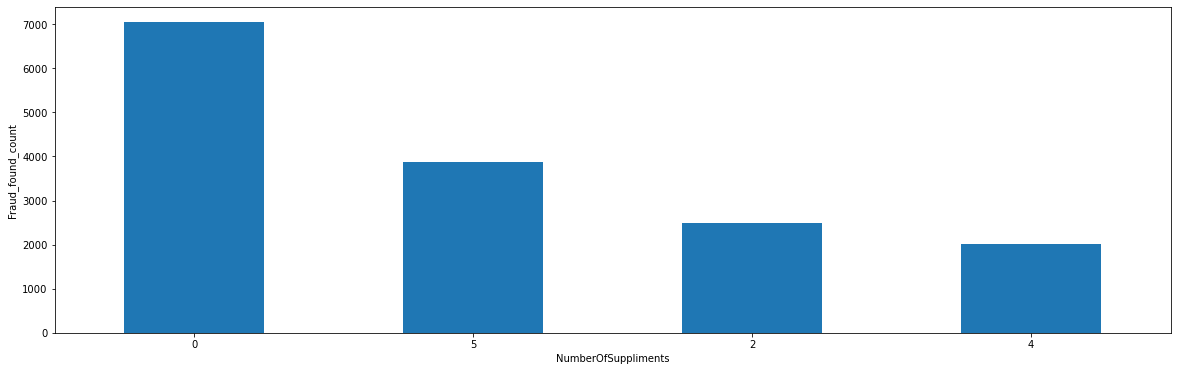

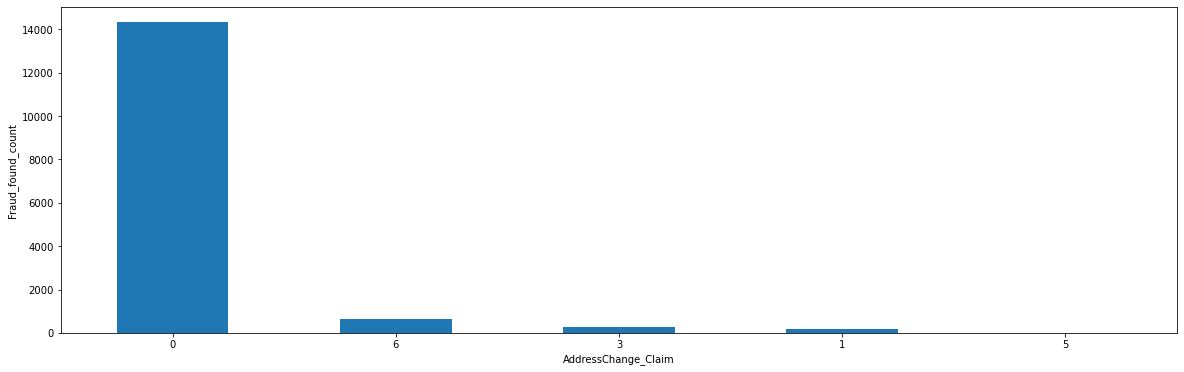

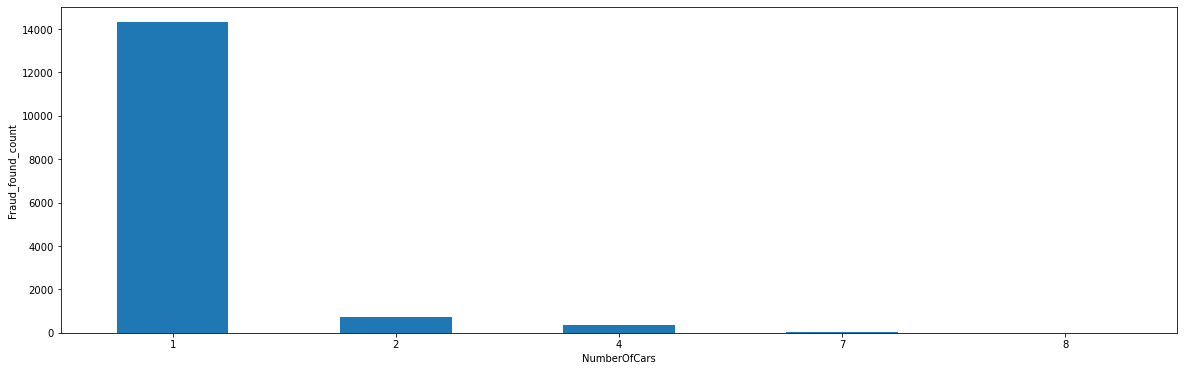

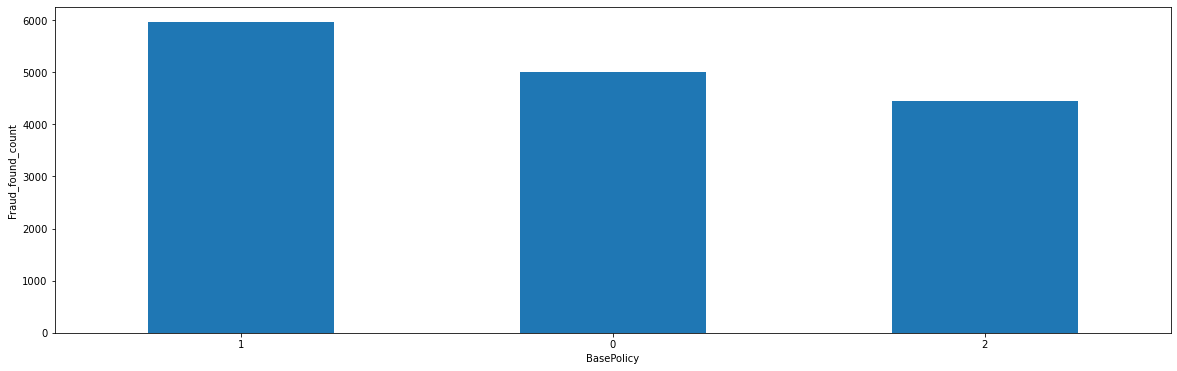

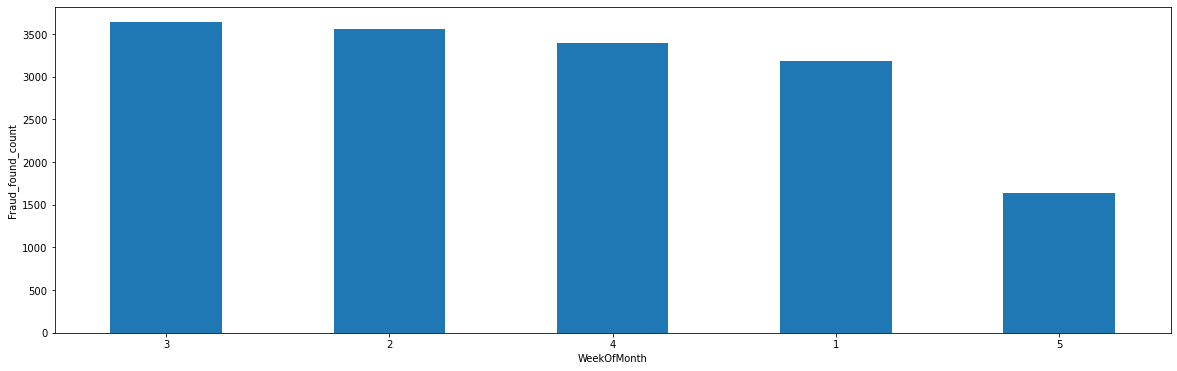

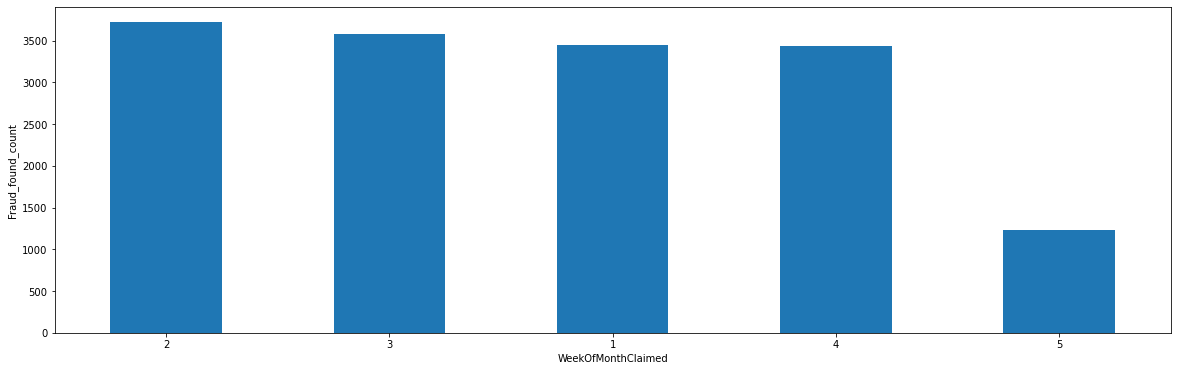

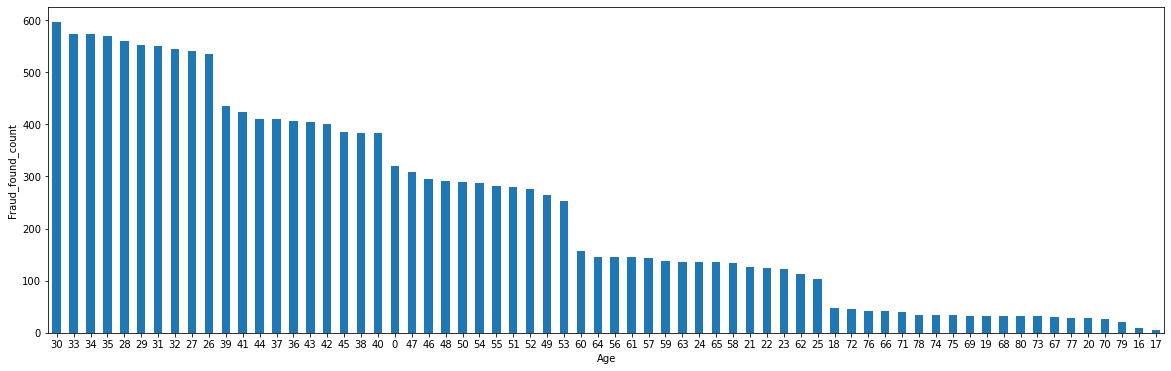

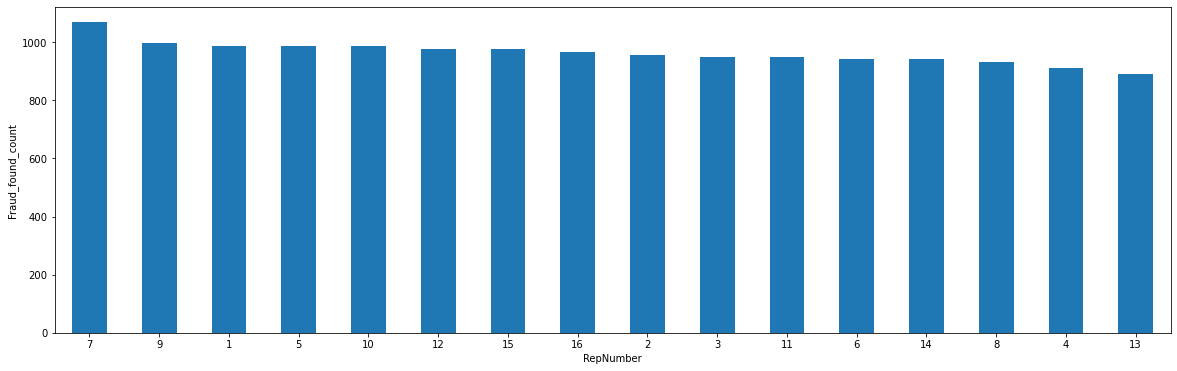

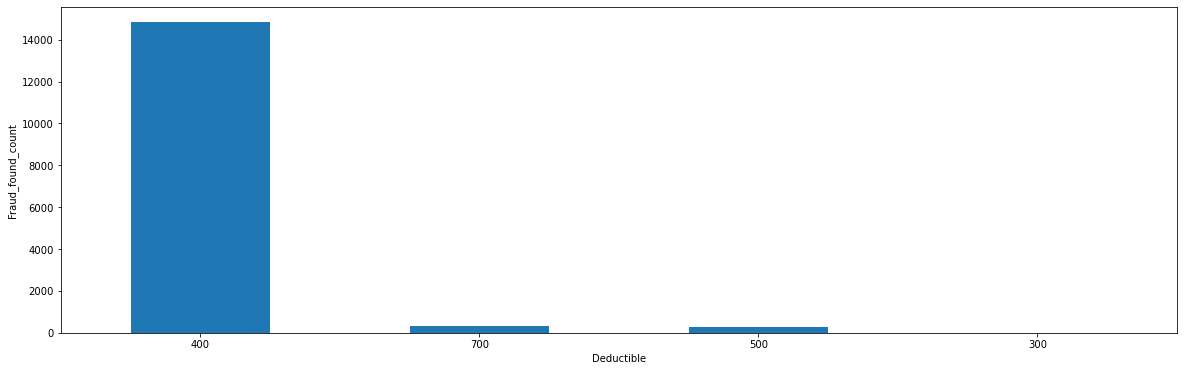

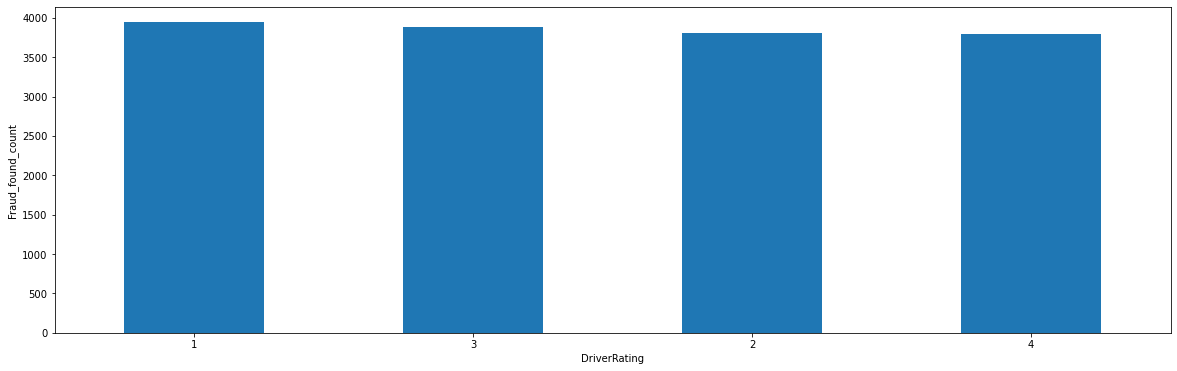

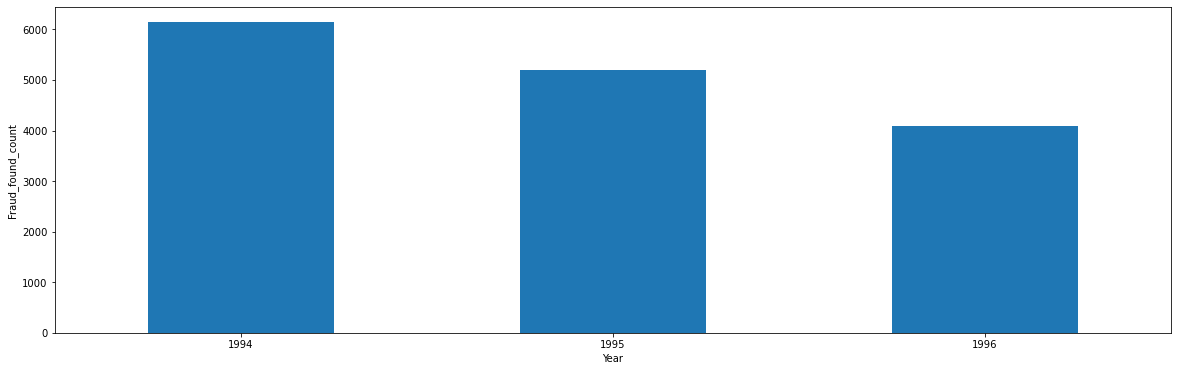

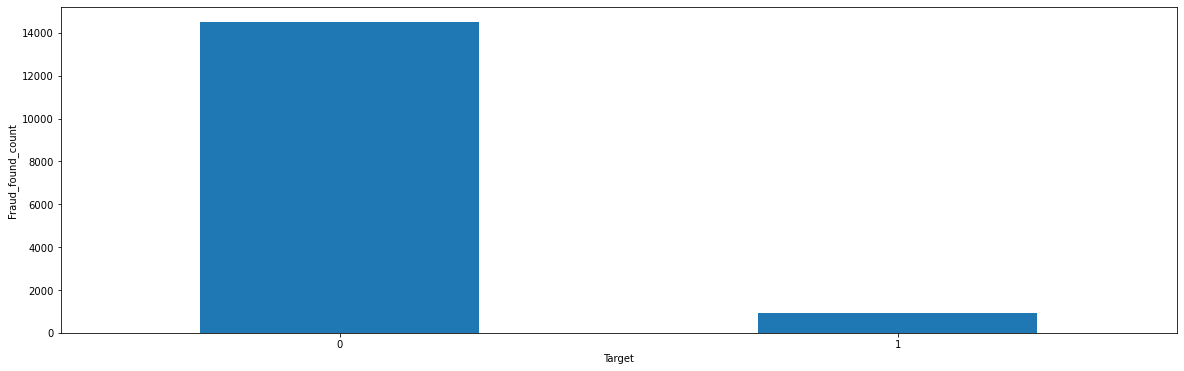

In [48]:
for column in new_df:    
    plt.figure(figsize=(20,6))
    new_df[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("Fraud_found_count")
    plt.xticks(rotation = 0);
    
plt.savefig("countplot")

feature : Month
feature : DayOfWeek
feature : AccidentArea
feature : DayOfWeekClaimed
feature : MonthClaimed
feature : Sex
feature : MaritalStatus
feature : Fault
feature : VehicleCategory
feature : VehiclePrice
feature : Days_Policy_Accident
feature : Days_Policy_Claim
feature : PastNumberOfClaims
feature : AgeOfVehicle
feature : PoliceReportFiled
feature : WitnessPresent
feature : AgentType
feature : NumberOfSuppliments
feature : AddressChange_Claim
feature : NumberOfCars
feature : BasePolicy
feature : WeekOfMonth
feature : WeekOfMonthClaimed
feature : Age
feature : RepNumber
feature : Deductible
feature : DriverRating
feature : Year
feature : Target


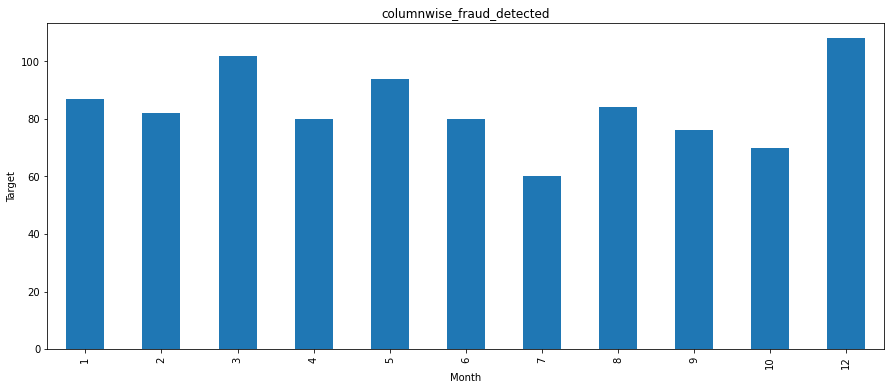

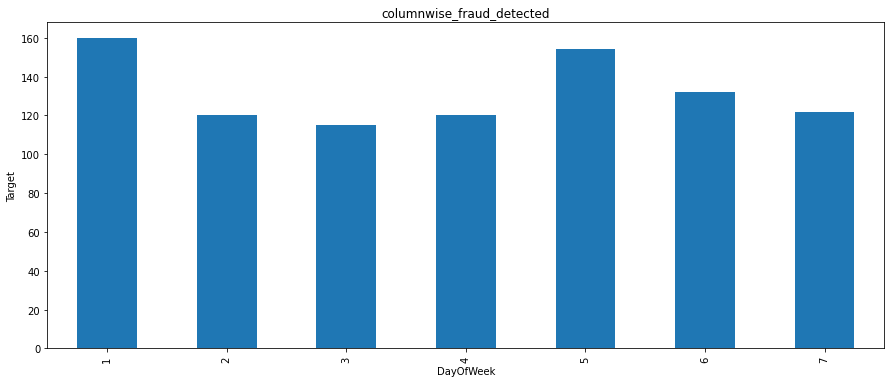

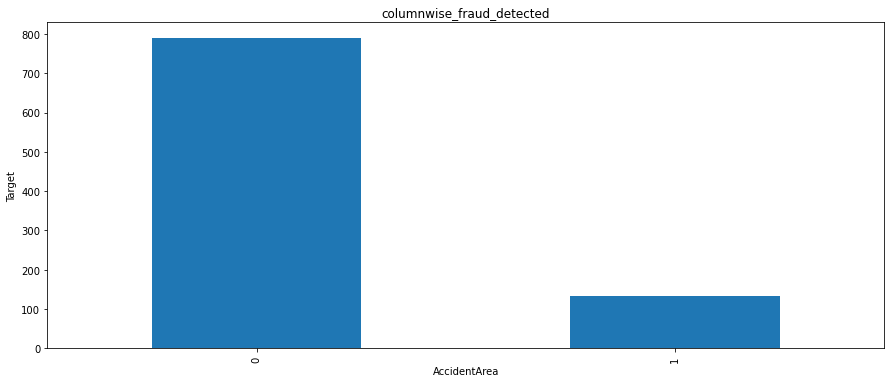

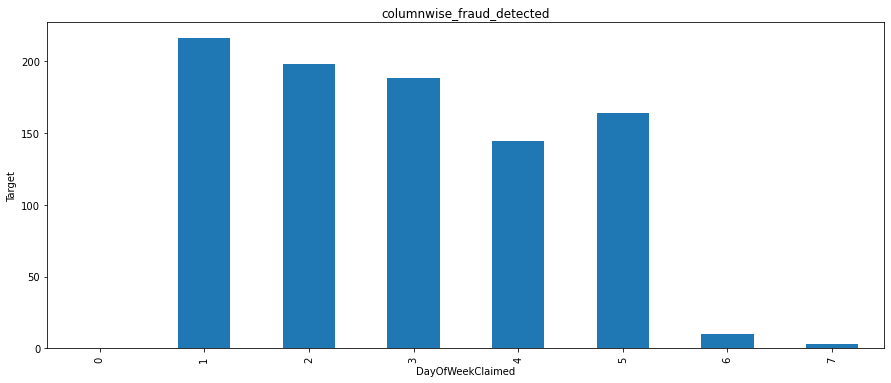

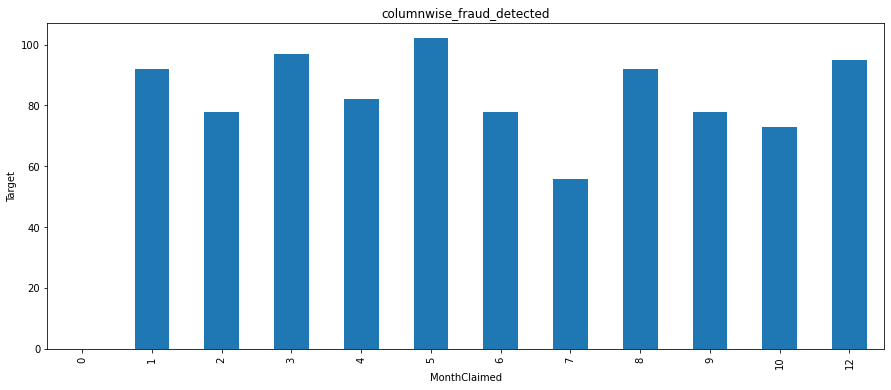

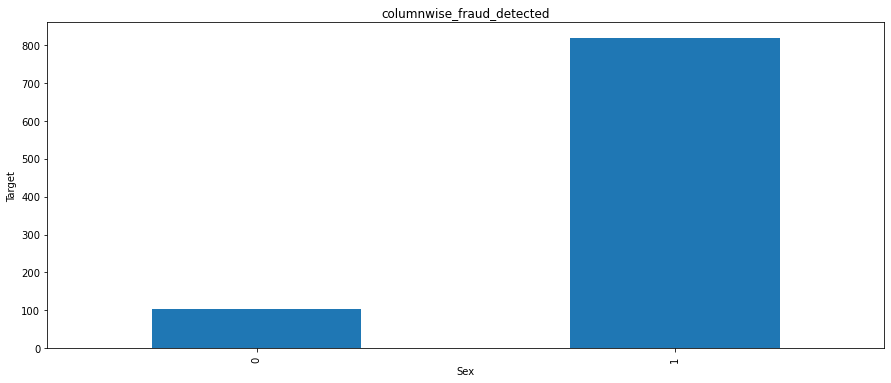

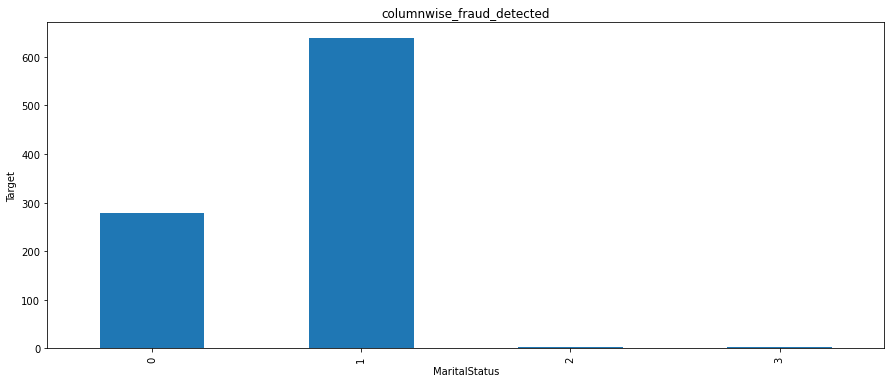

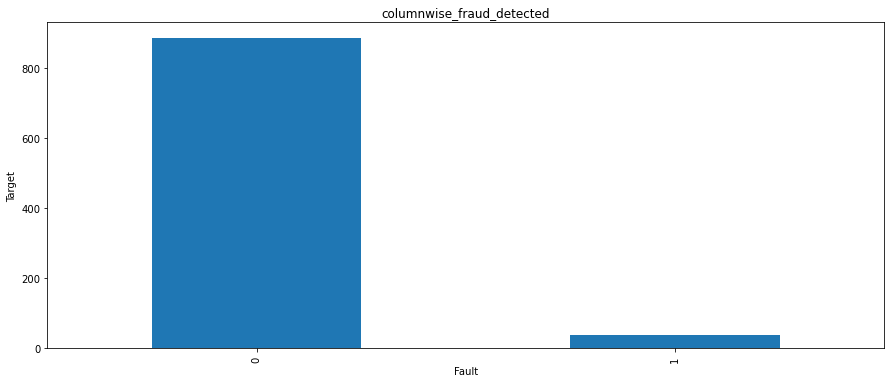

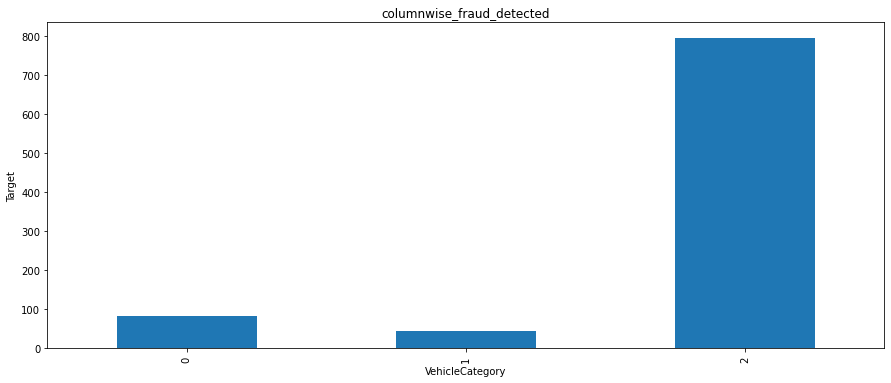

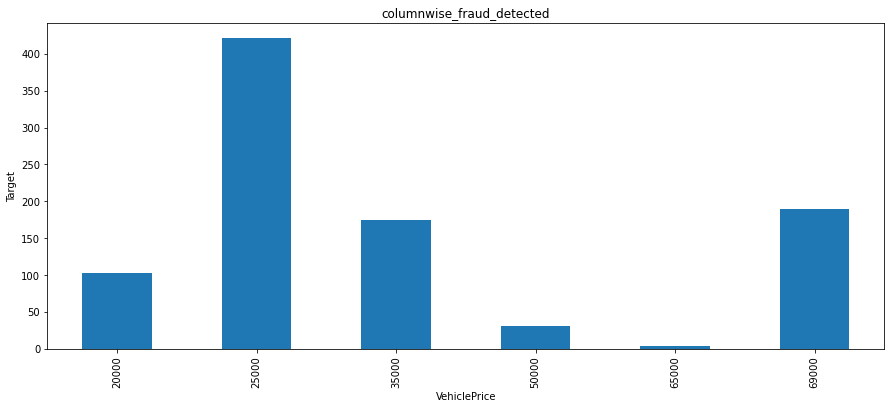

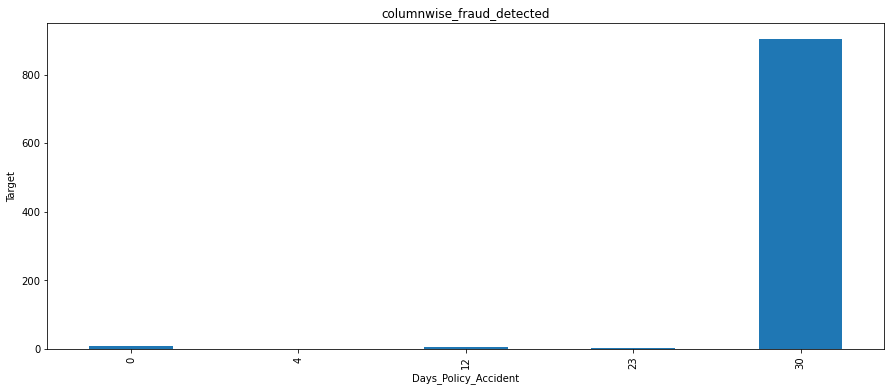

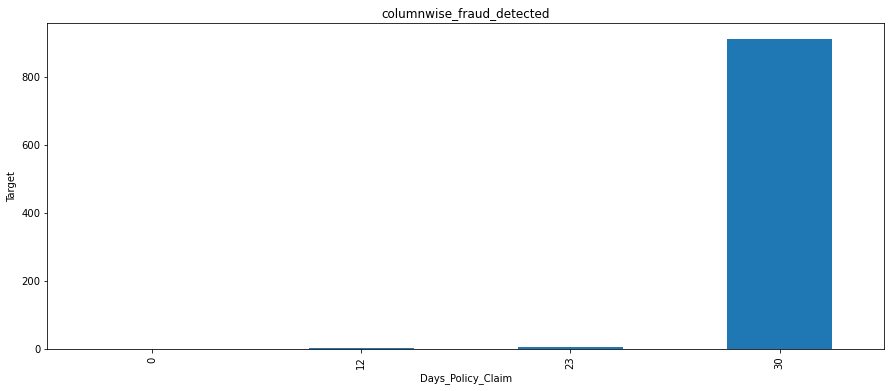

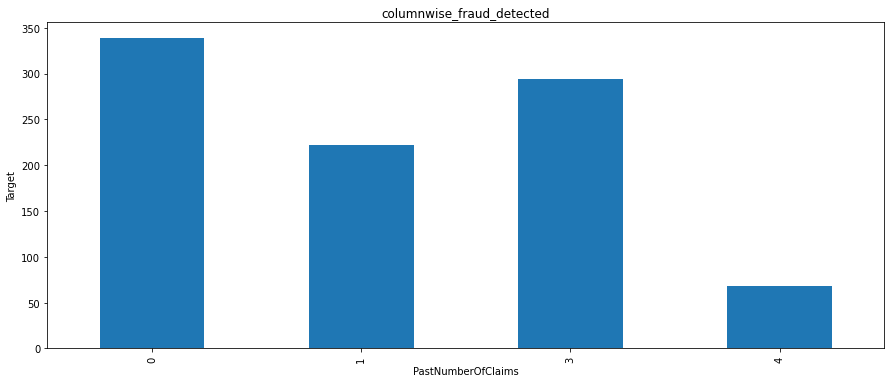

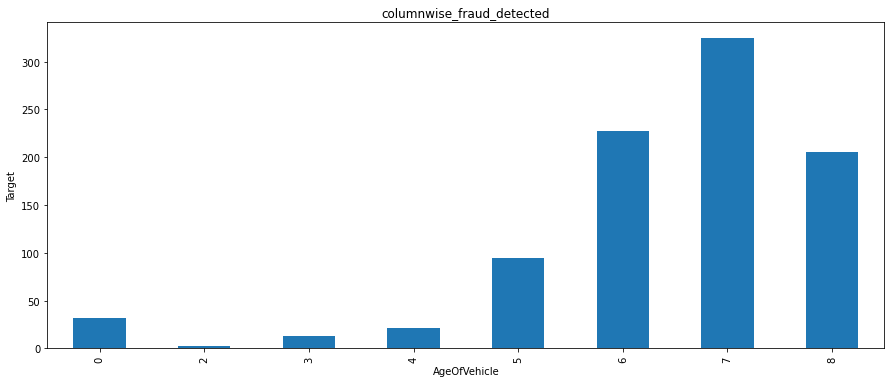

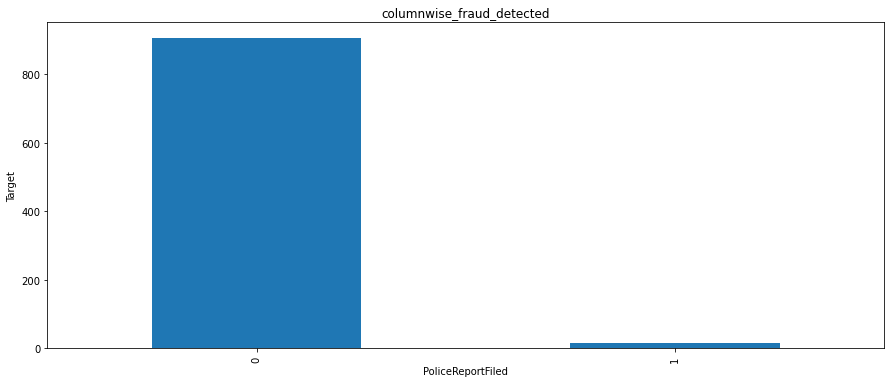

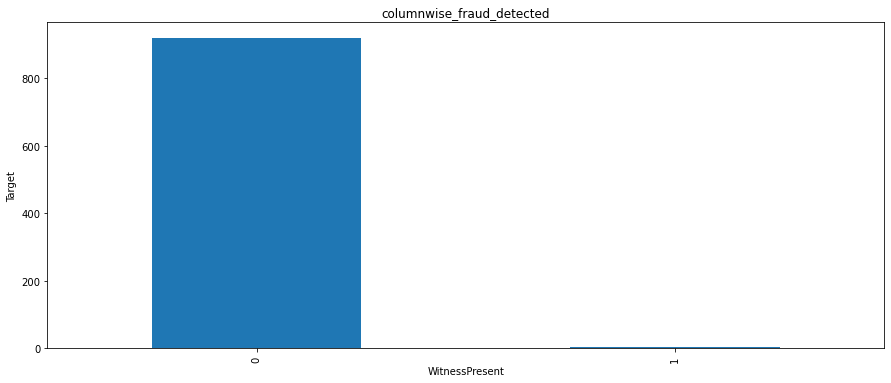

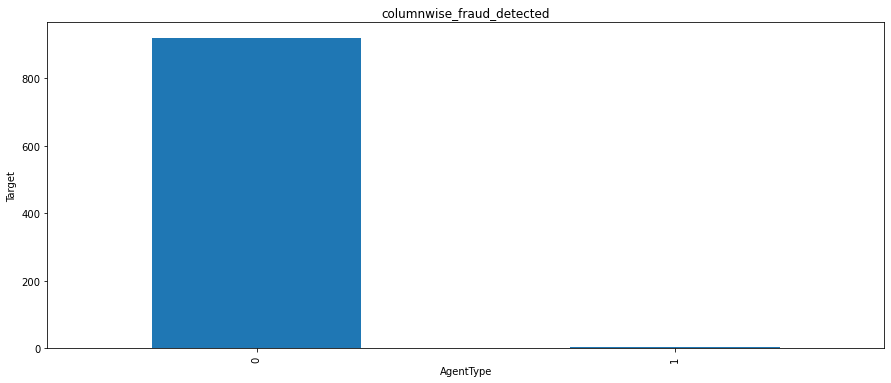

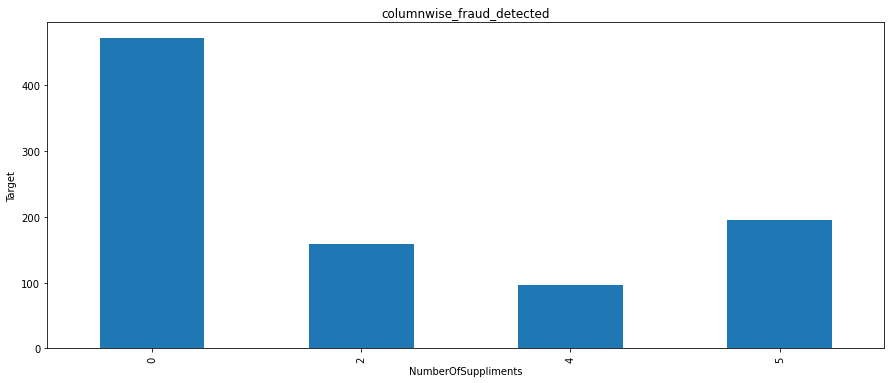

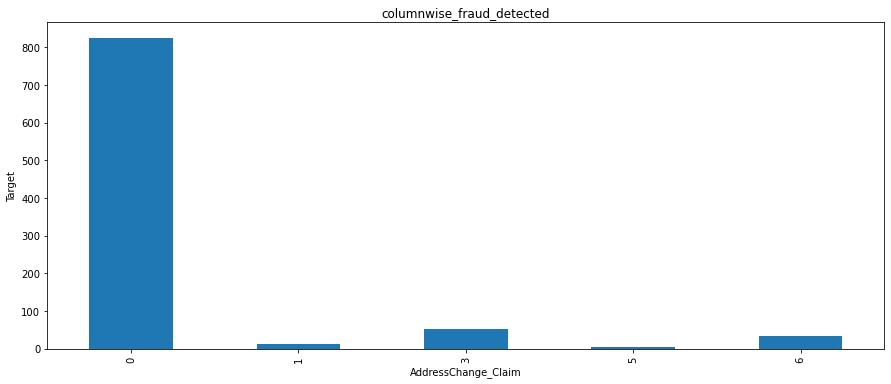

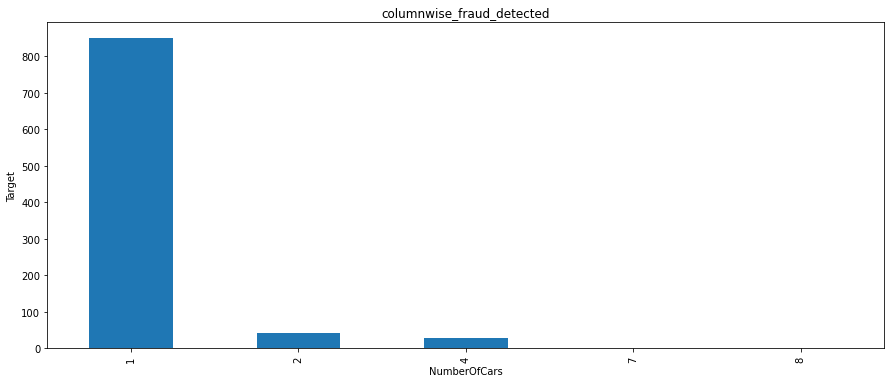

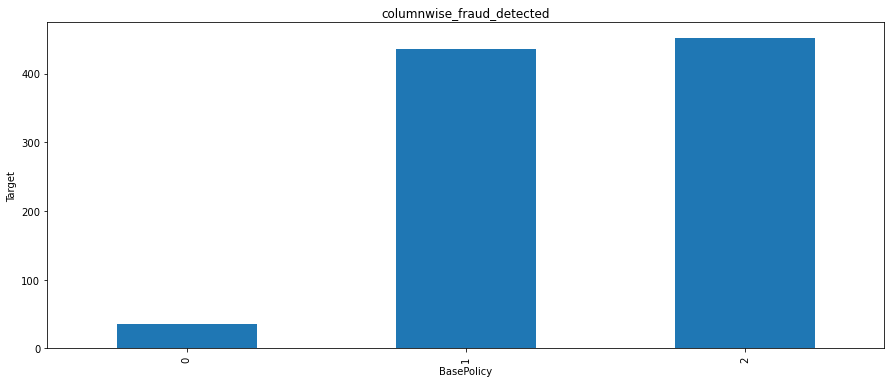

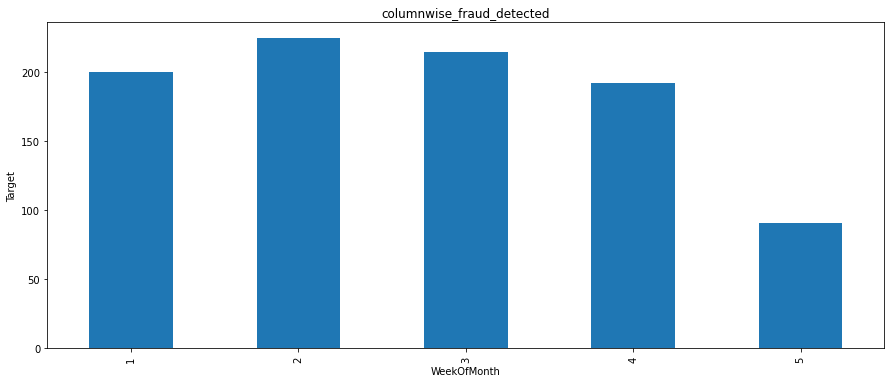

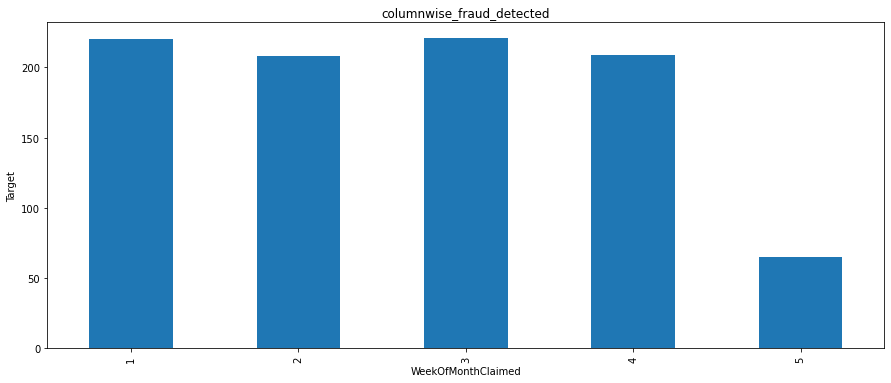

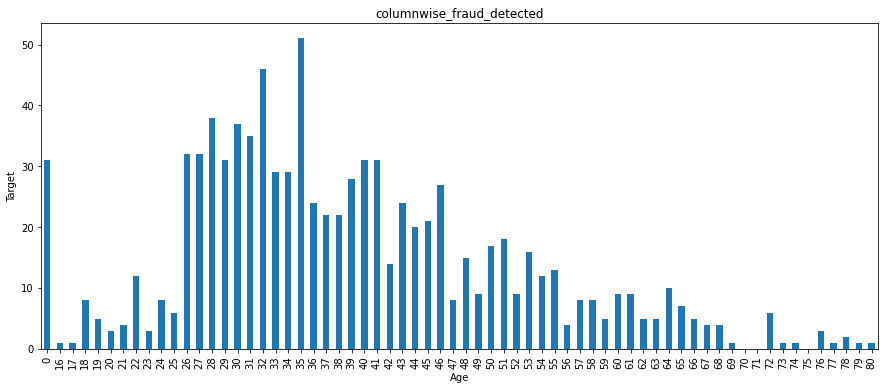

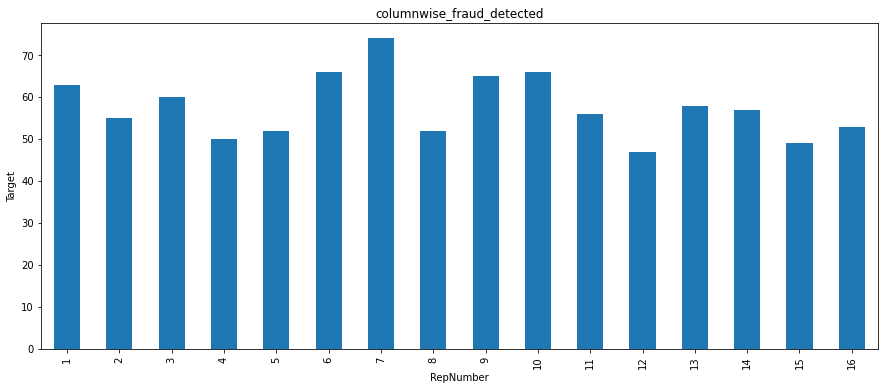

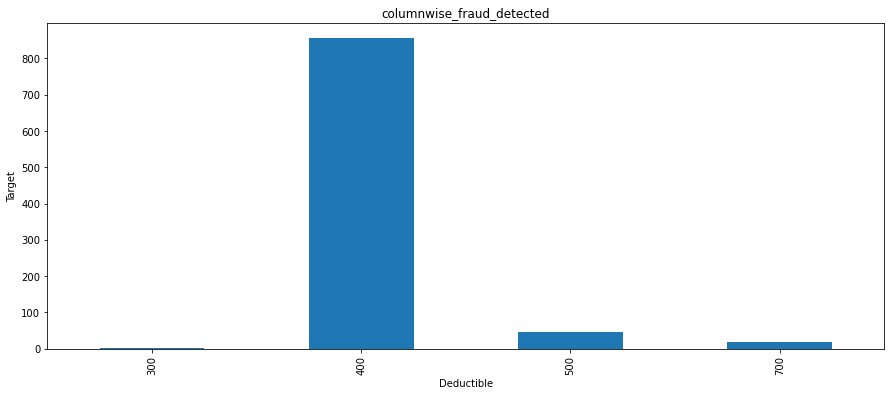

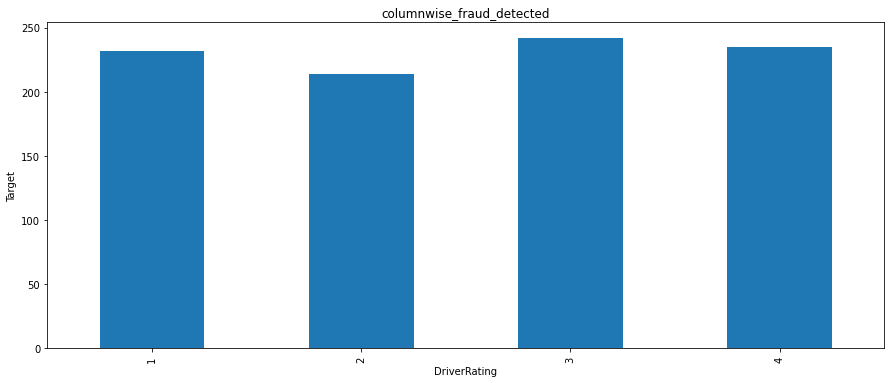

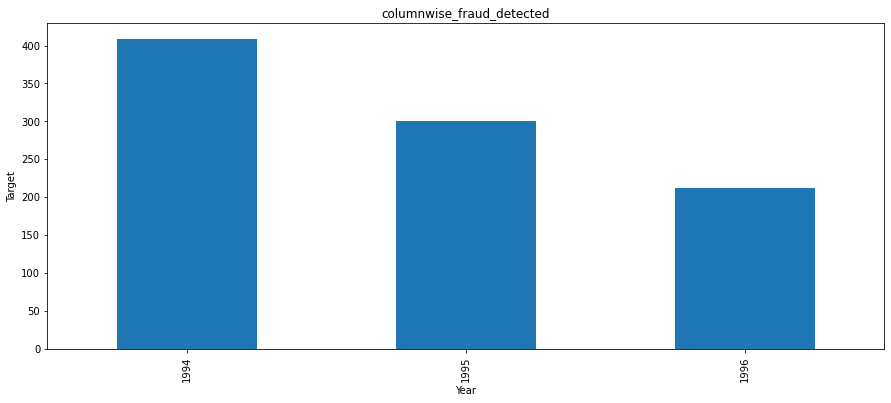

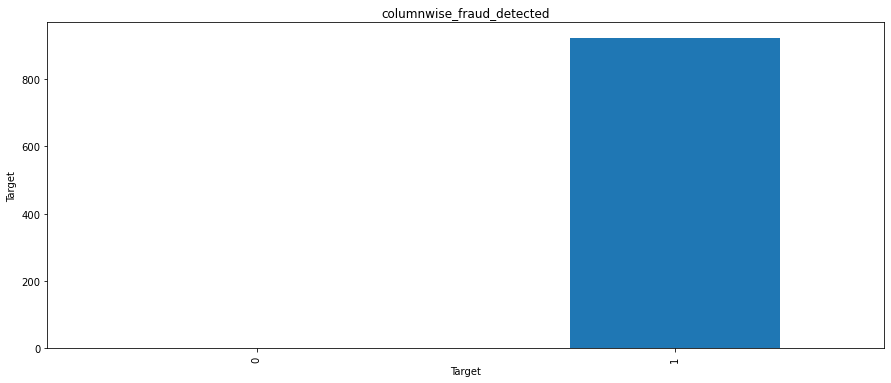

In [49]:
for column in new_df:
    print("feature :", column)
    x=new_df.groupby(column).Target.sum()
    fig=plt.figure(figsize=(15,6))
    ax=fig.add_subplot(1,1,1)
    ax.set_xlabel(column)
    ax.set_ylabel("Target")
    ax.set_title("columnwise_fraud_detected")
    x.plot(kind="bar")
    fig.show()

(array([[15420.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.],
        [15420.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.],
        [15420.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.],
        [15420.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.],
        [15420.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.],
        [15420.,     0.,     0.,     0.,     0.,     0.,    

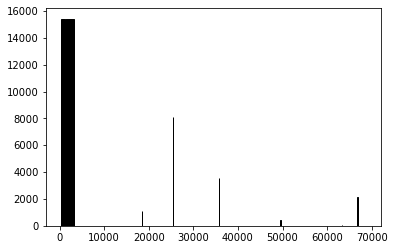

In [50]:
plt.hist(new_df,edgecolor='black',bins=20)

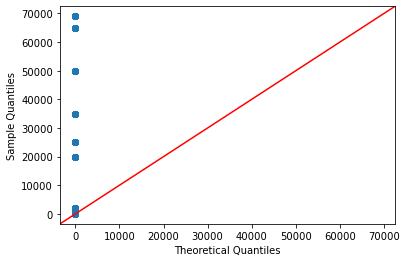

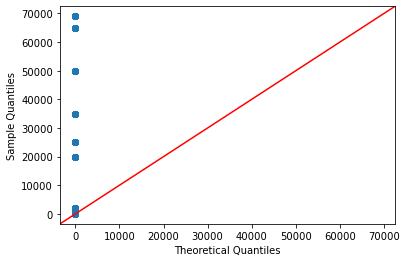

In [51]:
import scipy.stats as sts
import statsmodels.api as sm
sm.qqplot(new_df, line = '45')

In [52]:
from scipy.stats import shapiro, kstest, normaltest
_ , p_val = shapiro(new_df)
print('P_Value :',p_val)
if p_val >= 0.05 :
    print('Null Hypothesis is True')
    print('Data is normally distributed')
    
else:
    print('Alternate Hypothesis is True')
    print('Data is not normally distributed')

P_Value : 0.0
Alternate Hypothesis is True
Data is not normally distributed


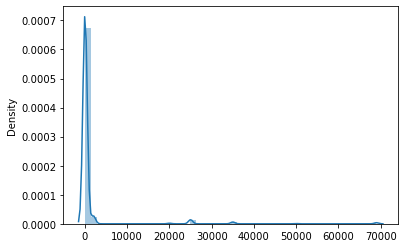

In [53]:
sns.distplot(new_df)
plt.savefig("distribution_plot")

# Feature Selection

<AxesSubplot:>

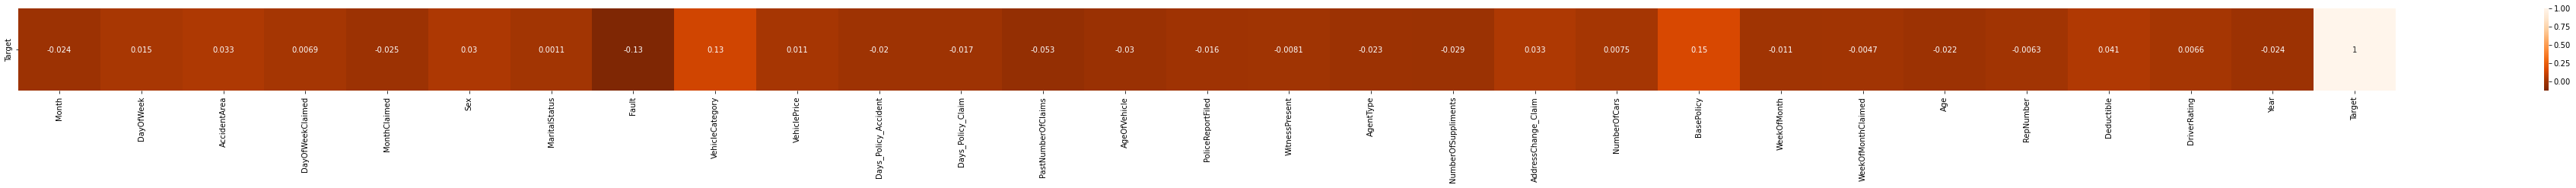

In [54]:
corr = new_df.corr(method='kendall').tail(1)
plt.figure(figsize=(70,2))
sns.heatmap(corr, annot=True,cmap='Oranges_r')


In [68]:
x=new_df.drop('Target',axis=1)
y=new_df['Target']
chi2_val,p_val=chi2(x,y)
chi2_df=pd.DataFrame({'Features':x.columns,'chi2_val':chi2_val,'p_val':p_val})
chi2_df

Features       chi2_val         p_val
0                  Month      24.706443  6.676061e-07
1              DayOfWeek       4.831984  2.793647e-02
2           AccidentArea      15.511243  8.201600e-05
3       DayOfWeekClaimed       0.738139  3.902577e-01
4           MonthClaimed      28.333673  1.021044e-07
5                    Sex       2.171228  1.406139e-01
6          MaritalStatus       0.000052  9.942586e-01
7                  Fault     193.864926  4.557688e-44
8        VehicleCategory     184.661528  4.652537e-42
9           VehiclePrice  149351.283492  0.000000e+00
10  Days_Policy_Accident       1.652492  1.986201e-01
11     Days_Policy_Claim       0.089080  7.653500e-01
12    PastNumberOfClaims      58.538321  1.993697e-14
13          AgeOfVehicle       5.660517  1.735101e-02
14     PoliceReportFiled       3.841486  4.999919e-02
15        WitnessPresent       0.995418  3.184217e-01
16             AgentType       8.014479  4.640481e-03
17   NumberOfSuppliments      36.314171  1.679383e-09
18   AddressChange_Claim      27.579975  1.507312e-07
19          NumberOfCars       0.345320  5.567744e-01
20            BasePolicy     241.639727  1.726541e-54
21           WeekOfMonth       1.289739  2.560961e-01
22    WeekOfMonthClaimed       0.301157  5.831578e-01
23                   Age      62.295705  2.955690e-15
24             RepNumber       2.192993  1.386397e-01
25            Deductible      21.985712  2.746877e-06
26          DriverRating       0.410067  5.219357e-01
27                  Year       0.003058  9.559019e-01

In [69]:
best_features=SelectKBest(chi2,k=27)
best_features.fit(x,y)
new_df1=new_df[best_features.get_feature_names_out().tolist()]
new_df1.columns

Index(['Month', 'DayOfWeek', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'Fault', 'VehicleCategory', 'VehiclePrice',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy', 'WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'RepNumber',
       'Deductible', 'DriverRating', 'Year'],
      dtype='object')

In [70]:
new_df1=pd.concat([new_df1,y ],axis=1)
new_df1.head()

Month  DayOfWeek  AccidentArea  DayOfWeekClaimed  MonthClaimed  Sex  Fault  \
0     12          3             0                 2             1    0      0   
1      1          3             0                 1             1    1      0   
2     10          5             0                 4            12    1      0   
3      6          6             1                 5             7    1      1   
4      1          1             0                 2             2    0      1   

   VehicleCategory  VehiclePrice  Days_Policy_Accident  ...  NumberOfCars  \
0                0         69000                    30  ...             4   
1                0         69000                    30  ...             1   
2                0         69000                    30  ...             1   
3                0         25000                    30  ...             1   
4                0         69000                    30  ...             1   

   BasePolicy  WeekOfMonth  WeekOfMonthClaimed  Age  RepNumber  Deductible  \
0           0            5                   1   21         12         300   
1           1            3                   4   34         15         400   
2           1            5                   2   47          7         400   
3           0            2                   1   65          4         400   
4           1            5                   2   27          3         400   

   DriverRating  Year  Target  
0             1  1994       0  
1             4  1994       0  
2             3  1994       0  
3             2  1994       0  
4             1  1994       0  

[5 rows x 28 columns]

In [71]:
new_df1.columns

Index(['Month', 'DayOfWeek', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'Fault', 'VehicleCategory', 'VehiclePrice',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy', 'WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'RepNumber',
       'Deductible', 'DriverRating', 'Year', 'Target'],
      dtype='object')

# Model Building

In [72]:
x=new_df1.drop('Target',axis=1)
y=new_df1['Target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50,stratify=y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11565, 27)
(3855, 27)
(11565,)
(3855,)


# Feature scaling

In [73]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[0.18181818, 1.        , 0.        , ..., 0.25      , 1.        ,
        0.5       ],
       [0.        , 0.66666667, 0.        , ..., 0.25      , 0.        ,
        1.        ],
       [0.        , 0.83333333, 0.        , ..., 0.25      , 0.33333333,
        1.        ],
       ...,
       [1.        , 0.16666667, 0.        , ..., 0.25      , 1.        ,
        1.        ],
       [0.63636364, 0.66666667, 1.        , ..., 0.25      , 0.33333333,
        0.5       ],
       [0.45454545, 0.66666667, 0.        , ..., 0.25      , 1.        ,
        0.        ]])

In [74]:
x_test = scaler.transform(x_test)
x_test

array([[0.45454545, 0.16666667, 0.        , ..., 0.25      , 0.66666667,
        1.        ],
       [0.81818182, 0.        , 0.        , ..., 0.25      , 0.33333333,
        0.        ],
       [0.72727273, 1.        , 0.        , ..., 0.25      , 1.        ,
        0.5       ],
       ...,
       [0.72727273, 0.66666667, 0.        , ..., 0.25      , 0.66666667,
        1.        ],
       [0.18181818, 0.83333333, 0.        , ..., 0.25      , 0.        ,
        0.        ],
       [0.54545455, 0.        , 0.        , ..., 0.25      , 0.        ,
        1.        ]])

# Data Balancing

In [75]:
smt = SMOTE(sampling_strategy=0.61)
x_train_sm, y_train_sm = smt.fit_resample(x_train,y_train)
print(y_train.value_counts())
print(y_train_sm.value_counts())

0    10873
1      692
Name: Target, dtype: int64
0    10873
1     6632
Name: Target, dtype: int64


# Adaboost

In [194]:
adb_model = AdaBoostClassifier()
adb_model.fit(x_train_sm, y_train_sm)

AdaBoostClassifier()

In [195]:
# test data
y_pred=adb_model.predict(x_test)

accuracy5=accuracy_score(y_pred,y_test)
print('accuracy score:',accuracy5)

cnf_mat=confusion_matrix(y_pred,y_test)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred,y_test)

print('classification report:\n',class_rep)

accuracy score: 0.8850843060959792
confusion matrxi:
 [[3361  180]
 [ 263   51]]
classification report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      3541
           1       0.22      0.16      0.19       314

    accuracy                           0.89      3855
   macro avg       0.57      0.56      0.56      3855
weighted avg       0.87      0.89      0.88      3855



In [196]:
# train data
y_pred_train=adb_model.predict(x_train_sm)

accuracy=accuracy_score(y_pred_train,y_train_sm)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred_train,y_train_sm)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred_train,y_train_sm)
print('classification report:\n',class_rep)

accuracy score: 0.9092830619822908
confusion matrxi:
 [[10183   898]
 [  690  5734]]
classification report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     11081
           1       0.86      0.89      0.88      6424

    accuracy                           0.91     17505
   macro avg       0.90      0.91      0.90     17505
weighted avg       0.91      0.91      0.91     17505



## Hyper Parameter Tuning

In [197]:
adb_model = AdaBoostClassifier()


hyp_grid = {
    "n_estimators":np.arange(10,200,10),
    "learning_rate":np.arange(0,1,0.1),
    "algorithm":['SAMME.R'],
    "random_state":np.arange(2,20),
    
}

rscv_adb_model = RandomizedSearchCV(adb_model,hyp_grid,cv=5)
rscv_adb_model.fit(x_train_sm,y_train_sm)
rscv_adb_model.best_estimator_

AdaBoostClassifier(learning_rate=0.8, n_estimators=120, random_state=5)

In [198]:
adb_model=AdaBoostClassifier(learning_rate=0.8, n_estimators=120, random_state=5)
adb_model.fit(x_train_sm,y_train_sm)

AdaBoostClassifier(learning_rate=0.8, n_estimators=120, random_state=5)

accuracy score: 0.9182879377431906
confusion matrxi:
 [[3523  214]
 [ 101   17]]
classification report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      3737
           1       0.07      0.14      0.10       118

    accuracy                           0.92      3855
   macro avg       0.52      0.54      0.53      3855
weighted avg       0.94      0.92      0.93      3855



<AxesSubplot:>

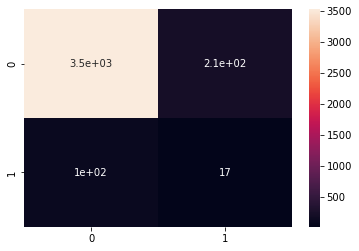

In [199]:
# test data
y_pred=adb_model.predict(x_test)

accuracy5=accuracy_score(y_pred,y_test)
print('accuracy score:',accuracy5)

cnf_mat=confusion_matrix(y_pred,y_test)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred,y_test)

print('classification report:\n',class_rep)

sns.heatmap(cnf_mat,annot=True)

accuracy score: 0.9356755212796344
confusion matrxi:
 [[10604   857]
 [  269  5775]]
classification report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95     11461
           1       0.87      0.96      0.91      6044

    accuracy                           0.94     17505
   macro avg       0.92      0.94      0.93     17505
weighted avg       0.94      0.94      0.94     17505



<AxesSubplot:>

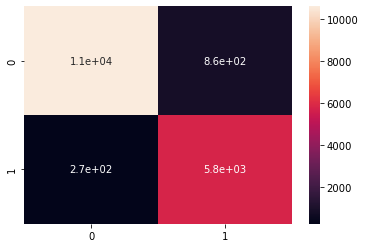

In [200]:
# train data
y_pred_train=adb_model.predict(x_train_sm)

accuracy=accuracy_score(y_pred_train,y_train_sm)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred_train,y_train_sm)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred_train,y_train_sm)
print('classification report:\n',class_rep)

sns.heatmap(cnf_mat,annot=True)

In [201]:
y_pred_proba=adb_model.predict_proba(x_test)
y_pred_proba[:5]

array([[0.50262691, 0.49737309],
       [0.51003239, 0.48996761],
       [0.50555716, 0.49444284],
       [0.51331908, 0.48668092],
       [0.50363519, 0.49636481]])

Text(0.5, 1.0, 'ROC CURVE')

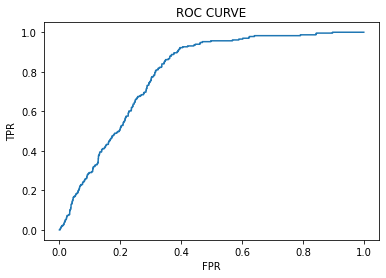

In [202]:
fpr,tpr,thresh=roc_curve(y_test,y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')

In [203]:
auc_score=roc_auc_score(y_test,y_pred_proba[:,1])
auc_score

0.7904948252630372

Text(0.5, 1.0, 'ROC CURVE')

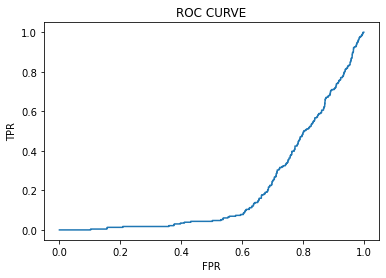

In [204]:
fpr,tpr,thresh=roc_curve(y_test,y_pred_proba[:,0])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')

In [205]:
auc_score=roc_auc_score(y_test,y_pred_proba[:,0])
auc_score

0.20950517473696284

In [109]:
adb_model.feature_importances_

array([0.02307692, 0.03076923, 0.        , 0.00769231, 0.00769231,
       0.02307692, 0.        , 0.12307692, 0.        , 0.19230769,
       0.2       , 0.        , 0.        , 0.        , 0.04615385,
       0.02307692, 0.02307692, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00769231,
       0.        , 0.        , 0.00769231, 0.23076923, 0.00769231,
       0.03076923, 0.01538462])

<AxesSubplot:>

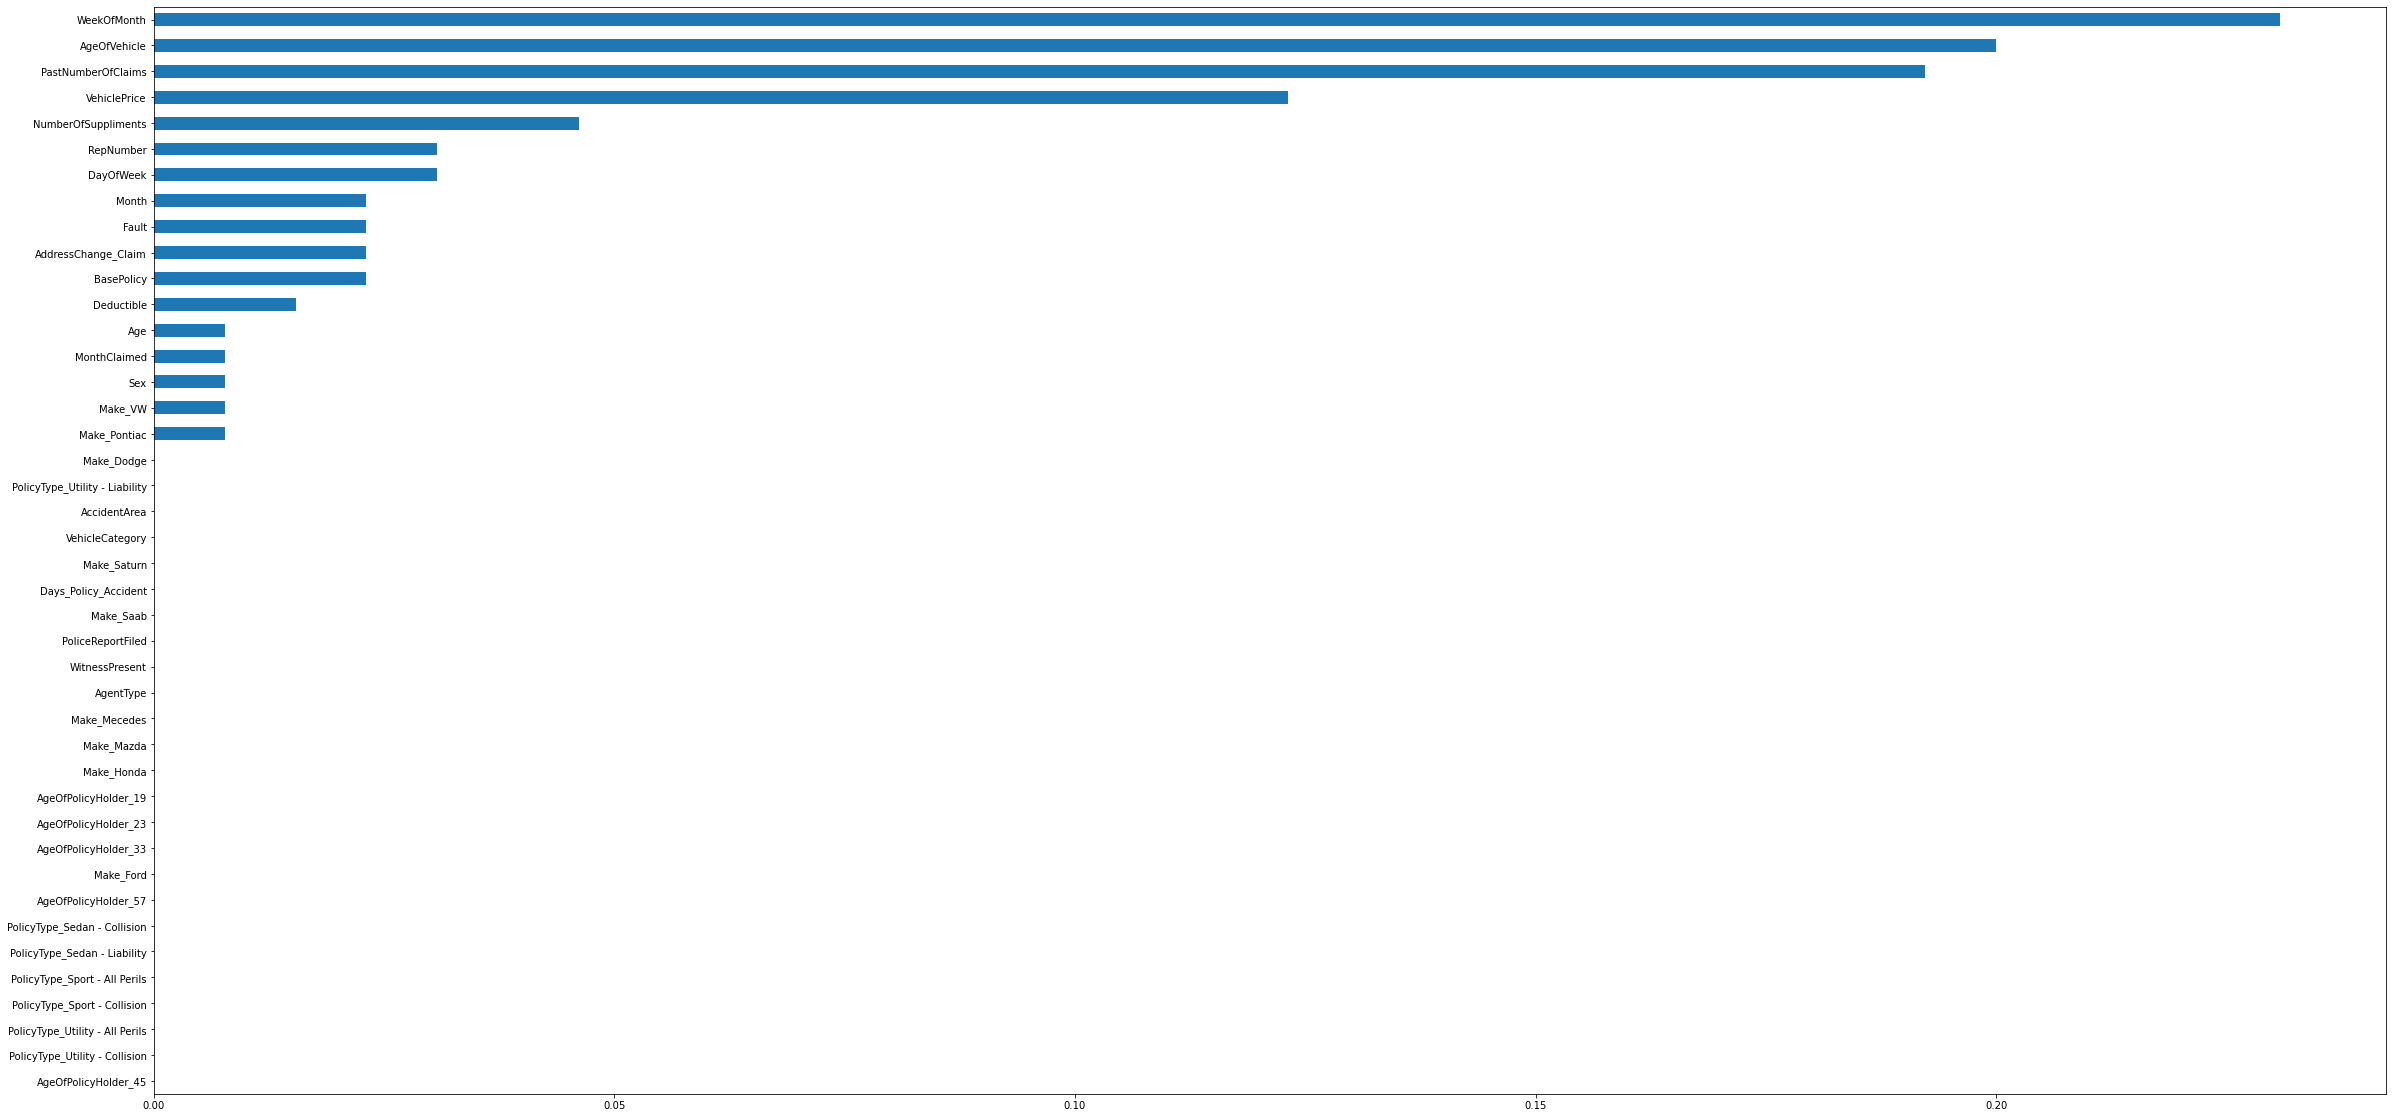

In [110]:
plt.figure(figsize=(40,20))
s1=pd.Series(adb_model.feature_importances_,index=x.columns)
s1.sort_values(ascending=True).plot(kind='barh')


# KNN

In [111]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_train_sm,y_train_sm)

KNeighborsClassifier()

In [112]:
# test data
y_pred=knn_model.predict(x_test)

accuracy=accuracy_score(y_pred,y_test)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred,y_test)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred,y_test)
print('classification report:\n',class_rep)

accuracy score: 0.8005188067444877
confusion matrxi:
 [[2987  132]
 [ 637   99]]
classification report:
               precision    recall  f1-score   support

           0       0.82      0.96      0.89      3119
           1       0.43      0.13      0.20       736

    accuracy                           0.80      3855
   macro avg       0.63      0.55      0.55      3855
weighted avg       0.75      0.80      0.76      3855



In [113]:
# train data
y_pred_train=knn_model.predict(x_train_sm)

accuracy=accuracy_score(y_pred_train,y_train_sm)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred_train,y_train_sm)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred_train,y_train_sm)
print('classification report:\n',class_rep)

accuracy score: 0.9251064277079939
confusion matrxi:
 [[9453    5]
 [1420 8149]]
classification report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      9458
           1       1.00      0.85      0.92      9569

    accuracy                           0.93     19027
   macro avg       0.93      0.93      0.92     19027
weighted avg       0.93      0.93      0.92     19027



## Hyper Parameter Tuning

In [114]:
knn_model=KNeighborsClassifier()
hyp={ 'n_neighbors':np.arange(1,10),
    'p':[1,2]}
rscv_knn_model=RandomizedSearchCV(knn_model,hyp,cv=5)
rscv_knn_model.fit(x_train_sm,y_train_sm)
rscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=1, p=1)

In [116]:
knn_model=KNeighborsClassifier(n_neighbors=1, p=1)
knn_model.fit(x_train_sm,y_train_sm)

KNeighborsClassifier(n_neighbors=1, p=1)

accuracy score: 0.8827496757457847
confusion matrxi:
 [[3371  199]
 [ 253   32]]
classification report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      3570
           1       0.14      0.11      0.12       285

    accuracy                           0.88      3855
   macro avg       0.53      0.53      0.53      3855
weighted avg       0.87      0.88      0.88      3855



<AxesSubplot:>

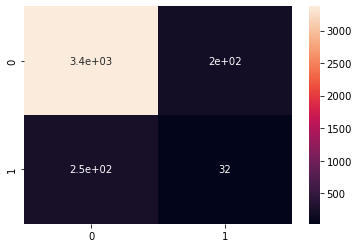

In [117]:
# test data
y_pred=knn_model.predict(x_test)

accuracy1=accuracy_score(y_pred,y_test)
print('accuracy score:',accuracy1)

cnf_mat=confusion_matrix(y_pred,y_test)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred,y_test)
print('classification report:\n',class_rep)

sns.heatmap(cnf_mat,annot=True)

accuracy score: 1.0
confusion matrxi:
 [[10873     0]
 [    0  8154]]
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10873
           1       1.00      1.00      1.00      8154

    accuracy                           1.00     19027
   macro avg       1.00      1.00      1.00     19027
weighted avg       1.00      1.00      1.00     19027



<AxesSubplot:>

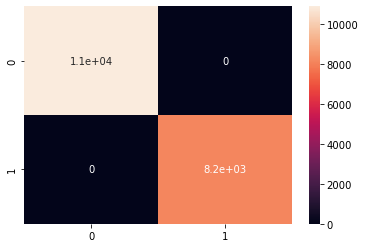

In [118]:
# train data
y_pred_train=knn_model.predict(x_train_sm)

accuracy=accuracy_score(y_pred_train,y_train_sm)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred_train,y_train_sm)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred_train,y_train_sm)
print('classification report:\n',class_rep)

sns.heatmap(cnf_mat,annot=True)

In [119]:
y_pred_proba=knn_model.predict_proba(x_test)
y_pred_proba[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Text(0.5, 1.0, 'ROC CURVE')

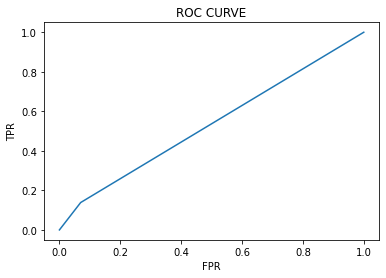

In [120]:
fpr,tpr,thresh=roc_curve(y_test,y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')

In [121]:
auc_score=roc_auc_score(y_test,y_pred_proba[:,1])
auc_score

0.5343578882486167

Text(0.5, 1.0, 'ROC CURVE')

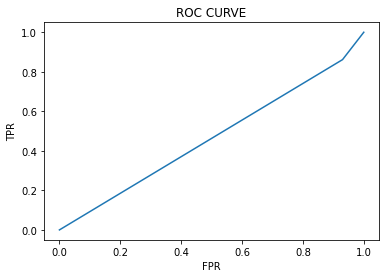

In [122]:
fpr,tpr,thresh=roc_curve(y_test,y_pred_proba[:,0])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')

In [123]:
auc_score=roc_auc_score(y_test,y_pred_proba[:,0])
auc_score

0.4656421117513833

## Decision Tree

In [124]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train_sm,y_train_sm)


DecisionTreeClassifier()

In [125]:
# test data
y_pred=dt_model.predict(x_test)

accuracy=accuracy_score(y_pred,y_test)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred,y_test)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred,y_test)
print('classification report:\n',class_rep)

accuracy score: 0.8876783398184176
confusion matrxi:
 [[3375  184]
 [ 249   47]]
classification report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      3559
           1       0.20      0.16      0.18       296

    accuracy                           0.89      3855
   macro avg       0.57      0.55      0.56      3855
weighted avg       0.88      0.89      0.88      3855



In [126]:
# train data
y_pred_train=dt_model.predict(x_train_sm)

accuracy=accuracy_score(y_pred_train,y_train_sm)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred_train,y_train_sm)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred_train,y_train_sm)
print('classification report:\n',class_rep)

accuracy score: 1.0
confusion matrxi:
 [[10873     0]
 [    0  8154]]
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10873
           1       1.00      1.00      1.00      8154

    accuracy                           1.00     19027
   macro avg       1.00      1.00      1.00     19027
weighted avg       1.00      1.00      1.00     19027



### Hyper Parameter Tuning

In [129]:
dt_model=DecisionTreeClassifier()

hyp={'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':np.arange(4,15),
    'min_samples_split':np.arange(5,20),
    'min_samples_leaf':np.arange(3,12),
    'max_features':['auto''log2','sqrt'],
    'random_state':np.arange(2,10)}

rscv_dt_model=RandomizedSearchCV(dt_model,hyp,cv=5)
rscv_dt_model.fit(x_train_sm,y_train_sm)
rscv_dt_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=14, max_features='sqrt',
                       min_samples_leaf=6, min_samples_split=13,
                       random_state=3)

In [130]:
dt_model=DecisionTreeClassifier(criterion='entropy', max_depth=14, max_features='sqrt',
                       min_samples_leaf=6, min_samples_split=13,
                       random_state=3, splitter='random')
dt_model.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=14, max_features='sqrt',
                       min_samples_leaf=6, min_samples_split=13, random_state=3,
                       splitter='random')

accuracy score: 0.7494163424124514
confusion matrxi:
 [[2730   72]
 [ 894  159]]
classification report:
               precision    recall  f1-score   support

           0       0.75      0.97      0.85      2802
           1       0.69      0.15      0.25      1053

    accuracy                           0.75      3855
   macro avg       0.72      0.56      0.55      3855
weighted avg       0.74      0.75      0.69      3855



<AxesSubplot:>

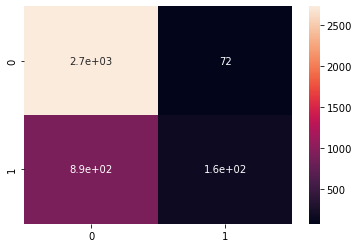

In [131]:
# test data
y_pred=dt_model.predict(x_test)

accuracy2=accuracy_score(y_pred,y_test)
print('accuracy score:',accuracy2)

cnf_mat=confusion_matrix(y_pred,y_test)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred,y_test)
print('classification report:\n',class_rep)

sns.heatmap(cnf_mat,annot=True)

accuracy score: 0.8080622273611184
confusion matrxi:
 [[8313 1092]
 [2560 7062]]
classification report:
               precision    recall  f1-score   support

           0       0.76      0.88      0.82      9405
           1       0.87      0.73      0.79      9622

    accuracy                           0.81     19027
   macro avg       0.82      0.81      0.81     19027
weighted avg       0.82      0.81      0.81     19027



<AxesSubplot:>

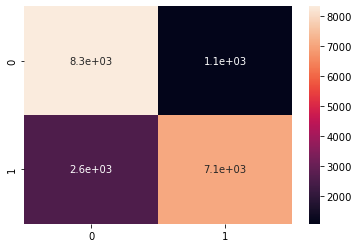

In [133]:
# train data
y_pred_train=dt_model.predict(x_train_sm)

accuracy=accuracy_score(y_pred_train,y_train_sm)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred_train,y_train_sm)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred_train,y_train_sm)
print('classification report:\n',class_rep)

sns.heatmap(cnf_mat,annot=True)

In [134]:
y_pred_proba=dt_model.predict_proba(x_test)
y_pred_proba[:5]

array([[0.22757475, 0.77242525],
       [1.        , 0.        ],
       [0.73529412, 0.26470588],
       [1.        , 0.        ],
       [1.        , 0.        ]])

Text(0.5, 1.0, 'ROC CURVE')

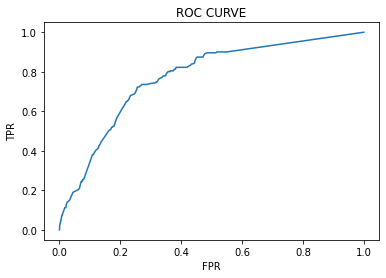

In [135]:
fpr,tpr,thresh=roc_curve(y_test,y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')

In [136]:
auc_score=roc_auc_score(y_test,y_pred_proba[:,1])
auc_score

0.7721341847997477

Text(0.5, 1.0, 'ROC CURVE')

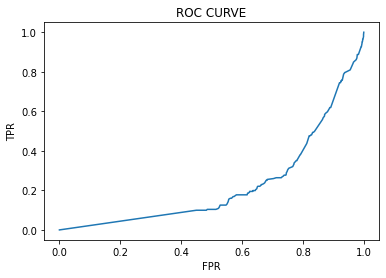

In [137]:
fpr,tpr,thresh=roc_curve(y_test,y_pred_proba[:,0])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')

In [138]:
auc_score=roc_auc_score(y_test,y_pred_proba[:,0])
auc_score

0.22786581520025231

In [139]:
dt_model.feature_importances_

array([0.05225296, 0.02649956, 0.0060171 , 0.02100648, 0.01524034,
       0.26136013, 0.00209272, 0.00467011, 0.00198543, 0.02161444,
       0.0147736 , 0.01258271, 0.        , 0.00124241, 0.01841648,
       0.05867694, 0.02424435, 0.        , 0.00459252, 0.03837367,
       0.01356424, 0.0153337 , 0.00889296, 0.2437818 , 0.        ,
       0.00305188, 0.00319852, 0.        , 0.        , 0.        ,
       0.00245446, 0.0134564 , 0.01615809, 0.        , 0.01059303,
       0.        , 0.        , 0.00657694, 0.0367615 , 0.01850394,
       0.01678162, 0.00524901])

<AxesSubplot:>

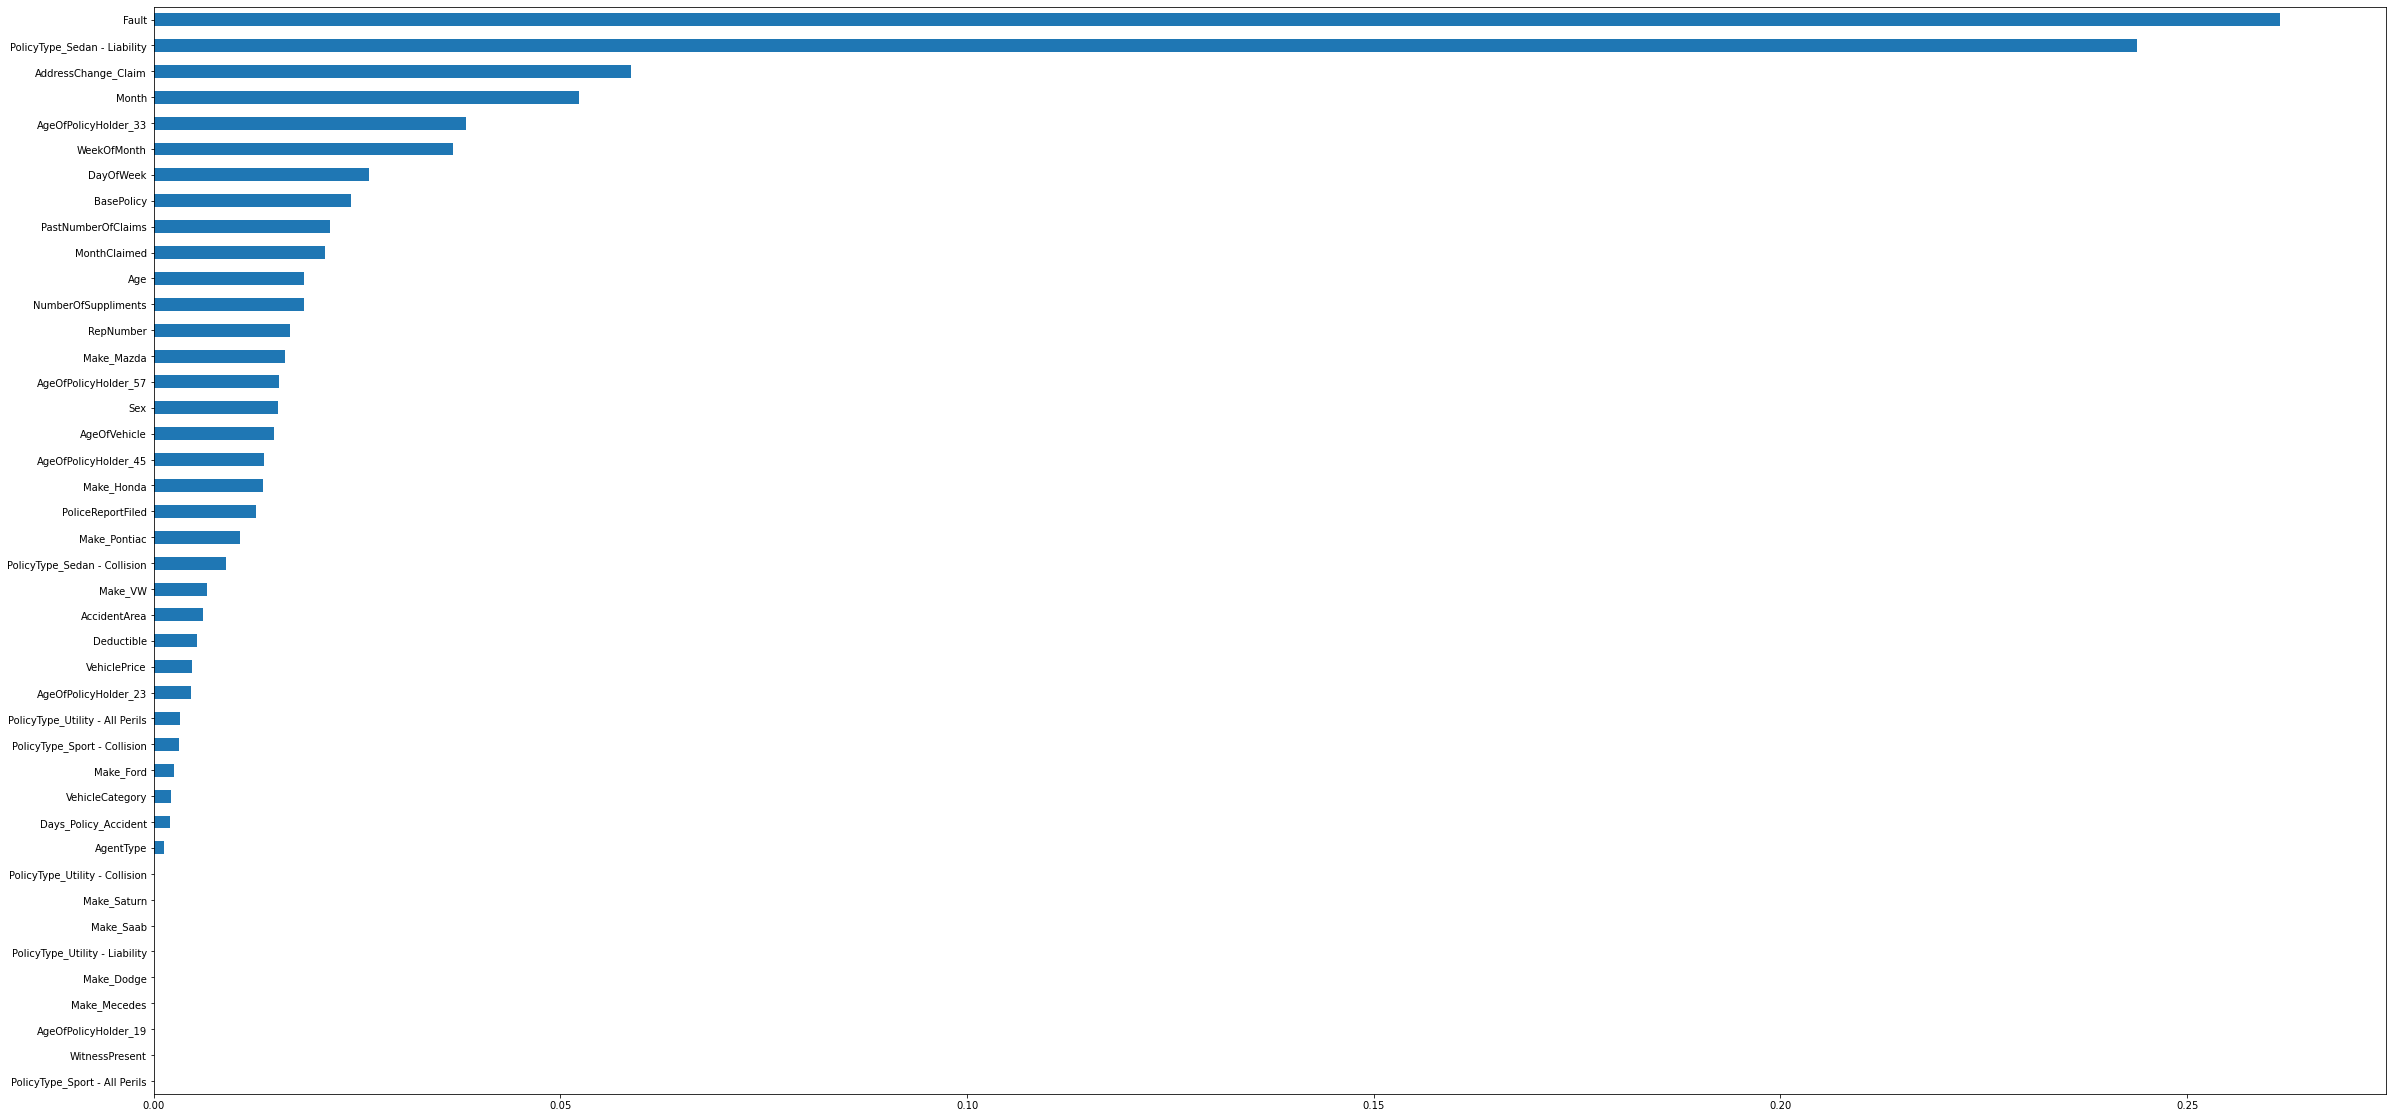

In [140]:
plt.figure(figsize=(40,20))
s1=pd.Series(dt_model.feature_importances_,index=x.columns)
s1.sort_values(ascending=True).plot(kind='barh')


# Random Forest

In [141]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train_sm,y_train_sm)

RandomForestClassifier()

In [142]:
# test data
y_pred=rf_model.predict(x_test)

accuracy=accuracy_score(y_pred,y_test)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred,y_test)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred,y_test)
print('classification report:\n',class_rep)

accuracy score: 0.9380025940337224
confusion matrxi:
 [[3600  215]
 [  24   16]]
classification report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97      3815
           1       0.07      0.40      0.12        40

    accuracy                           0.94      3855
   macro avg       0.53      0.67      0.54      3855
weighted avg       0.98      0.94      0.96      3855



In [144]:
# train data
y_pred_train=rf_model.predict(x_train_sm)

accuracy=accuracy_score(y_pred_train,y_train_sm)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred_train,y_train_sm)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred_train,y_train_sm)
print('classification report:\n',class_rep)

accuracy score: 1.0
confusion matrxi:
 [[10873     0]
 [    0  8154]]
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10873
           1       1.00      1.00      1.00      8154

    accuracy                           1.00     19027
   macro avg       1.00      1.00      1.00     19027
weighted avg       1.00      1.00      1.00     19027



## Hyper Parameter Tuning

In [146]:
rf_model=RandomForestClassifier()

hyp={'n_estimators':np.arange(20,150),
    'criterion':['gini','entropy'],
    'max_features':['log2','auto','sqrt'],
     'max_depth':np.arange(4,15),
    'min_samples_split':np.arange(5,20),
    'min_samples_leaf':np.arange(3,12),
    'random_state':np.arange(2,10)}
rscv_rf_model=RandomizedSearchCV(rf_model,hyp,cv=5)
rscv_rf_model.fit(x_train_sm,y_train_sm)
rscv_rf_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=13, max_features='auto',
                       min_samples_leaf=10, min_samples_split=12,
                       n_estimators=126, random_state=5)

In [147]:
rf_model=RandomForestClassifier(criterion='entropy', max_depth=113, max_features='auto',
                       min_samples_leaf=10, min_samples_split=12,
                       n_estimators=126, random_state=5,oob_score=True)
rf_model.fit(x_train_sm,y_train_sm)


RandomForestClassifier(criterion='entropy', max_depth=113, max_features='auto',
                       min_samples_leaf=10, min_samples_split=12,
                       n_estimators=126, oob_score=True, random_state=5)

accuracy score: 0.9247730220492867
confusion matrxi:
 [[3537  203]
 [  87   28]]
classification report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      3740
           1       0.12      0.24      0.16       115

    accuracy                           0.92      3855
   macro avg       0.55      0.59      0.56      3855
weighted avg       0.95      0.92      0.94      3855

f1_score:
 0.16184971098265896
precision:
 0.12121212121212122
recall:
 0.24347826086956523


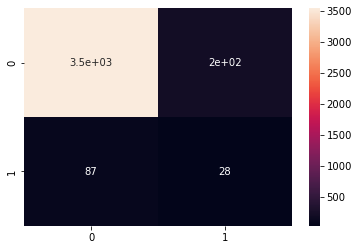

In [148]:
# test data
y_pred=rf_model.predict(x_test)

accuracy3=accuracy_score(y_pred,y_test)
print('accuracy score:',accuracy3)

cnf_mat=confusion_matrix(y_pred,y_test)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred,y_test)
print('classification report:\n',class_rep)

sns.heatmap(cnf_mat,annot=True)

f1score=metrics.f1_score(y_pred,y_test)
print('f1_score:\n',f1score)

precision=metrics.precision_score(y_pred,y_test)
print('precision:\n',precision)

recall=metrics.recall_score(y_pred,y_test)
print('recall:\n',recall)

accuracy score: 0.9659431334419509
confusion matrxi:
 [[10742   517]
 [  131  7637]]
classification report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97     11259
           1       0.94      0.98      0.96      7768

    accuracy                           0.97     19027
   macro avg       0.96      0.97      0.97     19027
weighted avg       0.97      0.97      0.97     19027



<AxesSubplot:>

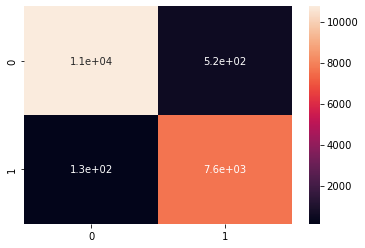

In [149]:
# train data
y_pred_train=rf_model.predict(x_train_sm)

accuracy=accuracy_score(y_pred_train,y_train_sm)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred_train,y_train_sm)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred_train,y_train_sm)
print('classification report:\n',class_rep)

sns.heatmap(cnf_mat,annot=True)

In [156]:
y_pred_proba=rf_model.predict_proba(x_test)
y_pred_proba[:5]

array([[0.63781923, 0.36218077],
       [0.97976854, 0.02023146],
       [0.81214161, 0.18785839],
       [0.974292  , 0.025708  ],
       [0.83141144, 0.16858856]])

Text(0.5, 1.0, 'ROC CURVE')

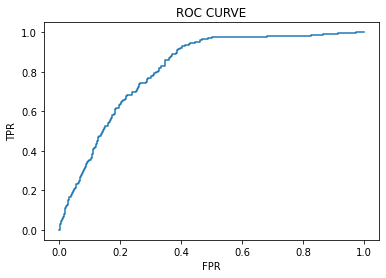

In [157]:
fpr,tpr,thresh=roc_curve(y_test,y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')

In [158]:
auc_score=roc_auc_score(y_test,y_pred_proba[:,1])
auc_score

0.8141156121288571

Text(0.5, 1.0, 'ROC CURVE')

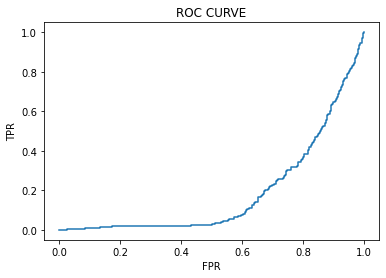

In [159]:
fpr,tpr,thresh=roc_curve(y_test,y_pred_proba[:,0])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')

In [160]:
auc_score=roc_auc_score(y_test,y_pred_proba[:,0])
auc_score

0.18588438787114284

In [161]:
rf_model.oob_score_

0.9499658380196563

In [162]:
rf_model.feature_importances_

array([5.23680668e-02, 4.40647767e-02, 4.40405392e-03, 5.79925587e-02,
       9.38333862e-03, 1.57237337e-01, 3.16538657e-02, 7.84274716e-02,
       7.27369432e-04, 6.56552419e-02, 9.26341020e-02, 2.31935764e-03,
       2.87324913e-05, 5.99078317e-04, 4.71353147e-02, 2.22762444e-02,
       6.97896590e-02, 1.07925166e-04, 1.01591132e-03, 1.18347860e-02,
       4.78561158e-03, 2.50224293e-03, 1.01171238e-02, 5.26145811e-02,
       0.00000000e+00, 4.50913743e-03, 7.71605840e-04, 3.73992128e-05,
       0.00000000e+00, 2.87405803e-05, 1.38093346e-03, 5.59301590e-03,
       6.20273588e-03, 0.00000000e+00, 8.81835849e-03, 7.98413644e-05,
       8.90201282e-06, 7.37413310e-04, 6.13028624e-02, 3.61945844e-02,
       4.02847612e-02, 1.43749576e-02])

<AxesSubplot:>

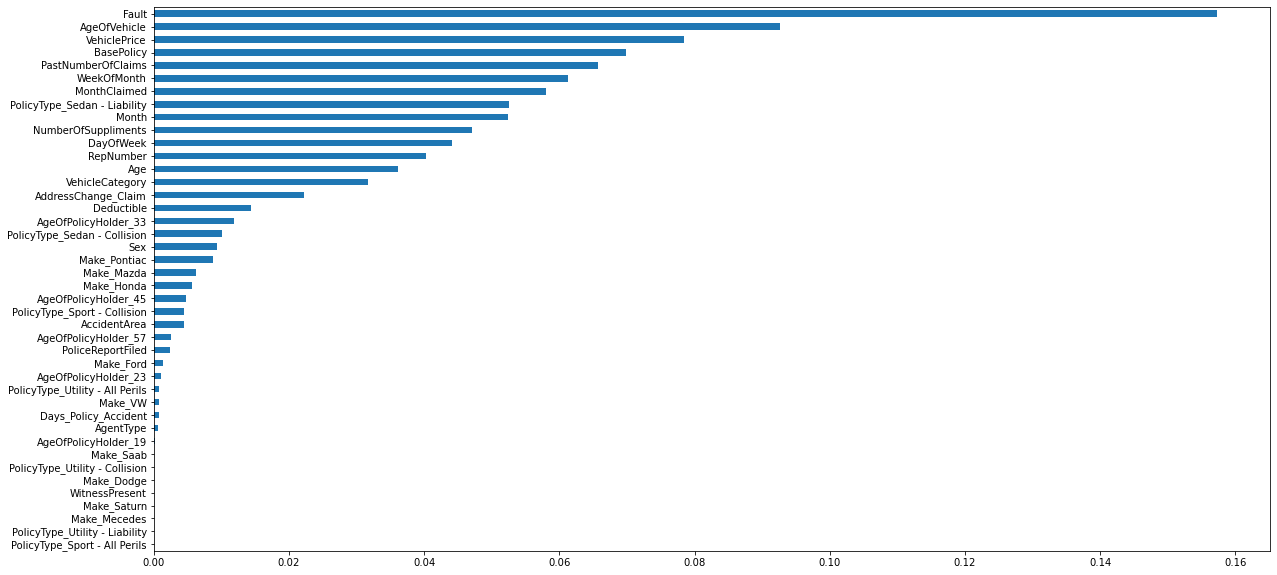

In [163]:
plt.figure(figsize=(20,10))
s2=pd.Series(rf_model.feature_importances_,index=x.columns)
s2.sort_values(ascending=True).plot(kind='barh')

# Logistic Regression

In [164]:
lr_model=LogisticRegression()
lr_model.fit(x_train_sm,y_train_sm)

LogisticRegression()

In [165]:
# test data
y_pred=lr_model.predict(x_test)

accuracy4=accuracy_score(y_pred,y_test)
print('accuracy score:',accuracy4)

cnf_mat=confusion_matrix(y_pred,y_test)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred,y_test)
print('classification report:\n',class_rep)

f1score=metrics.f1_score(y_pred,y_test)
print('f1_score:\n',f1score)

precision=metrics.precision_score(y_pred,y_test)
print('precision:\n',precision)

recall=metrics.recall_score(y_pred,y_test)
print('recall:\n',recall)

accuracy score: 0.6876783398184176
confusion matrxi:
 [[2468   48]
 [1156  183]]
classification report:
               precision    recall  f1-score   support

           0       0.68      0.98      0.80      2516
           1       0.79      0.14      0.23      1339

    accuracy                           0.69      3855
   macro avg       0.74      0.56      0.52      3855
weighted avg       0.72      0.69      0.61      3855

f1_score:
 0.23312101910828026
precision:
 0.7922077922077922
recall:
 0.13666915608663183


In [166]:
# train data
y_pred_train=lr_model.predict(x_train_sm)

accuracy=accuracy_score(y_pred_train,y_train_sm)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred_train,y_train_sm)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred_train,y_train_sm)
print('classification report:\n',class_rep)

accuracy score: 0.7444683870289589
confusion matrxi:
 [[7464 1453]
 [3409 6701]]
classification report:
               precision    recall  f1-score   support

           0       0.69      0.84      0.75      8917
           1       0.82      0.66      0.73     10110

    accuracy                           0.74     19027
   macro avg       0.75      0.75      0.74     19027
weighted avg       0.76      0.74      0.74     19027



In [167]:
y_pred_proba=lr_model.predict_proba(x_test)
y_pred_proba[:5]

array([[0.30837663, 0.69162337],
       [0.91856813, 0.08143187],
       [0.37537623, 0.62462377],
       [0.93748642, 0.06251358],
       [0.46442362, 0.53557638]])

In [168]:
y_pred[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [169]:
y_pred_proba[:,1]

array([0.69162337, 0.08143187, 0.62462377, ..., 0.07519872, 0.19801584,
       0.03490878])

In [170]:
fpr,tpr,thresh=roc_curve(y_test,y_pred_proba[:,1])

Text(0.5, 1.0, 'ROC CURVE')

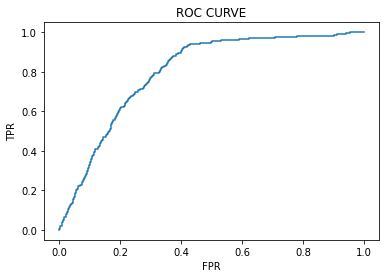

In [171]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')

In [172]:
auc_score=roc_auc_score(y_test,y_pred_proba[:,1])
auc_score

0.7991432776200988

Text(0.5, 1.0, 'ROC CURVE')

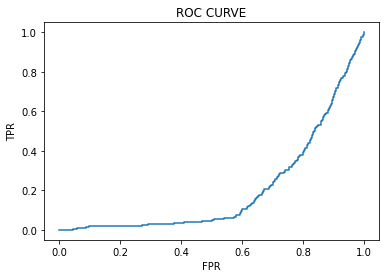

In [173]:
fpr,tpr,thresh=roc_curve(y_test,y_pred_proba[:,0])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')

In [174]:
auc_score=roc_auc_score(y_test,y_pred_proba[:,0])
auc_score

0.20085672237990118

# svm model

In [175]:
svc_model = SVC()
svc_model.fit(x_train_sm, y_train_sm)

SVC()

In [176]:
from sklearn import metrics

In [177]:
# test data
y_pred=svc_model.predict(x_test)

accuracy6=accuracy_score(y_pred,y_test)
print('accuracy score:',accuracy6)

cnf_mat=confusion_matrix(y_pred,y_test)
print('confusion matrxi:\n',cnf_mat)


class_rep=classification_report(y_pred,y_test)
print('classification report:\n',class_rep)

f1score=metrics.f1_score(y_pred,y_test)
print('f1_score:\n',f1score)

precision=metrics.precision_score(y_pred,y_test)
print('precision:\n',precision)

recall=metrics.recall_score(y_pred,y_test)
print('recall:\n',recall)


accuracy score: 0.8025940337224384
confusion matrxi:
 [[2970  107]
 [ 654  124]]
classification report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      3077
           1       0.54      0.16      0.25       778

    accuracy                           0.80      3855
   macro avg       0.68      0.56      0.57      3855
weighted avg       0.76      0.80      0.76      3855

f1_score:
 0.24578790882061446
precision:
 0.5367965367965368
recall:
 0.15938303341902313


In [178]:
# train data
y_pred_train=svc_model.predict(x_train_sm)

accuracy=accuracy_score(y_pred_train,y_train_sm)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred_train,y_train_sm)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred_train,y_train_sm)
print('classification report:\n',class_rep)

accuracy score: 0.870710043622221
confusion matrxi:
 [[9000  587]
 [1873 7567]]
classification report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      9587
           1       0.93      0.80      0.86      9440

    accuracy                           0.87     19027
   macro avg       0.88      0.87      0.87     19027
weighted avg       0.88      0.87      0.87     19027



## Hyper parameter Tunning

In [ ]:
svc_model = SVC()

hyp = {'C':np.arange(0,2, 0.2),
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma':np.arange(0.2,2, 0.2),}

gscv_svc_model = GridSearchCV(svc_model, hyp, cv=5)
gscv_svc_model.fit(x_train_sm, y_train_sm)
gscv_svc_model.best_params_

In [ ]:
svc_model=SVC()
svc_model.fit(x_train_sm,y_train_sm)

In [ ]:
# test data
y_pred=svc_model.predict(x_test)

accuracy6=accuracy_score(y_pred,y_test)
print('accuracy score:',accuracy6)

cnf_mat=confusion_matrix(y_pred,y_test)
print('confusion matrxi:\n',cnf_mat)


class_rep=classification_report(y_pred,y_test)
print('classification report:\n',class_rep)

f1score=metrics.f1_score(y_pred,y_test)
print('f1_score:\n',f1score)

precision=metrics.precision_score(y_pred,y_test)
print('precision:\n',precision)

recall=metrics.recall_score(y_pred,y_test)
print('recall:\n',recall)

In [ ]:
# train data
y_pred_train=svc_model.predict(x_train_sm)

accuracy=accuracy_score(y_pred_train,y_train_sm)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred_train,y_train_sm)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred_train,y_train_sm)
print('classification report:\n',class_rep)

In [179]:
models=pd.DataFrame({'Model':['K-Nearest Neighbors','Decision Tree Classifier','Random Forest Classifier','Logistic Regression',
                              'Adaboost Classifier','SVM Classifier'],
                    
                    'Accuracy':[accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6]})
models

Model  Accuracy
0       K-Nearest Neighbors  0.882750
1  Decision Tree Classifier  0.749416
2  Random Forest Classifier  0.924773
3       Logistic Regression  0.687678
4       Adaboost Classifier  0.906096
5            SVM Classifier  0.802594

In [180]:
px.bar(data_frame=models,x='Model',y='Accuracy',title='Model Comparison',template='plotly_dark',color='Accuracy')